In [25]:
import numpy as np
from sklearn.mixture import GaussianMixture
from scipy.stats import multivariate_normal
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from mpl_toolkits.mplot3d import Axes3D  # For 3D plotting
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import MinMaxScaler
from hmmlearn import hmm


In [26]:

freq_dict = {}
freq_dict['gFreq'] = [177000000,266000000,350000000,420000000,480000000,600000000]
freq_dict['mFreq'] = [165000000,206000000,275000000,413000000,543000000,633000000,728000000,825000000]#,933000000]
freq_dict['sFreq'] = [200000,300000,400000,500000,600000,700000,800000,900000,1000000,1100000,1200000,1300000,1400000]
freq_dict['bFreq'] = [200000,300000,400000,500000,600000,700000,800000,900000,1000000,1100000,1200000,1300000,1400000,1500000,1600000,1700000,1800000,1900000,2000000]
# cost_list =['cCost','mCost','gCost']
cFreq = 'bFreq'
mFreq = 'mFreq'
gFreq = 'gFreq'
cUtil = 'bUtil'
mUtil = 'mUtil'
gUtil = 'gUtil'
cCost = 'cCost'
mCost = 'mCost'
gCost = 'gCost'

cost2FMap = {}
cost2FMap['cCost'] = 'bFreq'
cost2FMap['mCost'] = 'mFreq'
cost2FMap['gCost'] = 'gFreq'

def getExog(endog='cCost'):
    cost_list =['cCost','mCost','gCost']
    if endog not in cost_list:
        print("Incorrect Value")
        return None,None
    else:
        my_list = []
        for res in cost_list:
            if res != endog:
                my_list.append(res)
        return my_list[0],my_list[1]


In [27]:
fileName = './UtilTestFinal'
dataTest = pd.read_csv(fileName)
dataTest

,Time,sUtil,sFreq,bUtil,bFreq,mUtil,mFreq
0,1.692295e+09,1,200000,8,300000,1,206000000
1,1.692295e+09,12,300000,24,600000,2,413000000
2,1.692295e+09,14,400000,24,600000,2,413000000
3,1.692295e+09,3,200000,7,300000,1,165000000
4,1.692295e+09,3,200000,19,500000,2,275000000
...,...,...,...,...,...,...,...
8555,1.692298e+09,4,200000,14,500000,1,206000000
8556,1.692298e+09,23,500000,10,400000,1,206000000
8557,1.692298e+09,23,500000,18,500000,2,275000000
8558,1.692298e+09,4,200000,14,500000,2,275000000


In [28]:
### Get the data from the files
def extractDatafromFile(fileName='./UtilTestFinal',padding=0): ## Generally make the padding 0
    new_data = pd.read_csv(fileName)
    #### This part needs to be 
    if padding == 1:  # if there is not 
        new_data['cCost'] =  new_data['bUtil']*new_data['bFreq']/2000000
        new_data['mCost'] = new_data['mUtil']*new_data['mFreq']/825000000
        new_data['gCost'] = 0
        new_data['gUtil'] = 0
        new_data['gFreq'] = 600000000
    elif padding == 2:  # if there is not 
        # new_data['cCost'] =  new_data['bUtil']*new_data['bFreq']/2000000
        # new_data['mCost'] = new_data['mUtil']*new_data['mFreq']/825000000
        new_data['gCost'] = new_data['gCost']*new_data['gFreq']/600000000
        # new_data['gFreq'] = 600000000
    elif padding == 3:  # if there is not 
        new_data['cCost'] =  new_data['bUtil']*new_data['bFreq']/2000000
        new_data['mCost'] = new_data['mCost']*new_data['mFreq']/825000000
        new_data['gCost'] = new_data['gCost']*new_data['gFreq']/600000000
        new_data[['cCost','mCost','gCost']] = new_data[['cCost','mCost','gCost']].clip(0,100)
    elif padding == 4:  # if there is not 
        new_data['cCost'] =  new_data['bUtil']*new_data['bFreq']/2000000
        new_data['mUtil'] = new_data['mCost']
        new_data['mCost'] = new_data['mCost']*new_data['mFreq']/825000000
        new_data['gUtil'] = new_data['gCost']
        new_data['gCost'] = new_data['gCost']*new_data['gFreq']/600000000
        # new_data[['cCost','mCost','gCost']] = new_data[['cCost','mCost','gCost']].clip(0,100)
        # new_data['gFreq'] = 600000000

    return new_data



In [29]:
input_df = extractDatafromFile('./UtilTestFinal',1)


In [30]:
input_df

,Time,sUtil,sFreq,bUtil,bFreq,mUtil,mFreq,cCost,mCost,gCost,gUtil,gFreq
0,1.692295e+09,1,200000,8,300000,1,206000000,1.20,0.249697,0,0,600000000
1,1.692295e+09,12,300000,24,600000,2,413000000,7.20,1.001212,0,0,600000000
2,1.692295e+09,14,400000,24,600000,2,413000000,7.20,1.001212,0,0,600000000
3,1.692295e+09,3,200000,7,300000,1,165000000,1.05,0.200000,0,0,600000000
4,1.692295e+09,3,200000,19,500000,2,275000000,4.75,0.666667,0,0,600000000
...,...,...,...,...,...,...,...,...,...,...,...,...
8555,1.692298e+09,4,200000,14,500000,1,206000000,3.50,0.249697,0,0,600000000
8556,1.692298e+09,23,500000,10,400000,1,206000000,2.00,0.249697,0,0,600000000
8557,1.692298e+09,23,500000,18,500000,2,275000000,4.50,0.666667,0,0,600000000
8558,1.692298e+09,4,200000,14,500000,2,275000000,3.50,0.666667,0,0,600000000


In [31]:
input_df['mFreq'].unique()

array([206000000, 413000000, 165000000, 275000000, 543000000, 825000000])

In [32]:
## We will create the cluster for the datapoints per point, not a list of points (like in the fuzzy cluster). 
## We can try that approach later
def createDataSet(input_df,endog,scaler):
    modified_df = pd.DataFrame()
    # scaler = MinMaxScaler()
    ## Get the exog values
    exog,exog1 = getExog(endog)
    modified_df[cFreq] = input_df[cFreq]
    # modified_df[cUtil] = input_df[cUtil]
    modified_df[cCost] = input_df[cCost]
    modified_df[mFreq] =  input_df[mFreq]
    # modified_df[mUtil] = input_df[mUtil]
    modified_df[mCost] = input_df[mCost]
    # modified_df[gFreq] =  input_df[gFreq]
    # # modified_df[gUtil] = input_df[gUtil] 
    # modified_df[gCost] = input_df[gCost]
    modified_df = modified_df.dropna()
    modified_df[[cFreq,cCost,mFreq,mCost]] = scaler.fit_transform(modified_df[[cFreq,cCost,mFreq,mCost]])
    return modified_df,scaler


In [33]:
myScaler = MinMaxScaler()
clean_df,myScaler = createDataSet(input_df,'cCost',myScaler)

In [34]:
clean_df

,bFreq,cCost,mFreq,mCost
0,0.000000,0.006036,0.062121,0.002153
1,0.176471,0.066398,0.375758,0.008631
2,0.176471,0.066398,0.375758,0.008631
3,0.000000,0.004527,0.000000,0.001724
4,0.117647,0.041751,0.166667,0.005747
...,...,...,...,...
8555,0.117647,0.029175,0.062121,0.002153
8556,0.058824,0.014085,0.062121,0.002153
8557,0.117647,0.039235,0.166667,0.005747
8558,0.117647,0.029175,0.166667,0.005747


In [35]:
inv_scaler = myScaler.inverse_transform(clean_df)
inv_scaler

array([[3.00000000e+05, 1.20000000e+00, 2.06000000e+08, 2.49696970e-01],
       [6.00000000e+05, 7.20000000e+00, 4.13000000e+08, 1.00121212e+00],
       [6.00000000e+05, 7.20000000e+00, 4.13000000e+08, 1.00121212e+00],
       ...,
       [5.00000000e+05, 4.50000000e+00, 2.75000000e+08, 6.66666667e-01],
       [5.00000000e+05, 3.50000000e+00, 2.75000000e+08, 6.66666667e-01],
       [4.00000000e+05, 2.00000000e+00, 2.06000000e+08, 2.49696970e-01]])

In [36]:
max(inv_scaler[:,3])

116.0

In [46]:
def getDataAsList(modified_df):
    totalLen = len(modified_df)
    if totalLen == 0:
        print("Empty List")
        return []
    data_list = modified_df.to_numpy()
    return data_list

In [38]:
data_list = getDataAsList(clean_df)

In [39]:
data_list

array([[0.        , 0.00603622, 0.06212121, 0.00215256],
       [0.17647059, 0.06639839, 0.37575758, 0.00863114],
       [0.17647059, 0.06639839, 0.37575758, 0.00863114],
       ...,
       [0.11764706, 0.03923541, 0.16666667, 0.00574713],
       [0.11764706, 0.02917505, 0.16666667, 0.00574713],
       [0.05882353, 0.01408451, 0.06212121, 0.00215256]])

In [40]:
## Modeling the GMM
X = data_list
for i in range(2,5):
    print("Num Cluster ",i)    
    gmm = GaussianMixture(n_components=i, random_state=0)
    gmm.fit(X)
    labels = gmm.predict(X)
    means = gmm.means_
    covariances = gmm.covariances_
    
    print("Means:", means)
    print("Covariances:", covariances)
    
    score = silhouette_score(X, labels)
    print(f"Silhouette Score{i}:", score)
    score =  gmm.bic(X)
    print(f"BIC Score{i}:", score)
    score =  gmm.aic(X)
    print(f"AIC Score{i}:", score)
    print("\n\n")

Num Cluster  2
Means: [[0.10236591 0.03304628 0.36296316 0.03967584]
 [0.86446722 0.81484537 0.82365892 0.24668945]]
Covariances: [[[ 0.00442361  0.00177611  0.01223372  0.00214946]
  [ 0.00177611  0.00077346  0.00572032  0.00093315]
  [ 0.01223372  0.00572032  0.15266971  0.0225682 ]
  [ 0.00214946  0.00093315  0.0225682   0.00556554]]

 [[ 0.05645081  0.07548767 -0.00775635  0.01091393]
  [ 0.07548767  0.10153055 -0.00999085  0.01475777]
  [-0.00775635 -0.00999085  0.10069865  0.04193256]
  [ 0.01091393  0.01475777  0.04193256  0.06656417]]]
Silhouette Score2: 0.5859463950880632
BIC Score2: -71767.611460134
AIC Score2: -71972.20226873893



Num Cluster  3
Means: [[0.09173414 0.02924016 0.14173745 0.00481276]
 [0.99284117 0.98806316 0.79885191 0.26730277]
 [0.2370312  0.11452415 1.         0.15797593]]
Covariances: [[[ 4.74614926e-03  2.40809039e-03  2.12629824e-03  7.30609636e-05]
  [ 2.40809039e-03  1.39262205e-03  1.19885730e-03  4.16086840e-05]
  [ 2.12629824e-03  1.19885730e-03  

# Make HMM based clustering, especially on the time-series data.

In [43]:
# Generate some sample multivariate data
data = np.random.randn(100, 4)

# Create a Gaussian HMM with 2 states
model = hmm.GaussianHMM(n_components=4,covariance_type="full")

# Fit the model to the data
model.fit(data)

print(model.transmat_)
print(model.means_)
print(model.covars_)
# Predict the hidden states
hidden_states = model.predict(data)

[[1.26889985e-01 3.44992922e-03 8.69660081e-01 4.73409423e-09]
 [1.81463171e-01 1.68508137e-01 5.58891420e-05 6.49972803e-01]
 [3.72172710e-01 2.44596525e-08 9.08290033e-03 6.18744365e-01]
 [1.57733549e-01 6.04147427e-01 1.41071000e-01 9.70480249e-02]]
[[-6.03520460e-01 -6.17501799e-01  5.87160673e-01  2.63446704e-01]
 [ 1.68128167e-04  5.46328854e-01  6.16872660e-01 -8.60767992e-01]
 [-2.61199264e-01 -5.89251326e-02 -7.04173602e-01  3.50764797e-01]
 [ 7.10767713e-01  3.54110742e-02 -3.66212130e-01  3.16693864e-01]]
[[[ 0.83299887 -0.34850399 -0.15839376  0.18777993]
  [-0.34850399  0.62868615  0.49034239 -0.09362078]
  [-0.15839376  0.49034239  0.66623463 -0.1976688 ]
  [ 0.18777993 -0.09362078 -0.1976688   0.36793411]]

 [[ 1.26297768 -0.01390379  0.3607249   0.19604029]
  [-0.01390379  0.76664516  0.09934987  0.5415423 ]
  [ 0.3607249   0.09934987  0.47700835 -0.19291426]
  [ 0.19604029  0.5415423  -0.19291426  1.30522483]]

 [[ 1.2665317  -0.48455968  0.4633788   0.10354691]
  [-0.

In [44]:
hidden_states

array([2, 3, 1, 3, 1, 3, 0, 2, 3, 3, 1, 3, 1, 0, 2, 3, 1, 0, 2, 0, 2, 3,
       1, 1, 3, 3, 2, 0, 2, 0, 2, 0, 0, 0, 2, 0, 2, 0, 2, 0, 2, 0, 0, 2,
       0, 2, 3, 1, 3, 1, 0, 2, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 1, 3, 1, 3,
       1, 1, 3, 1, 1, 3, 1, 0, 2, 3, 0, 2, 3, 2, 0, 2, 0, 0, 2, 3, 1, 3,
       0, 2, 3, 1, 3, 1, 1, 3, 2, 3, 0, 2])

In [45]:
model.predict_proba(data)

array([[1.61659210e-35, 4.33782145e-10, 1.00000000e+00, 2.35559744e-15],
       [7.94683881e-11, 4.86457356e-10, 1.64080771e-04, 9.99835919e-01],
       [3.78029100e-04, 9.80577978e-01, 3.69449518e-03, 1.53494982e-02],
       [6.66867559e-06, 3.85172781e-02, 1.62789206e-03, 9.59848161e-01],
       [8.94384188e-06, 8.83311538e-01, 8.22594476e-02, 3.44200708e-02],
       [8.41796222e-02, 2.23097174e-03, 7.23688725e-04, 9.12865717e-01],
       [9.75725049e-01, 2.70979691e-04, 8.12151231e-03, 1.58824591e-02],
       [9.20640038e-03, 4.40768920e-06, 9.88328461e-01, 2.46073103e-03],
       [6.17938911e-05, 2.21435870e-04, 4.42528072e-02, 9.55463963e-01],
       [8.59885113e-12, 6.21882547e-03, 8.80377343e-04, 9.92900797e-01],
       [2.19596785e-07, 9.26254294e-01, 7.31467629e-02, 5.98723911e-04],
       [1.65500699e-13, 1.85133142e-03, 1.28325588e-05, 9.98135836e-01],
       [1.25841346e-05, 9.71234931e-01, 7.02332457e-04, 2.80501526e-02],
       [9.86838711e-01, 5.25643630e-07, 7.46719514e

In [23]:
## Training a multi-variate HMM for the DVFS modeling


data =  extractDatafromFile('./UtilTestFinal',1)
test_scaler = MinMaxScaler()
clean_df,_ = createDataSet(data,'cCost',test_scaler)  ## The data comprises of cost and freq , we might think of adding util, for some threshold vector

In [47]:
data_list = getDataAsList(clean_df)

In [69]:
model = hmm.GaussianHMM(n_components=50,covariance_type="full",n_iter=10000000000)

# Fit the model to the data
model.fit(data_list)

print(model.transmat_)
print("\n\n")
print(model.means_)
print("\n\n")
print(model.covars_)
# Predict the hidden states
hidden_states = model.predict(data_list)

Model is not converging.  Current: 109768.84960003814 is not greater than 122916.29355435379. Delta is -13147.443954315648


[[1.07419956e-017 1.36920628e-025 2.03501903e-008 ... 2.98343668e-025
  1.52348035e-002 1.74832133e-001]
 [3.73403597e-081 3.20260296e-017 7.62622200e-009 ... 0.00000000e+000
  2.18730385e-049 2.05409262e-015]
 [7.72282963e-014 2.71524104e-052 1.34230477e-001 ... 1.12235363e-136
  9.10458142e-002 3.26709503e-017]
 ...
 [4.09107828e-050 0.00000000e+000 1.68471548e-053 ... 2.31903815e-080
  1.40378262e-071 6.53901395e-098]
 [2.66085520e-039 1.70597356e-023 6.28649153e-010 ... 1.20555495e-028
  7.92563181e-009 1.37847843e-001]
 [3.81402350e-022 2.06946040e-035 4.03051638e-032 ... 1.77319397e-008
  6.23036001e-032 8.72004188e-001]]



[[0.45485053 0.26024725 0.50708538 0.02352107]
 [0.18099832 0.06793602 1.         0.21894929]
 [0.07445767 0.02823054 1.         0.07334443]
 [1.         0.99957589 0.2581858  0.00902737]
 [0.05251627 0.01629605 0.47845472 0.01752053]
 [1.         0.99680089 1.         0.06757919]
 [0.15761827 0.05304877 1.         0.27054689]
 [0.04892215 0.01423492 0.092725

In [ ]:
class GMMHMMPredictor:
    def __init__(self,data):
        print("The data is a 2_D list")
        self.data = data
        self.model = None
        self.ngroup = 4
        self.transmat = None
        self.means = None

    def update(self,data):
        print("Cleans all the data and makes this new one")
        self.data = data
        return

    def GMMFit(n_comp=4):
        self.ngroup = n_comp
        self.model = hmm.GaussianHMM(n_components=self.ngroup,covariance_type="full")
        self.model.fit(self.data)
        return

    def getGMMparams():
        self.transmat = self.model.transmat_
        self.means = self.model.means_
        self.covars = self.model.covars_
        print("Mean \n ",self.means)
        print("\n Covariance \n", self.covars)
        print("\n Transition Matrix \n",self.transmat)
        return self.means, self.covars, self.transmat

    def getLabels(data):
        labels = self.model.predict(data)
        return labels

    def getLabelProb(data):
        pass
        
        
        
    
        

# Modeling Data with GMM cluster and simple training 
### Check if we can find any interesting patterns

In [4]:
from sklearn.mixture import GaussianMixture
import numpy as np
import math

In [3]:

freq_dict = {}
freq_dict['gFreq'] = [177000000,266000000,350000000,420000000,480000000,600000000]
freq_dict['mFreq'] = [165000000,206000000,275000000,413000000,543000000,633000000,728000000,825000000]#,933000000]
freq_dict['sFreq'] = [200000,300000,400000,500000,600000,700000,800000,900000,1000000,1100000,1200000,1300000,1400000]
freq_dict['bFreq'] = [200000,300000,400000,500000,600000,700000,800000,900000,1000000,1100000,1200000,1300000,1400000,1500000,1600000,1700000,1800000,1900000,2000000]
# cost_list =['cCost','mCost','gCost']
cFreq = 'bFreq'
mFreq = 'mFreq'
gFreq = 'gFreq'
cUtil = 'bUtil'
mUtil = 'mUtil'
gUtil = 'gUtil'
cCost = 'cCost'
mCost = 'mCost'
gCost = 'gCost'

cost2FMap = {}
cost2FMap['cCost'] = 'bFreq'
cost2FMap['mCost'] = 'mFreq'
cost2FMap['gCost'] = 'gFreq'

def getExog(endog='cCost'):
    cost_list =['cCost','mCost','gCost']
    if endog not in cost_list:
        print("Incorrect Value")
        return None,None
    else:
        my_list = []
        for res in cost_list:
            if res != endog:
                my_list.append(res)
        return my_list[0],my_list[1]

In [2]:
def extractDatafromFile(fileName='./UtilTestFinal',padding=0): ## Generally make the padding 0
    new_data = pd.read_csv(fileName)
    #### This part needs to be 
    if padding == 1:  # if there is not 
        new_data['cCost'] =  new_data['bUtil']*new_data['bFreq']/2000000
        new_data['mCost'] = new_data['mUtil']*new_data['mFreq']/825000000
        new_data['gCost'] = 0
        new_data['gUtil'] = 0
        new_data['gFreq'] = 600000000
    elif padding == 2:  # if there is not 
        # new_data['cCost'] =  new_data['bUtil']*new_data['bFreq']/2000000
        # new_data['mCost'] = new_data['mUtil']*new_data['mFreq']/825000000
        new_data['gCost'] = new_data['gCost']*new_data['gFreq']/600000000
        # new_data['gFreq'] = 600000000
    elif padding == 3:  # if there is not 
        new_data['cCost'] =  new_data['bUtil']*new_data['bFreq']/2000000
        new_data['mCost'] = new_data['mCost']*new_data['mFreq']/825000000
        new_data['gCost'] = new_data['gCost']*new_data['gFreq']/600000000
        new_data[['cCost','mCost','gCost']] = new_data[['cCost','mCost','gCost']].clip(0,100)
    elif padding == 4:  # if there is not 
        new_data['cCost'] =  new_data['bUtil']*new_data['bFreq']/2000000
        new_data['mUtil'] = new_data['mCost']
        new_data['mCost'] = new_data['mCost']*new_data['mFreq']/825000000
        new_data['gUtil'] = new_data['gCost']
        new_data['gCost'] = new_data['gCost']*new_data['gFreq']/600000000
        # new_data[['cCost','mCost','gCost']] = new_data[['cCost','mCost','gCost']].clip(0,100)
        # new_data['gFreq'] = 600000000

    return new_data

In [6]:
def createDataSet(input_df,endog,scaler):
    modified_df = pd.DataFrame()
    # scaler = MinMaxScaler()
    ## Get the exog values
    exog,exog1 = getExog(endog)
    modified_df[cFreq] = input_df[cFreq]
    modified_df[cUtil] = input_df[cUtil]
    modified_df[cCost] = input_df[cCost]
    modified_df[mFreq] =  input_df[mFreq]
    modified_df[mUtil] = input_df[mUtil]
    modified_df[mCost] = input_df[mCost]
    # modified_df[gFreq] =  input_df[gFreq]
    # # modified_df[gUtil] = input_df[gUtil] 
    # modified_df[gCost] = input_df[gCost]
    modified_df = modified_df.dropna()
    modified_df[[cFreq,cCost,cUtil,mFreq,mCost,mUtil]] = scaler.fit_transform(modified_df[[cFreq,cCost,cUtil,mFreq,mCost,mUtil]])
    ## To keep some semp
    modified_df[cCost] = math.ceil(4*modified_df[cCost])/4.0
    modified_df[mCost] = math.ceil(4*modified_df[mCost])/4.0
    return modified_df,scaler

In [7]:
def getDataAsList(modified_df):
    totalLen = len(modified_df)
    if totalLen == 0:
        print("Empty List")
        return []
    data_list = modified_df.to_numpy()
    return data_list

In [9]:
def trainGMM_Cluster(data_list, n_comp=4,cov_type="full"):
    gmm = GaussianMixture(n_components=n_comp, covariance_type=cov_type, random_state=0)
    gmm.fit(data_list)
    cluster_prob = gmm.predict_proba(data_list)
    return gmm,cluster_prob
    

In [10]:
from sklearn.mixture import GaussianMixture
import numpy as np

# Sample data (2D dataset for illustration)
data = np.array([
    [1.0, 2.0],
    [1.5, 1.8],
    [5.0, 8.0],
    [6.0, 9.0],
    [1.0, 0.6],
    [9.0, 11.0]
])

# Fit a GMM model to the data
gmm = GaussianMixture(n_components=2, covariance_type='full')
gmm.fit(data)

# Get the cluster probabilities for each data point
cluster_probabilities = gmm.predict_proba(data)
print("Cluster probabilities for each data point:\n", cluster_probabilities)

Cluster probabilities for each data point:
 [[1.90188923e-175 1.00000000e+000]
 [1.37956657e-241 1.00000000e+000]
 [1.00000000e+000 2.03532469e-062]
 [1.00000000e+000 2.71760160e-096]
 [0.00000000e+000 1.00000000e+000]
 [1.00000000e+000 6.80781088e-242]]


In [12]:
cluster_probabilities[:,0]

array([1.90188923e-175, 1.37956657e-241, 1.00000000e+000, 1.00000000e+000,
       0.00000000e+000, 1.00000000e+000])

In [17]:
from sklearn.mixture import GaussianMixture
import numpy as np

# Sample data (original dataset for fitting the GMM)
data = np.array([[1.0, 2.0],
                 [1.5, 1.8],
                 [5.0, 8.0],
                 [6.0, 9.0],
                 [1.0, 0.6],
                 [9.0, 11.0]])

# Fit the GMM model
gmm = GaussianMixture(n_components=2)
gmm.fit(data)

# New data (to calculate the probability distribution)
new_data = np.array([2.0, 3.0]).reshape(-1, 2)

# Predict the probability distribution for the new data (component probabilities)
probs = gmm.predict_proba(new_data)

print("Component probabilities for new data:")
print(probs)

# Alternatively, calculate the log likelihood of the new data using score_samples
log_likelihood = gmm.score_samples(new_data)

print("\nLog likelihood for new data:")
print(log_likelihood)


Component probabilities for new data:
[[1.00000000e+000 3.50799736e-144]]

Log likelihood for new data:
[-7.52635798]


### Data from the GMM clustering on the TraceBig2


In [ ]:
## Below are the sample results from the TraceBig2 and trying to create more clusters for the data? 
#Can we derive a state-space based model here

In [ ]:
## Data from 2 - 10
Num Cluster  2
Means: [[0.30117209 0.29827118 1.         0.01291758 1.         0.64736567]
 [0.58881541 0.56509688 0.48256423 0.00284289 1.         0.25020332]]
Covariances: [[[ 5.34744647e-02  5.37883082e-02  1.85513267e-33 -4.60944768e-04
    1.85513267e-33 -2.00703563e-02]
  [ 5.37883082e-02  5.44438652e-02  9.88337923e-33 -4.31112607e-04
    9.88337923e-33 -1.99422051e-02]
  [ 1.85513267e-33  9.42137301e-33  1.00000000e-06  6.23042043e-35
    1.23259516e-32 -2.19914961e-32]
  [-4.60944768e-04 -4.31112607e-04  1.17722739e-34  2.27017222e-04
    1.17722739e-34  1.61986036e-03]
  [ 1.85513267e-33  9.42137301e-33  1.23259516e-32  6.23042043e-35
    1.00000000e-06 -2.19914961e-32]
  [-2.00703563e-02 -1.99422051e-02 -2.20554662e-32  1.61986036e-03
   -2.20554662e-32  5.69181695e-02]]

 [[ 1.36750580e-01  1.30627407e-01 -2.82175845e-02 -3.04271185e-04
    1.84678851e-28 -2.14822636e-02]
  [ 1.30627407e-01  1.50679365e-01 -3.69265679e-02 -3.30399607e-04
    1.71471617e-28 -3.03448788e-02]
  [-2.82175845e-02 -3.69265679e-02  9.52904758e-02  6.88954949e-04
    1.55927173e-28  4.69747891e-02]
  [-3.04271185e-04 -3.30399607e-04  6.88954949e-04  1.07744049e-05
    8.80228320e-31  4.23850906e-04]
  [ 1.84678851e-28  1.71471617e-28  1.55927173e-28  8.80229032e-31
    1.00000000e-06  8.34657956e-29]
  [-2.14822636e-02 -3.03448788e-02  4.69747891e-02  4.23850906e-04
    8.32791904e-29  9.26854285e-02]]]
Silhouette Score2: 0.47986547715696565
BIC Score2: -4163299.4781301455
AIC Score2: -4163836.39551911



Num Cluster  3
Means: [[0.07878182 0.05021893 1.         0.02126318 1.         0.76950306]
 [0.61025367 0.62005995 0.4229176  0.00236911 1.         0.20254851]
 [0.3792097  0.37843086 1.         0.00994332 1.         0.60604133]]
Covariances: [[[ 6.74755604e-03 -2.20896562e-06  2.90569089e-29 -1.74499308e-04
    2.90569089e-29 -1.22448947e-03]
  [-2.20896562e-06  3.52011469e-04  1.83651763e-29  2.82786693e-04
    1.83651763e-29  2.04647316e-03]
  [ 2.90568332e-29  1.83652863e-29  1.00000000e-06  7.96953557e-30
    3.90535452e-28  2.84397965e-28]
  [-1.74499308e-04  2.82786693e-04  7.89199205e-30  4.61284796e-04
    7.89199205e-30  2.72954657e-03]
  [ 2.90568332e-29  1.83652863e-29  3.90535452e-28  7.96953557e-30
    1.00000000e-06  2.84397965e-28]
  [-1.22448947e-03  2.04647316e-03  2.84508835e-28  2.72954657e-03
    2.84508835e-28  2.26443357e-02]]

 [[ 1.47351601e-01  1.34405430e-01 -1.90986823e-02 -2.48626128e-04
    2.39144416e-28 -1.41223823e-02]
  [ 1.34405430e-01  1.36907638e-01 -9.46500276e-03 -1.40885917e-04
    2.43378880e-28 -8.37520566e-03]
  [-1.90986823e-02 -9.46500276e-03  7.18538028e-02  4.94962651e-04
    1.64967305e-28  2.48889865e-02]
  [-2.48626128e-04 -1.40885917e-04  4.94962651e-04  7.48966896e-06
    9.35368172e-31  2.50241508e-04]
  [ 2.39144416e-28  2.43378880e-28  1.64967203e-28  9.35358645e-31
    1.00000000e-06  6.86174575e-29]
  [-1.41223823e-02 -8.37520566e-03  2.48889865e-02  2.50241508e-04
    6.88255732e-29  8.00117568e-02]]

 [[ 4.56670625e-02  4.54426737e-02  4.80596762e-28  3.04941605e-04
    4.78375223e-28 -1.35369824e-02]
  [ 4.54426737e-02  4.56135737e-02  4.92386525e-28  3.10346345e-04
    4.88529454e-28 -1.34667288e-02]
  [ 4.80596762e-28  4.92386525e-28  1.00000000e-06  1.22593633e-29
    1.27799164e-27  7.76253472e-28]
  [ 3.04941605e-04  3.10346345e-04  1.22592882e-29  1.10842801e-04
    1.21513635e-29  7.34797234e-04]
  [ 4.78452077e-28  4.88452601e-28  1.27799164e-27  1.21513635e-29
    1.00000000e-06  7.71992922e-28]
  [-1.35369824e-02 -1.34667288e-02  7.76179020e-28  7.34797234e-04
    7.71906462e-28  6.08644124e-02]]]
Silhouette Score3: 0.30322541095496874
BIC Score3: -4261195.255718807
AIC Score3: -4262005.512869426



Num Cluster  4
Means: [[0.06004915 0.05105152 1.         0.02087423 1.         0.76330484]
 [0.64398552 0.63668393 0.35166135 0.00164257 1.         0.02811392]
 [0.58483994 0.58174872 0.75698155 0.02932495 1.         0.69761549]
 [0.37800929 0.37345582 1.         0.00726371 1.         0.591875  ]]
Covariances: [[[ 2.33059427e-04  2.10144797e-04  6.38186904e-29  1.02922244e-04
    6.38186904e-29  7.76203469e-04]
  [ 2.10144797e-04  3.96689404e-04  5.31162495e-29  2.81356691e-04
    5.31162495e-29  2.11031125e-03]
  [ 6.38054287e-29  5.31482561e-29  1.00000000e-06  2.15042640e-29
    1.05095994e-27  7.89761172e-28]
  [ 1.02922244e-04  2.81356691e-04  2.15044745e-29  3.63912779e-04
    2.15044745e-29  2.73868100e-03]
  [ 6.38054287e-29  5.31482561e-29  1.05095994e-27  2.15042640e-29
    1.00000000e-06  7.89761172e-28]
  [ 7.76203469e-04  2.11031125e-03  7.90070860e-28  2.73868100e-03
    7.90070860e-28  2.23479348e-02]]

 [[ 1.32313589e-01  1.28923877e-01  5.83955727e-03  1.54853058e-05
    2.99389154e-28 -8.44871784e-04]
  [ 1.28923877e-01  1.33988327e-01  5.11795744e-03  1.26490112e-05
    2.99293482e-28 -9.79422665e-04]
  [ 5.83955727e-03  5.11795744e-03  3.31996910e-02  1.04327915e-04
    1.63499691e-28 -2.47016597e-04]
  [ 1.54853058e-05  1.26490112e-05  1.04327915e-04  1.41864699e-06
    7.78054134e-31 -6.20802733e-07]
  [ 2.99263437e-28  2.99318215e-28  1.63514334e-28  7.77977968e-31
    1.00000000e-06  1.30162963e-29]
  [-8.44871784e-04 -9.79422665e-04 -2.47016597e-04 -6.20802733e-07
    1.30136219e-29  6.53523072e-04]]

 [[ 9.57233671e-02  9.40816524e-02 -2.03995830e-02 -1.64356969e-03
    1.12124783e-26  4.03374372e-03]
  [ 9.40816524e-02  9.70592896e-02 -1.89609398e-02 -1.56890954e-03
    1.09830387e-26  3.79106121e-03]
  [-2.03995830e-02 -1.89609398e-02  1.12955650e-01  6.73723466e-03
    1.44597847e-26  3.41143456e-02]
  [-1.64356969e-03 -1.56890954e-03  6.73723466e-03  8.22340319e-04
    5.47012619e-28  3.58336646e-03]
  [ 1.12124790e-26  1.09822873e-26  1.44597903e-26  5.47012619e-28
    1.00000000e-06  1.29932712e-26]
  [ 4.03374372e-03  3.79106121e-03  3.41143456e-02  3.58336646e-03
    1.29933597e-26  9.18853073e-02]]

 [[ 4.20605555e-02  4.02604555e-02  4.19568894e-28 -6.86018577e-05
    4.19568894e-28 -1.74855444e-02]
  [ 4.02604555e-02  4.30389421e-02  4.11713718e-28 -5.94681377e-05
    4.11713718e-28 -1.80786479e-02]
  [ 4.19548391e-28  4.11718844e-28  1.00000000e-06  8.05077416e-30
    1.09459381e-27  6.39885427e-28]
  [-6.86018577e-05 -5.94681377e-05  8.05206059e-30  6.50901508e-06
    8.05206059e-30  1.15544931e-04]
  [ 4.19548391e-28  4.11718844e-28  1.09459381e-27  8.05077416e-30
    1.00000000e-06  6.39885427e-28]
  [-1.74855444e-02 -1.80786479e-02  6.39887989e-28  1.15544931e-04
    6.39887989e-28  5.68791877e-02]]]
Silhouette Score4: 0.3015420523678698
BIC Score4: -4422008.36843094
AIC Score4: -4423091.965343214



Num Cluster  5
Means: [[0.06032721 0.05226308 1.         0.01875568 1.         0.77680508]
 [1.         0.99776412 0.57572003 0.00258184 1.         0.05990118]
 [0.77210584 0.7709742  0.88016573 0.02809128 1.         0.83407047]
 [0.35798778 0.35193515 1.         0.00759796 1.         0.66137582]
 [0.3837864  0.38063494 0.72333118 0.00724159 1.         0.11782219]]
Covariances: [[[ 2.66561781e-04  2.30070902e-04  8.31835285e-29  8.81647481e-05
    8.31835285e-29  8.10973283e-04]
  [ 2.30070902e-04  4.20032389e-04  7.05319779e-29  2.22630547e-04
    7.05319779e-29  2.12038196e-03]
  [ 8.31835285e-29  7.05797295e-29  1.00000000e-06  2.61917733e-29
    1.37503386e-27  1.04888439e-27]
  [ 8.81647481e-05  2.22630547e-04  2.61464795e-29  4.01313386e-04
    2.61464795e-29  2.13163774e-03]
  [ 8.31835285e-29  7.05797295e-29  1.37503386e-27  2.61917733e-29
    1.00000000e-06  1.04888439e-27]
  [ 8.10973283e-04  2.12038196e-03  1.04888439e-27  2.13163774e-03
    1.04888439e-27  2.47948555e-02]]

 [[ 1.00000000e-06  1.44251097e-28  8.57175728e-29  3.68069715e-31
    1.49144015e-28  8.67159948e-30]
  [ 1.44248423e-28  2.03492458e-05 -9.04867303e-05 -6.41708463e-07
    1.44248423e-28 -7.19880477e-06]
  [ 8.58253841e-29 -9.04867303e-05  1.12818448e-01  4.55702202e-04
    8.58253841e-29  4.00652377e-04]
  [ 3.68484773e-31 -6.41708463e-07  4.55702202e-04  3.89380690e-06
    3.68484773e-31  4.59802414e-06]
  [ 1.49144015e-28  1.44251097e-28  8.57175728e-29  3.68069715e-31
    1.00000000e-06  8.67159948e-30]
  [ 8.67325972e-30 -7.19880477e-06  4.00652377e-04  4.59802414e-06
    8.67325972e-30  9.45889993e-03]]

 [[ 4.80037537e-02  4.77030891e-02 -2.22246136e-02 -4.13414133e-03
    2.32375160e-26 -2.41300584e-02]
  [ 4.77030891e-02  4.75941477e-02 -2.20921853e-02 -4.11278441e-03
    2.28589753e-26 -2.39985363e-02]
  [-2.22246136e-02 -2.20921853e-02  6.44473590e-02  3.17215265e-03
    2.64039068e-26  1.41146333e-02]
  [-4.13414133e-03 -4.11278441e-03  3.17215265e-03  5.87524366e-04
    8.35491333e-28  2.88008149e-03]
  [ 2.32375421e-26  2.28577456e-26  2.64042401e-26  8.35491333e-28
    1.00000000e-06  2.49797235e-26]
  [-2.41300584e-02 -2.39985363e-02  1.41146333e-02  2.88008149e-03
    2.49806173e-26  2.47408290e-02]]

 [[ 8.78211100e-03  6.62346846e-03  1.00581479e-28 -8.11931358e-06
    1.00581479e-28  1.89701307e-04]
  [ 6.62346846e-03  9.62997776e-03  1.02609780e-28  3.45478503e-06
    1.02609780e-28  2.68579318e-05]
  [ 1.00575573e-28  1.02609253e-28  1.00000000e-06  2.23156122e-30
    2.88538202e-28  2.03422544e-28]
  [-8.11931358e-06  3.45478503e-06  2.23159089e-30  5.12349781e-06
    2.23159089e-30  6.86347164e-08]
  [ 1.00575573e-28  1.02609253e-28  2.88538202e-28  2.23156122e-30
    1.00000000e-06  2.03422544e-28]
  [ 1.89701307e-04  2.68579318e-05  2.03418220e-28  6.86347164e-08
    2.03418220e-28  6.78147107e-03]]

 [[ 6.26035761e-02  5.77264030e-02  9.68990512e-03  1.30871278e-05
    4.39985662e-27 -7.32802073e-03]
  [ 5.77264030e-02  6.30217236e-02  1.18536978e-02  5.41869995e-05
    4.35895985e-27 -7.86685340e-03]
  [ 9.68990512e-03  1.18536978e-02  1.21883905e-01  1.59018250e-03
    8.24045809e-27 -1.87842516e-03]
  [ 1.30871278e-05  5.41869995e-05  1.59018250e-03  1.16528749e-04
    8.36918341e-29  9.12819994e-04]
  [ 4.39977308e-27  4.35893537e-27  8.24025141e-27  8.37379273e-29
    1.00000000e-06  1.32802068e-27]
  [-7.32802073e-03 -7.86685340e-03 -1.87842516e-03  9.12819994e-04
    1.32799764e-27  3.94583558e-02]]]
Silhouette Score5: 0.48569919926685173
BIC Score5: -4448327.865332825
AIC Score5: -4449684.802006753



Num Cluster  6
Means: [[0.09262967 0.06633726 1.         0.00678961 1.         0.6571925 ]
 [1.         0.99776456 0.57559735 0.00258125 1.         0.05975675]
 [0.78308944 0.78216044 0.88291467 0.02793378 1.         0.83234374]
 [0.36691697 0.36665046 1.         0.00765094 1.         0.661232  ]
 [0.3823053  0.37974362 0.72426765 0.00726894 1.         0.12202316]
 [0.06863801 0.07113197 1.         0.03625802 1.         0.95505986]]
Covariances: [[[ 1.01425795e-02  2.69348915e-03  1.18063917e-31  3.31355196e-06
    1.18063917e-31  2.84155733e-04]
  [ 2.69348915e-03  6.08838667e-03  1.20403379e-31  2.11345420e-05
    1.20403379e-31 -1.45159964e-04]
  [ 1.17783891e-31  1.19806935e-31  1.00000000e-06 -3.02659069e-33
    2.41588652e-30  1.99108561e-31]
  [ 3.31355196e-06  2.11345420e-05 -3.02664977e-33  4.83863991e-06
   -3.02664977e-33 -4.48112174e-06]
  [ 1.17783891e-31  1.19806935e-31  2.41588652e-30 -3.02659069e-33
    1.00000000e-06  1.99108561e-31]
  [ 2.84155733e-04 -1.45159964e-04  1.99505561e-31 -4.48112174e-06
    1.99505561e-31  4.19705380e-03]]

 [[ 1.00000000e-06  3.54073205e-28  2.04003730e-28  9.13948702e-31
    3.47887659e-28  2.09840235e-29]
  [ 3.54071570e-28  2.03463275e-05 -9.02611703e-05 -6.40314953e-07
    3.54071570e-28 -7.05600466e-06]
  [ 2.04023867e-28 -9.02611703e-05  1.12812264e-01  4.55616847e-04
    2.04023867e-28  3.46873964e-04]
  [ 9.13575675e-31 -6.40314953e-07  4.55616847e-04  3.89299881e-06
    9.13575675e-31  4.30424762e-06]
  [ 3.47887659e-28  3.54073205e-28  2.04003730e-28  9.13948702e-31
    1.00000000e-06  2.09840235e-29]
  [ 2.10221436e-29 -7.05600466e-06  3.46873964e-04  4.30424762e-06
    2.10221436e-29  9.40169890e-03]]

 [[ 4.31527571e-02  4.27732104e-02 -2.27171833e-02 -4.14064373e-03
    7.62795641e-27 -2.37600828e-02]
  [ 4.27732104e-02  4.25834387e-02 -2.25568182e-02 -4.11729696e-03
    7.58828489e-27 -2.36284535e-02]
  [-2.27171833e-02 -2.25568182e-02  6.31660036e-02  3.08117075e-03
    8.62285993e-27  1.39141564e-02]
  [-4.14064373e-03 -4.11729696e-03  3.08117075e-03  5.60654221e-04
    2.69540957e-28  2.91531535e-03]
  [ 7.62840233e-27  7.58831276e-27  8.62283119e-27  2.69673611e-28
    1.00000000e-06  8.06455725e-27]
  [-2.37600828e-02 -2.36284535e-02  1.39141564e-02  2.91531535e-03
    8.06455638e-27  2.49954551e-02]]

 [[ 6.41600289e-03  6.06656349e-03  1.31735725e-27 -1.15951234e-05
    1.31735725e-27  1.30748272e-04]
  [ 6.06656349e-03  6.04759675e-03  1.31420237e-27 -1.19044335e-05
    1.31420237e-27  1.16702707e-04]
  [ 1.31733645e-27  1.31417363e-27  1.00000000e-06  2.76789371e-29
    3.62092086e-27  2.45064885e-27]
  [-1.15951234e-05 -1.19044335e-05  2.76795442e-29  5.17770289e-06
    2.76795442e-29  8.87810895e-07]
  [ 1.31733645e-27  1.31417363e-27  3.62092086e-27  2.76789371e-29
    1.00000000e-06  2.45064885e-27]
  [ 1.30748272e-04  1.16702707e-04  2.45065574e-27  8.87810895e-07
    2.45065574e-27  6.82655466e-03]]

 [[ 6.29830643e-02  5.82253685e-02  8.92214170e-03 -3.49158041e-06
    6.93457772e-28 -7.21189136e-03]
  [ 5.82253685e-02  6.34470351e-02  1.12201301e-02  4.02121347e-05
    6.94573245e-28 -7.36482982e-03]
  [ 8.92214170e-03  1.12201301e-02  1.21651683e-01  1.59197466e-03
    1.33294619e-27 -2.07156410e-03]
  [-3.49158041e-06  4.02121347e-05  1.59197466e-03  1.16685507e-04
    1.33480599e-29  8.93594606e-04]
  [ 6.93503360e-28  6.94576094e-28  1.33296827e-27  1.33466052e-29
    1.00000000e-06  2.20294779e-28]
  [-7.21189136e-03 -7.36482982e-03 -2.07156410e-03  8.93594606e-04
    2.20337161e-28  4.11354142e-02]]

 [[ 6.55802584e-04  4.19169360e-04  2.83013001e-31  2.33862523e-05
    2.83013001e-31 -2.14273739e-04]
  [ 4.19169360e-04  4.69189025e-04  3.55838187e-31  3.29348872e-05
    3.55838187e-31 -1.67539300e-04]
  [ 2.83601164e-31  3.54715332e-31  1.00000000e-06  1.39661810e-31
    5.96576060e-30  4.12994194e-30]
  [ 2.33862523e-05  3.29348872e-05  1.41800582e-31  4.75724468e-04
    1.41800582e-31  1.60006723e-05]
  [ 2.83601164e-31  3.54715332e-31  5.96576060e-30  1.39661810e-31
    1.00000000e-06  4.12994194e-30]
  [-2.14273739e-04 -1.67539300e-04  4.13090439e-30  1.60006723e-05
    4.13090439e-30  1.03784810e-03]]]
Silhouette Score6: 0.4891914592927553
BIC Score6: -4542900.081010826
AIC Score6: -4544530.357446409



Num Cluster  7
Means: [[0.09482152 0.06932267 1.         0.00676897 1.         0.65948436]
 [1.         0.99799638 0.60076402 0.00279896 1.         0.22045882]
 [0.47455144 0.43729119 0.75841383 0.02164046 1.         0.3377384 ]
 [0.36745221 0.36720409 1.         0.00762191 1.         0.66250766]
 [0.45887153 0.45813416 1.         0.02032511 1.         0.39879114]
 [0.0663862  0.06938775 1.         0.03660576 1.         0.96179953]
 [0.36489758 0.36441064 0.33567768 0.00159869 1.         0.13080995]]
Covariances: [[[ 9.97930052e-03  3.06791160e-03  1.08570851e-33  5.69377479e-06
    1.08570851e-33  6.72986982e-05]
  [ 3.06791160e-03  6.34984110e-03 -2.07366983e-32  2.25538421e-05
   -2.07366983e-32 -2.82200619e-04]
  [ 1.12997139e-33 -2.07362373e-32  1.00000000e-06 -1.97403513e-33
    4.93038066e-32  3.48570182e-33]
  [ 5.69377479e-06  2.25538421e-05 -1.97332911e-33  4.60860702e-06
   -1.97332911e-33 -6.61196586e-06]
  [ 1.12997139e-33 -2.07362373e-32  4.93038066e-32 -1.97403513e-33
    1.00000000e-06  3.48570182e-33]
  [ 6.72986982e-05 -2.82200619e-04  3.30865030e-33 -6.61196586e-06
    3.30865030e-33  4.49477715e-03]]

 [[ 1.00000000e-06  3.01182080e-28  1.77563775e-28  8.40350208e-31
    2.96130988e-28  6.72514808e-29]
  [ 3.01180730e-28  1.76958773e-05 -2.74309341e-05 -2.50154830e-07
    3.01180730e-28  2.06376295e-05]
  [ 1.77609512e-28 -2.74309341e-05  1.12837659e-01  5.07165524e-04
    1.77609512e-28  1.52385723e-02]
  [ 8.40329736e-31 -2.50154830e-07  5.07165524e-04  4.68304646e-06
    8.40329736e-31  1.41640256e-04]
  [ 2.96130988e-28  3.01182080e-28  1.77563775e-28  8.40350208e-31
    1.00000000e-06  6.72514808e-29]
  [ 6.73427765e-29  2.06376295e-05  1.52385723e-02  1.41640256e-04
    6.73427765e-29  8.60308088e-02]]

 [[ 9.12795772e-02  2.05867426e-02 -3.23343513e-03 -1.68681049e-03
    1.62851725e-27  7.02921757e-03]
  [ 2.05867426e-02  1.06221405e-01  3.26944764e-02 -5.80401110e-04
    1.54067432e-27  8.61320583e-03]
  [-3.23343513e-03  3.26944764e-02  1.21218205e-01  4.62131099e-03
    2.69844517e-27  3.37374316e-02]
  [-1.68681049e-03 -5.80401110e-04  4.62131099e-03  3.08218536e-03
    7.42897651e-29  5.47870417e-03]
  [ 1.62851454e-27  1.54082614e-27  2.69853464e-27  7.42897651e-29
    1.00000000e-06  1.20764995e-27]
  [ 7.02921757e-03  8.61320583e-03  3.37374316e-02  5.47870417e-03
    1.20869103e-27  1.35235568e-01]]

 [[ 5.60856608e-03  5.25300707e-03  3.61406540e-27 -9.62307954e-06
    3.61406540e-27  1.15428347e-04]
  [ 5.25300707e-03  5.22333250e-03  3.56367619e-27 -9.88575948e-06
    3.56367619e-27  9.72117835e-05]
  [ 3.61405030e-27  3.56366486e-27  1.00000000e-06  7.39196355e-29
    9.63218887e-27  6.49576103e-27]
  [-9.62307954e-06 -9.88575948e-06  7.39216306e-29  4.87755357e-06
    7.39216306e-29 -9.06286505e-07]
  [ 3.61405030e-27  3.56366486e-27  9.63218887e-27  7.39196355e-29
    1.00000000e-06  6.49576103e-27]
  [ 1.15428347e-04  9.72117835e-05  6.49577519e-27 -9.06286505e-07
    6.49577519e-27  6.32979201e-03]]

 [[ 6.73729461e-02  6.71598744e-02  2.71336815e-28  6.71116693e-04
    2.71336815e-28  2.34277622e-02]
  [ 6.71598744e-02  6.72366156e-02  2.76673422e-28  6.81235407e-04
    2.76673422e-28  2.34693470e-02]
  [ 2.71413729e-28  2.76872699e-28  1.00000000e-06  1.22275954e-29
    5.96576060e-28  2.39110516e-28]
  [ 6.71116693e-04  6.81235407e-04  1.22208946e-29  3.57332051e-04
    1.22208946e-29  6.30428553e-03]
  [ 2.71413729e-28  2.76872699e-28  5.96576060e-28  1.22275954e-29
    1.00000000e-06  2.39110516e-28]
  [ 2.34277622e-02  2.34693470e-02  2.38714291e-28  6.30428553e-03
    2.38714291e-28  1.60527937e-01]]

 [[ 5.03990634e-04  2.86108087e-04  5.39925217e-29  3.85890105e-06
    5.39925217e-29 -3.66634174e-05]
  [ 2.86108087e-04  3.47444524e-04  5.60341003e-29  1.16200229e-05
    5.60341003e-29 -2.40202296e-05]
  [ 5.40045391e-29  5.60410335e-29  1.00000000e-06  3.00926012e-29
    8.20464645e-28  7.91857501e-28]
  [ 3.85890105e-06  1.16200229e-05  3.00787349e-29  3.09702473e-04
    3.00787349e-29 -1.50166967e-05]
  [ 5.40045391e-29  5.60410335e-29  8.20464645e-28  3.00926012e-29
    1.00000000e-06  7.91857501e-28]
  [-3.66634174e-05 -2.40202296e-05  7.91857270e-28 -1.50166967e-05
    7.91857270e-28  3.49700285e-04]]

 [[ 7.26989302e-02  7.22126691e-02  8.28229076e-03  2.55032087e-05
    2.20493753e-29 -7.90372135e-03]
  [ 7.22126691e-02  7.20199719e-02  8.20450327e-03  2.52268909e-05
    2.36225533e-29 -7.87760510e-03]
  [ 8.28229076e-03  8.20450327e-03  3.41353600e-02  1.07246742e-04
    2.07659048e-29 -4.68519517e-03]
  [ 2.55032087e-05  2.52268909e-05  1.07246742e-04  1.43125983e-06
    1.05929268e-31 -1.65294807e-05]
  [ 2.20705334e-29  2.36291982e-29  2.07947643e-29  1.05956637e-31
    1.00000000e-06  8.59210460e-30]
  [-7.90372135e-03 -7.87760510e-03 -4.68519517e-03 -1.65294807e-05
    8.59210113e-30  5.42801375e-02]]]
Silhouette Score7: 0.46629889767406785
BIC Score7: -4813256.97322107
AIC Score7: -4815160.589418307



Num Cluster  8
Means: [[0.07929936 0.03954328 1.         0.00667007 1.         0.66000469]
 [1.         0.99813862 0.48960606 0.00246133 1.         0.27748011]
 [0.47218507 0.49899266 1.         0.0309975  1.         0.82805969]
 [0.35825106 0.35807135 1.         0.00760707 1.         0.66154397]
 [1.         0.99710535 1.         0.00442442 1.         0.03843366]
 [0.06642866 0.06970059 1.         0.03690507 1.         0.96153837]
 [0.37346462 0.36520905 0.3619309  0.00185309 1.         0.13176528]
 [0.39066823 0.39006483 1.         0.01077983 1.         0.09900358]]
Covariances: [[[ 8.09411768e-03  1.93529765e-05  5.25588571e-32 -7.59047496e-06
    5.25588571e-32  1.79343886e-04]
  [ 1.93529765e-05  4.39156469e-05  7.27764779e-32  4.34784530e-07
    7.27764779e-32 -2.49861541e-05]
  [ 5.27784670e-32  7.27600123e-32  1.00000000e-06  1.99208927e-32
    1.23259516e-30  5.05247253e-31]
  [-7.59047496e-06  4.34784530e-07  1.99344747e-32  4.47927819e-06
    1.99344747e-32 -8.19132627e-06]
  [ 5.27784670e-32  7.27600123e-32  1.23259516e-30  1.99208927e-32
    1.00000000e-06  5.05247253e-31]
  [ 1.79343886e-04 -2.49861541e-05  5.04867995e-31 -8.19132627e-06
    5.04867995e-31  4.26573650e-03]]

 [[ 1.00000000e-06  1.07326076e-27  5.18288528e-28  2.54709494e-30
    1.07995058e-27  2.90264204e-28]
  [ 1.07325856e-27  1.73759756e-05  6.16311492e-05  2.43482676e-07
    1.07325856e-27 -3.64242813e-06]
  [ 5.18293476e-28  6.16311492e-05  8.75972042e-02  4.76254918e-04
    5.18293476e-28  4.87244665e-02]
  [ 2.54784784e-30  2.43482676e-07  4.76254918e-04  4.90997412e-06
    2.54784784e-30  3.05217602e-04]
  [ 1.07995058e-27  1.07326076e-27  5.18288528e-28  2.54709494e-30
    1.00000000e-06  2.90264204e-28]
  [ 2.89949785e-28 -3.64242813e-06  4.87244665e-02  3.05217602e-04
    2.89949785e-28  9.83328611e-02]]

 [[ 7.79969398e-02  6.38579123e-02  1.93901275e-27  1.52698916e-03
    1.93901275e-27  1.33677962e-02]
  [ 6.38579123e-02  6.35468763e-02  2.08708542e-27  9.05706477e-04
    2.08708542e-27  7.74561694e-03]
  [ 1.93902753e-27  2.08670184e-27  1.00000000e-06  1.28092240e-28
    3.99066243e-27  3.37717237e-27]
  [ 1.52698916e-03  9.05706477e-04  1.28094355e-28  3.92317520e-04
    1.28094355e-28  2.73304747e-03]
  [ 1.93902753e-27  2.08670184e-27  3.99066243e-27  1.28092240e-28
    1.00000000e-06  3.37717237e-27]
  [ 1.33677962e-02  7.74561694e-03  3.37717451e-27  2.73304747e-03
    3.37717451e-27  2.70529758e-02]]

 [[ 7.55840847e-03  7.21517495e-03  5.85570573e-29 -4.31266888e-06
    5.85570573e-29  1.39153624e-04]
  [ 7.21517495e-03  7.18013188e-03  5.78215693e-29 -4.59732563e-06
    5.78215693e-29  1.21225010e-04]
  [ 5.85562731e-29  5.78140631e-29  1.00000000e-06  1.37074618e-30
    1.77493704e-28  1.06247601e-28]
  [-4.31266888e-06 -4.59732563e-06  1.37057813e-30  4.94287817e-06
    1.37057813e-30 -1.56467972e-06]
  [ 5.85562731e-29  5.78140631e-29  1.77493704e-28  1.37074618e-30
    1.00000000e-06  1.06247601e-28]
  [ 1.39153624e-04  1.21225010e-04  1.06248161e-28 -1.56467972e-06
    1.06248161e-28  6.51797007e-03]]

 [[ 1.00000000e-06  1.58286914e-30  1.77493704e-30  1.05464936e-32
    1.77493704e-30  1.06290376e-31]
  [ 1.58300719e-30  2.45066718e-05  1.58300719e-30 -4.77768973e-07
    1.58300719e-30 -9.36998687e-06]
  [ 1.77493704e-30  1.58286914e-30  1.00000000e-06  1.05464936e-32
    1.77493704e-30  1.06290376e-31]
  [ 1.05466533e-32 -4.77768973e-07  1.05466533e-32  4.25722438e-06
    1.05466533e-32  5.12758625e-06]
  [ 1.77493704e-30  1.58286914e-30  1.77493704e-30  1.05464936e-32
    1.00000000e-06  1.06290376e-31]
  [ 1.07844747e-31 -9.36998687e-06  1.07844747e-31  5.12758625e-06
    1.07844747e-31  2.49671378e-03]]

 [[ 5.22991881e-04  3.15449457e-04  8.60224756e-29  2.48563480e-05
    8.60224756e-29 -6.17573028e-05]
  [ 3.15449457e-04  3.67746368e-04  9.20579891e-29  2.90221592e-05
    9.20579891e-29 -4.94672291e-05]
  [ 8.60206268e-29  9.20670022e-29  1.00000000e-06  4.71267388e-29
    1.27800397e-27  1.25873019e-27]
  [ 2.48563480e-05  2.90221592e-05  4.71655643e-29  4.91803530e-04
    4.71655643e-29 -5.17463596e-05]
  [ 8.60206268e-29  9.20670022e-29  1.27800397e-27  4.71267388e-29
    1.00000000e-06  1.25873019e-27]
  [-6.17573028e-05 -4.94672291e-05  1.25874498e-27 -5.17463596e-05
    1.25874498e-27  3.82934381e-04]]

 [[ 7.59702731e-02  6.66254276e-02  9.45807872e-03  2.02976652e-05
    4.26889581e-28 -6.87812825e-03]
  [ 6.66254276e-02  7.54340686e-02  1.10837382e-02  4.56720217e-05
    4.25651713e-28 -8.54287596e-03]
  [ 9.45807872e-03  1.10837382e-02  5.05038458e-02  2.26572577e-04
    4.27437747e-28 -6.13578337e-03]
  [ 2.02976652e-05  4.56720217e-05  2.26572577e-04  4.07224409e-06
    2.15307510e-30 -1.82107511e-05]
  [ 4.26889379e-28  4.25652117e-28  4.27544430e-28  2.15286673e-30
    1.00000000e-06  1.51266368e-28]
  [-6.87812825e-03 -8.54287596e-03 -6.13578337e-03 -1.82107511e-05
    1.51266368e-28  5.40813680e-02]]

 [[ 5.28550155e-02  5.26317997e-02  1.99111318e-27 -2.02142326e-04
    1.99111318e-27 -6.23635530e-03]
  [ 5.26317997e-02  5.27028912e-02  2.00296052e-27 -1.97606855e-04
    2.00296052e-27 -6.23749554e-03]
  [ 1.99103021e-27  2.00289180e-27  1.00000000e-06  5.43104510e-29
    5.14381684e-27  5.02764924e-28]
  [-2.02142326e-04 -1.97606855e-04  5.43107751e-29  1.83245489e-04
    5.43107751e-29  1.13194369e-03]
  [ 1.99103021e-27  2.00289180e-27  5.14381684e-27  5.43104510e-29
    1.00000000e-06  5.02764924e-28]
  [-6.23635530e-03 -6.23749554e-03  5.02727326e-28  1.13194369e-03
    5.02727326e-28  1.85273470e-02]]]
Silhouette Score8: 0.475248442268587
BIC Score8: -4892728.927191752
AIC Score8: -4894905.883150644



Num Cluster  9
Means: [[0.09473268 0.06919091 1.         0.00677275 1.         0.65900566]
 [1.         0.99823729 0.45491509 0.0020931  1.         0.25177206]
 [0.56174784 0.56074461 1.         0.03590075 1.         0.87022442]
 [0.36749079 0.36724881 1.         0.00762616 1.         0.66212121]
 [1.         0.99707341 1.         0.00442976 1.         0.03909642]
 [0.06605621 0.06918413 1.         0.03680677 1.         0.96261518]
 [0.37954122 0.36354837 0.50486246 0.00582237 1.         0.47231758]
 [0.39195812 0.39133342 1.         0.01095868 1.         0.10564933]
 [0.3855367  0.38490551 0.34664509 0.00163632 1.         0.02972959]]
Covariances: [[[ 9.85061743e-03  3.05153858e-03  1.23724470e-27  5.34358902e-06
    1.23724470e-27  4.86236597e-05]
  [ 3.05153858e-03  6.22695329e-03  9.03199300e-28  2.20941005e-05
    9.03199300e-28 -2.92931936e-04]
  [ 1.23724464e-27  9.03215767e-28  1.00000000e-06  8.78243590e-29
    1.30766021e-26  8.56919895e-27]
  [ 5.34358902e-06  2.20941005e-05  8.78227196e-29  4.62079334e-06
    8.78227196e-29 -8.02932730e-06]
  [ 1.23724464e-27  9.03215767e-28  1.30766021e-26  8.78243590e-29
    1.00000000e-06  8.56919895e-27]
  [ 4.86236597e-05 -2.92931936e-04  8.56923471e-27 -8.02932730e-06
    8.56923471e-27  4.56862416e-03]]

 [[ 1.00000000e-06  7.14252256e-31  5.46998341e-31  3.13480848e-33
    4.43734259e-31  3.67868914e-31]
  [ 7.14334648e-31  1.60516744e-05  7.18696812e-05  1.47295463e-07
    7.14334648e-31 -1.31071712e-05]
  [ 5.47108019e-31  7.18696812e-05  7.46195563e-02  3.07899498e-04
    5.47108019e-31  3.75477178e-02]
  [ 3.13480848e-33  1.47295463e-07  3.07899498e-04  2.79353835e-06
    3.13480848e-33  1.71507154e-04]
  [ 4.43734259e-31  7.14252256e-31  5.46998341e-31  3.13480848e-33
    1.00000000e-06  3.67868914e-31]
  [ 3.71463547e-31 -1.31071712e-05  3.75477178e-02  1.71507154e-04
    3.71463547e-31  9.36872074e-02]]

 [[ 8.05801043e-02  8.04433130e-02  2.12594019e-29 -1.30902744e-03
    2.12594019e-29 -8.70239368e-03]
  [ 8.04433130e-02  8.06313342e-02  2.31215882e-29 -1.29269743e-03
    2.31215882e-29 -8.58110853e-03]
  [ 2.12739403e-29  2.32490615e-29  1.00000000e-06  1.25995790e-30
    4.73809581e-29  2.32419223e-29]
  [-1.30902744e-03 -1.29269743e-03  1.25960898e-30  3.26829150e-04
    1.25960898e-30  2.27471743e-03]
  [ 2.12739403e-29  2.32490615e-29  4.73809581e-29  1.25995790e-30
    1.00000000e-06  2.32419223e-29]
  [-8.70239368e-03 -8.58110853e-03  2.32405266e-29  2.27471743e-03
    2.32405266e-29  1.81539080e-02]]

 [[ 5.57846254e-03  5.22389318e-03  4.41076148e-28 -9.61564018e-06
    4.41076148e-28  1.27998138e-04]
  [ 5.22389318e-03  5.19440370e-03  4.41960698e-28 -9.86806351e-06
    4.41960698e-28  1.10194968e-04]
  [ 4.41070370e-28  4.41974141e-28  1.00000000e-06  9.16059209e-30
    1.18452395e-27  7.61378330e-28]
  [-9.61564018e-06 -9.86806351e-06  9.16032677e-30  4.91346126e-06
    9.16032677e-30 -1.04781435e-06]
  [ 4.41070370e-28  4.41974141e-28  1.18452395e-27  9.16059209e-30
    1.00000000e-06  7.61378330e-28]
  [ 1.27998138e-04  1.10194968e-04  7.61389651e-28 -1.04781435e-06
    7.61389651e-28  6.58524047e-03]]

 [[ 1.00000000e-06  1.04425608e-28  1.08912109e-28  5.07375996e-31
    1.08912109e-28  4.55425292e-30]
  [ 1.04426624e-28  2.51647242e-05  1.04426624e-28 -4.81942652e-07
    1.04426624e-28 -1.10676545e-05]
  [ 1.08912109e-28  1.04425608e-28  1.00000000e-06  5.07375996e-31
    1.08912109e-28  4.55425292e-30]
  [ 5.06922689e-31 -4.81942652e-07  5.06922689e-31  4.26387635e-06
    5.06922689e-31  6.23506422e-06]
  [ 1.08912109e-28  1.04425608e-28  1.08912109e-28  5.07375996e-31
    1.00000000e-06  4.55425292e-30]
  [ 4.57315937e-30 -1.10676545e-05  4.57315937e-30  6.23506422e-06
    4.57315937e-30  2.63931524e-03]]

 [[ 5.09553510e-04  2.95309055e-04  1.64232872e-29  2.47159033e-05
    1.64232872e-29 -4.48922636e-05]
  [ 2.95309055e-04  3.56384309e-04  1.80617635e-29  2.90219170e-05
    1.80617635e-29 -3.41223945e-05]
  [ 1.64241144e-29  1.80641270e-29  1.00000000e-06  9.99086458e-30
    2.59153133e-28  2.45750996e-28]
  [ 2.47159033e-05  2.90219170e-05  9.99559152e-30  5.01667412e-04
    9.99559152e-30 -5.18323702e-05]
  [ 1.64241144e-29  1.80641270e-29  2.59153133e-28  9.99086458e-30
    1.00000000e-06  2.45750996e-28]
  [-4.48922636e-05 -3.41223945e-05  2.45743078e-28 -5.18323702e-05
    2.45743078e-28  3.21001744e-04]]

 [[ 1.00485134e-01  6.38919321e-02  2.87429654e-02  4.57800341e-04
    1.58822077e-28 -2.57061254e-03]
  [ 6.38919321e-02  1.02872344e-01  4.18204399e-02  7.37323560e-04
    1.55332451e-28  6.35380511e-04]
  [ 2.87429654e-02  4.18204399e-02  1.35423442e-01  2.12830660e-03
    2.12214306e-28 -4.37830141e-03]
  [ 4.57800341e-04  7.37323560e-04  2.12830660e-03  1.33975824e-04
    2.51701168e-30  8.44901130e-04]
  [ 1.58783533e-28  1.55302155e-28  2.12254913e-28  2.51700177e-30
    1.00000000e-06  2.02861474e-28]
  [-2.57061254e-03  6.35380511e-04 -4.37830141e-03  8.44901130e-04
    2.02861474e-28  1.05227309e-01]]

 [[ 5.33741717e-02  5.31814744e-02  1.37921103e-27 -1.97917214e-04
    1.37921103e-27 -5.65908020e-03]
  [ 5.31814744e-02  5.32808771e-02  1.38244417e-27 -1.93461925e-04
    1.38244417e-27 -5.68293085e-03]
  [ 1.37907567e-27  1.38246332e-27  1.00000000e-06  3.86661264e-29
    3.52799551e-27  3.74274535e-28]
  [-1.97917214e-04 -1.93461925e-04  3.86373959e-29  1.85185684e-04
    3.86373959e-29  1.21477179e-03]
  [ 1.37907567e-27  1.38246332e-27  3.52799551e-27  3.86661264e-29
    1.00000000e-06  3.74274535e-28]
  [-5.65908020e-03 -5.68293085e-03  3.74279642e-28  1.21477179e-03
    3.74279642e-28  2.12659641e-02]]

 [[ 6.95210875e-02  6.91073606e-02  7.17227330e-03  2.21321902e-05
    1.26816065e-29 -5.53725767e-05]
  [ 6.91073606e-02  6.89794740e-02  7.10736267e-03  2.19415340e-05
    1.19052175e-29 -5.47325989e-05]
  [ 7.17227330e-03  7.10736267e-03  3.06555819e-02  9.58087379e-05
    1.12386793e-29 -7.37765676e-05]
  [ 2.21321902e-05  2.19415340e-05  9.58087379e-05  1.39808769e-06
    5.41133047e-32 -1.89311333e-07]
  [ 1.26927387e-29  1.19183293e-29  1.12354012e-29  5.41186401e-32
    1.00000000e-06  8.38427356e-31]
  [-5.53725767e-05 -5.47325989e-05 -7.37765676e-05 -1.89311333e-07
    8.38568212e-31  5.03290089e-04]]]
Silhouette Score9: 0.489387228297673
BIC Score9: -4868247.007416234
AIC Score9: -4870697.303136781

In [76]:
## The GMM result of the big data 2- 20

Num Cluster  2
Means: [[ 37.1154025   29.85725426 100.          21.77051429 100.
   64.72379995]
 [ 63.52720657  56.9288148   57.64723189   4.54374662 100.
   24.18528916]]
Covariances: [[[ 4.32255561e+02  4.82935220e+02  3.04343357e-24 -6.95875317e+01
    3.04343357e-24 -1.80086654e+02]
  [ 4.82935220e+02  5.43447617e+02  2.44176969e-24 -7.24616746e+01
    2.44176969e-24 -1.98894976e+02]
  [ 3.04254235e-24  2.44169542e-24  1.00000000e-06  1.88169616e-24
    8.48688116e-24  5.40139870e-24]
  [-6.95875317e+01 -7.24616746e+01  1.88163674e-24  6.41833502e+02
    1.88163674e-24  2.72593015e+02]
  [ 3.04254235e-24  2.44169542e-24  8.48688116e-24  1.88169616e-24
    1.00000000e-06  5.40139870e-24]
  [-1.80086654e+02 -1.98894976e+02  5.40139870e-24  2.72593015e+02
    5.40139870e-24  5.68834671e+02]]

 [[ 1.11665291e+03  1.18994562e+03 -1.85259301e+02 -4.27081584e+01
    1.69510845e-23 -1.77758509e+02]
  [ 1.18994562e+03  1.52943631e+03 -2.84497412e+02 -5.36338067e+01
    1.48726262e-23 -2.94567932e+02]
  [-1.85259301e+02 -2.84497412e+02  5.83395066e+02  8.44513561e+01
    1.51720398e-23  3.49128190e+02]
  [-4.27081584e+01 -5.36338067e+01  8.44513561e+01  2.08643712e+01
    1.22801222e-24  6.24916839e+01]
  [ 1.69518665e-23  1.48726262e-23  1.51720459e-23  1.22801069e-24
    1.00000000e-06  6.42829838e-24]
  [-1.77758509e+02 -2.94567932e+02  3.49128190e+02  6.24916839e+01
    6.42829838e-24  9.06812886e+02]]]
Silhouette Score2: 0.41526985201008315
BIC Score2: 1410229.9683459615
AIC Score2: 1409693.0509569973



Num Cluster  3
Means: [[ 15.29073709   5.05835084 100.          32.07957274 100.
   77.2402758 ]
 [ 46.28361203  39.88791245 100.          17.0930654  100.
   59.34609909]
 [ 69.19825867  64.97146702  48.00669544   2.81576788 100.
   15.85485374]]
Covariances: [[[ 1.43257087e+00  1.38858881e+00  8.57108821e-25  1.47262946e+01
    8.57108821e-25  5.12021997e+00]
  [ 1.38858881e+00  3.41193266e+00  2.88492371e-25  4.13980236e+01
    2.88492371e-25  1.97146022e+01]
  [ 8.57215940e-25  2.88099921e-25  1.00000000e-06  1.73055411e-24
    5.76784802e-24  4.32978241e-24]
  [ 1.47262946e+01  4.13980236e+01  1.73055411e-24  1.19791006e+03
    1.73055411e-24  3.81335534e+02]
  [ 8.57215940e-25  2.88099921e-25  5.76784802e-24  1.73055411e-24
    1.00000000e-06  4.32978241e-24]
  [ 5.12021997e+00  1.97146022e+01  4.32959845e-24  3.81335534e+02
    4.32959845e-24  2.38014855e+02]]

 [[ 3.24525783e+02  3.45363804e+02  3.78104436e-24  3.38703961e+01
    3.78104436e-24 -8.76299996e+01]
  [ 3.45363804e+02  4.12939389e+02  3.37876378e-24  4.08021093e+01
    3.37876378e-24 -1.04107515e+02]
  [ 3.78005123e-24  3.37843614e-24  1.00000000e-06  1.48681844e-24
    8.32209128e-24  4.86327344e-24]
  [ 3.38703961e+01  4.08021093e+01  1.48640890e-24  3.23223140e+02
    1.48640890e-24  1.38854948e+02]
  [ 3.78005123e-24  3.37843614e-24  8.32209128e-24  1.48681844e-24
    1.00000000e-06  4.86327344e-24]
  [-8.76299996e+01 -1.04107515e+02  4.86458397e-24  1.38854948e+02
    4.86458397e-24  6.05243511e+02]]

 [[ 1.12695006e+03  1.22336511e+03  6.74278435e+01  2.11968719e+00
    4.47885948e-23  3.84964337e+01]
  [ 1.22336511e+03  1.41239804e+03  6.89080138e+01  1.77157805e+00
    4.23509602e-23  3.75614458e+01]
  [ 6.74278435e+01  6.89080138e+01  2.14946850e+02  1.38312460e+01
    3.14723463e-23 -4.52847372e+00]
  [ 2.11968719e+00  1.77157805e+00  1.38312460e+01  3.23599645e+00
    1.84606943e-24  3.67235269e-01]
  [ 4.47885948e-23  4.23509602e-23  3.14740263e-23  1.84606943e-24
    1.00000000e-06  1.01486541e-23]
  [ 3.84964337e+01  3.75614458e+01 -4.52847372e+00  3.67235269e-01
    1.01486541e-23  6.56194829e+02]]]
Silhouette Score3: 0.32829043194454216
BIC Score3: 1294425.0025109774
AIC Score3: 1293614.7453603586



Num Cluster  4
Means: [[ 42.07188415  24.86414485  92.29804219  13.71237659 100.
   54.89602038]
 [ 42.66332483  36.36035389 100.          12.75648821 100.
   65.51723086]
 [ 69.75615725  66.28208968  47.91492421   2.72225801 100.
   15.75449376]
 [ 32.38719334  24.31824255 100.          29.2284468  100.
   64.01800928]]
Covariances: [[[ 4.77073037e+02  8.78915054e+01 -9.05646886e+01  1.52676794e+01
    1.15847697e-23 -8.61457301e+01]
  [ 8.78915054e+01  6.86912746e+02 -7.62226188e+01  8.73808329e+01
    7.15113046e-24 -1.97389628e+02]
  [-9.05646886e+01 -7.62226188e+01  3.91235643e+02  7.03571710e+01
    2.61093291e-23  2.81764183e+02]
  [ 1.52676794e+01  8.73808329e+01  7.03571710e+01  2.41340766e+02
    3.79713418e-24  1.27918241e+02]
  [ 1.15847196e-23  7.15075614e-24  2.61093291e-23  3.79713502e-24
    1.00000000e-06  1.54589977e-23]
  [-8.61457301e+01 -1.97389628e+02  2.81764183e+02  1.27918241e+02
    1.54589977e-23  7.27222621e+02]]

 [[ 4.83457193e+01  4.96960910e+01  5.48673819e-25 -8.29244957e-01
    5.48673819e-25  2.07791812e+00]
  [ 4.96960910e+01  5.47223445e+01  4.28891713e-25 -9.17180522e-01
    4.28891713e-25  2.17224837e+00]
  [ 5.48683972e-25  4.28883845e-25  1.00000000e-06  1.74161668e-25
    1.10586939e-24  8.63206210e-25]
  [-8.29244957e-01 -9.17180522e-01  1.74176143e-25  9.71623630e+00
    1.74176143e-25 -2.32176912e-01]
  [ 5.48683972e-25  4.28883845e-25  1.10586939e-24  1.74161668e-25
    1.00000000e-06  8.63206210e-25]
  [ 2.07791812e+00  2.17224837e+00  8.63218139e-25 -2.32176912e-01
    8.63218139e-25  3.69222522e+01]]

 [[ 1.12373929e+03  1.24456852e+03  6.48309185e+01  3.93313139e+00
   -1.57604958e-27  4.10207278e+01]
  [ 1.24456852e+03  1.37990279e+03  7.20657582e+01  4.37107291e+00
   -3.76711004e-28  4.55370131e+01]
  [ 6.48309185e+01  7.20657582e+01  2.05191272e+02  1.35639450e+01
    2.85656690e-28 -4.41050503e+00]
  [ 3.93313139e+00  4.37107291e+00  1.35639450e+01  1.01194315e+00
   -5.80266467e-29 -6.41640562e-01]
  [-1.59665814e-27 -3.76802869e-28  2.84921763e-28 -5.79041589e-29
    1.00000000e-06 -4.94804483e-28]
  [ 4.10207278e+01  4.55370131e+01 -4.41050503e+00 -6.41640562e-01
   -4.64305039e-28  6.52512006e+02]]

 [[ 7.07127646e+02  7.91390301e+02  9.45112162e-24 -5.32689924e+01
    9.45112162e-24 -3.42407370e+02]
  [ 7.91390301e+02  8.88082945e+02  6.87774660e-24 -4.55381541e+01
    6.87774660e-24 -3.78308874e+02]
  [ 9.45243805e-24  6.87596393e-24  1.00000000e-06  8.41640715e-24
    2.88551940e-23  1.80631284e-23]
  [-5.32689924e+01 -4.55381541e+01  8.42082268e-24  1.04257724e+03
    8.42082268e-24  5.11174321e+02]
  [ 9.45243805e-24  6.87596393e-24  2.88551940e-23  8.41640715e-24
    1.00000000e-06  1.80631284e-23]
  [-3.42407370e+02 -3.78308874e+02  1.80630187e-23  5.11174321e+02
    1.80630187e-23  1.01374323e+03]]]
Silhouette Score4: 0.21942654832372332
BIC Score4: 1044417.2546430397
AIC Score4: 1043333.6577307662



Num Cluster  5
Means: [[ 19.1475278    7.58411347 100.          11.278031   100.
   65.71153798]
 [ 43.38636085  37.08511838 100.          12.82201871 100.
   65.54579438]
 [ 44.15511527  37.41424053  50.14591707   4.14780574 100.
   14.61370343]
 [ 37.94641125  31.04845121 100.          41.15255777 100.
   65.32773058]
 [100.          99.81382553  61.32684422   3.47794904 100.
   19.262047  ]]
Covariances: [[[ 9.01266480e+01  3.48927459e+01  8.84811513e-25  1.71671645e+00
    8.84811513e-25  1.74230291e+00]
  [ 3.48927459e+01  7.47531879e+01  3.47465197e-25  4.70116713e+00
    3.47465197e-25 -2.36071629e+00]
  [ 8.84774349e-25  3.47353624e-25  1.00000000e-06  5.23085981e-25
    4.85181011e-24  2.91833370e-24]
  [ 1.71671645e+00  4.70116713e+00  5.23091971e-25  8.62551002e+00
    5.23091971e-25 -8.34666153e-01]
  [ 8.84774349e-25  3.47353624e-25  4.85181011e-24  5.23085981e-25
    1.00000000e-06  2.91833370e-24]
  [ 1.74230291e+00 -2.36071629e+00  2.91833769e-24 -8.34666153e-01
    2.91833769e-24  3.68451418e+01]]

 [[ 3.87259137e+01  3.97057344e+01  5.36874925e-24 -1.41920177e+00
    5.36874925e-24  1.81592509e+00]
  [ 3.97057344e+01  4.35911657e+01  4.62638021e-24 -1.62502156e+00
    4.62638021e-24  1.84718141e+00]
  [ 5.36873224e-24  4.62634279e-24  1.00000000e-06  1.64292162e-24
    1.27229506e-23  8.03213656e-24]
  [-1.41920177e+00 -1.62502156e+00  1.64292352e-24  1.02114107e+01
    1.64292352e-24 -1.84419734e-01]
  [ 5.36873224e-24  4.62634279e-24  1.27229506e-23  1.64292162e-24
    1.00000000e-06  8.03213656e-24]
  [ 1.81592509e+00  1.84718141e+00  8.03207670e-24 -1.84419734e-01
    8.03207670e-24  3.97423058e+01]]

 [[ 6.28820581e+02  6.04588953e+02  8.49000979e+01  1.76092641e+01
    6.26158182e-24 -3.21545767e+01]
  [ 6.04588953e+02  7.86238505e+02  1.21286101e+02  3.11549519e+01
    5.32689305e-24 -3.93794656e+01]
  [ 8.49000979e+01  1.21286101e+02  3.75412541e+02  7.97387853e+01
    7.11791837e-24  2.09407925e+01]
  [ 1.76092641e+01  3.11549519e+01  7.97387853e+01  7.36393545e+01
    5.81357205e-25  5.82288403e+01]
  [ 6.26116922e-24  5.32730564e-24  7.11885315e-24  5.81357205e-25
    1.00000000e-06  2.05249047e-24]
  [-3.21545767e+01 -3.93794656e+01  2.09407925e+01  5.82288403e+01
    2.05249047e-24  6.25654175e+02]]

 [[ 7.17926250e+02  7.93226736e+02  1.20213322e-24 -2.32800855e+02
    1.20213322e-24 -3.97125425e+02]
  [ 7.93226736e+02  8.79605685e+02  8.93840340e-25 -2.53003052e+02
    8.93840340e-25 -4.36723000e+02]
  [ 1.20181857e-24  8.90851133e-25  1.00000000e-06  1.40856831e-24
    3.30872245e-24  2.17773849e-24]
  [-2.32800855e+02 -2.53003052e+02  1.40569148e-24  1.34928293e+03
    1.40569148e-24  7.90325514e+02]
  [ 1.20181857e-24  8.90851133e-25  3.30872245e-24  1.40856831e-24
    1.00000000e-06  2.17773849e-24]
  [-3.97125425e+02 -4.36723000e+02  2.18036809e-24  7.90325514e+02
    2.18036809e-24  1.49738967e+03]]

 [[ 1.00000000e-06  5.26220949e-24  3.32258763e-24  1.78855299e-25
    5.33264923e-24  1.05570369e-24]
  [ 5.26219589e-24  1.65122094e-01  5.21699857e-01  3.45892219e-02
    5.22991093e-24  2.33316261e-01]
  [ 3.32247567e-24  5.21699857e-01  6.13704296e+02  3.58288621e+01
    3.30081240e-24  4.31212177e+01]
  [ 1.78852441e-25  3.45892219e-02  3.58288621e+01  2.35061098e+00
    1.77645090e-25  2.01445144e+00]
  [ 5.33264923e-24  5.22993448e-24  3.29862684e-24  1.77638289e-25
    1.00000000e-06  1.03061748e-24]
  [ 1.05369394e-24  2.33316261e-01  4.31212177e+01  2.01445144e+00
    1.03061669e-24  7.71232516e+02]]]
Silhouette Score5: 0.33786110995281693
BIC Score5: 840663.4369420593
AIC Score5: 839306.5002681314



Num Cluster  6
Means: [[ 16.97842988   4.25985569 100.          11.18956619 100.
   69.52630215]
 [ 42.41023833  35.98850952 100.          12.82713613 100.
   65.69897268]
 [ 42.48631593  37.0577473   51.57515612   3.65549539 100.
   16.94484413]
 [ 16.00056957   6.99649554 100.          79.25666417 100.
   96.17164914]
 [100.          99.8115085   61.55912032   3.49736582 100.
   19.20243293]
 [ 51.94484121  46.97394038 100.          30.62953824 100.
   46.15875449]]
Covariances: [[[ 6.00496642e+01 -1.72106479e-01  5.09838650e-26 -7.59215212e-01
    5.09838650e-26 -4.96140791e+00]
  [-1.72106479e-01  1.33144541e+00  1.25999149e-26  2.60568619e-02
    1.25999149e-26  7.65198196e+00]
  [ 5.09994639e-26  1.25838128e-26  1.00000000e-06  3.85383669e-26
    2.76467348e-25  2.18860119e-25]
  [-7.59215212e-01  2.60568619e-02  3.85281773e-26  8.69948997e+00
    3.85281773e-26 -1.83221119e+00]
  [ 5.09994639e-26  1.25838128e-26  2.76467348e-25  3.85383669e-26
    1.00000000e-06  2.18860119e-25]
  [-4.96140791e+00  7.65198196e+00  2.18723251e-25 -1.83221119e+00
    2.18723251e-25  1.38108220e+02]]

 [[ 5.42139252e+01  5.72532758e+01  8.52106657e-25 -9.00334893e-01
    8.52106657e-25  2.25919016e+00]
  [ 5.72532758e+01  6.33830709e+01  6.96155826e-25 -1.04902692e+00
    6.96155826e-25  2.34510867e+00]
  [ 8.52107133e-25  6.96170346e-25  1.00000000e-06  2.63575696e-25
    2.14247049e-24  1.43515062e-24]
  [-9.00334893e-01 -1.04902692e+00  2.63565223e-25  1.06767994e+01
    2.63565223e-25 -9.33263297e-02]
  [ 8.52107133e-25  6.96170346e-25  2.14247049e-24  2.63575696e-25
    1.00000000e-06  1.43515062e-24]
  [ 2.25919016e+00  2.34510867e+00  1.43515704e-24 -9.33263297e-02
    1.43515704e-24  4.79577815e+01]]

 [[ 6.36827105e+02  5.70433481e+02  1.72192121e+00 -7.17683811e+00
    3.49496900e-23 -1.17331768e+02]
  [ 5.70433481e+02  7.33945781e+02  1.00625475e+02  1.21046927e+01
    3.03139926e-23 -5.65889893e+01]
  [ 1.72192121e+00  1.00625475e+02  4.33877111e+02  5.36221749e+01
    4.22684118e-23  1.33221648e+02]
  [-7.17683811e+00  1.21046927e+01  5.36221749e+01  1.34773954e+01
    2.98296893e-24  3.04451889e+01]
  [ 3.49496900e-23  3.03139926e-23  4.22681113e-23  2.98296893e-24
    1.00000000e-06  1.37730718e-23]
  [-1.17331768e+02 -5.65889893e+01  1.33221648e+02  3.04451889e+01
    1.37602470e-23  6.91819829e+02]]

 [[ 4.11509891e+00  2.54971050e+00  1.54355319e-26 -4.70852208e-01
    1.54355319e-26 -2.98546007e-01]
  [ 2.54971050e+00  3.33155771e+00  6.30425596e-27 -5.07350976e-01
    6.30425596e-27 -3.23356953e-01]
  [ 1.54290428e-26  6.30875019e-27  1.00000000e-06  6.22924060e-26
    8.90592408e-26  9.28127324e-26]
  [-4.70852208e-01 -5.07350976e-01  6.22937039e-26  5.79333017e+00
    6.22937039e-26  3.69897788e+00]
  [ 1.54290428e-26  6.30875019e-27  8.90592408e-26  6.22924060e-26
    1.00000000e-06  9.28127324e-26]
  [-2.98546007e-01 -3.23356953e-01  9.28140303e-26  3.69897788e+00
    9.28140303e-26  2.62443433e+00]]

 [[ 1.00000000e-06  1.17560005e-23  7.41769758e-24  4.20411695e-25
    1.18269056e-23  2.28456065e-24]
  [ 1.17560075e-23  1.66392683e-01  4.25510899e-01  2.71907522e-02
    1.17560075e-23  2.60820192e-01]
  [ 7.42124924e-24  4.25510899e-01  6.18934118e+02  3.63506313e+01
    7.42124924e-24  4.05791593e+01]
  [ 4.20311580e-25  2.71907522e-02  3.63506313e+01  2.40363990e+00
    4.20311580e-25  1.81255419e+00]
  [ 1.18269056e-23  1.17560005e-23  7.41769758e-24  4.20411695e-25
    1.00000000e-06  2.28456065e-24]
  [ 2.28456065e-24  2.60820192e-01  4.05791593e+01  1.81255419e+00
    2.28456065e-24  7.68817957e+02]]

 [[ 6.87809887e+02  7.42951422e+02  7.81176546e-24  2.53118778e+01
    7.81176546e-24  1.58808927e+01]
  [ 7.42951422e+02  8.22951041e+02  7.29265909e-24  2.29898046e+01
    7.29265909e-24  2.15163760e+01]
  [ 7.80695857e-24  7.29269694e-24  1.00000000e-06  4.50784173e-24
    1.50510117e-23  7.02570633e-24]
  [ 2.53118778e+01  2.29898046e+01  4.50784173e-24  1.30692876e+03
    4.50784173e-24  7.48166046e+02]
  [ 7.80695857e-24  7.29269694e-24  1.50510117e-23  4.50784173e-24
    1.00000000e-06  7.02570633e-24]
  [ 1.58808927e+01  2.15163760e+01  7.02502503e-24  7.48166046e+02
    7.02502503e-24  1.57065707e+03]]]
Silhouette Score6: 0.44258259514951054
BIC Score6: 631603.2810762513
AIC Score6: 629973.0046406687



Num Cluster  7
Means: [[ 28.30590285  16.18798643 100.          11.40438805 100.
   77.95859517]
 [ 34.9492109   27.2707416  100.          12.39088064 100.
   65.58547352]
 [ 69.80396347  66.34032732  47.94888913   2.72455321 100.
   15.75713643]
 [ 16.01310569   6.99273325 100.          79.25802134 100.
   96.17269868]
 [100.          99.71845609 100.           8.7071617  100.
   28.67946606]
 [ 47.8793549   42.00817853 100.          34.7094996  100.
   44.36734618]
 [ 54.60245856  45.21248088  62.82925064  20.42676299 100.
   32.42136217]]
Covariances: [[[ 2.53547337e+02  7.17797505e+01  5.70239807e-26  9.73427513e-01
    5.70239807e-26 -1.95608266e+02]
  [ 7.17797505e+01  2.39348367e+02  2.78127200e-26  1.14202520e+01
    2.78127200e-26 -1.78370762e+02]
  [ 5.64280807e-26  2.79343322e-26  1.00000000e-06  2.09598701e-26
    2.19921799e-25  1.31438512e-25]
  [ 9.73427513e-01  1.14202520e+01  2.09591100e-26  7.20308139e+00
    2.09591100e-26 -3.42313181e+00]
  [ 5.64280807e-26  2.79343322e-26  2.19921799e-25  2.09598701e-26
    1.00000000e-06  1.31438512e-25]
  [-1.95608266e+02 -1.78370762e+02  1.31049353e-25 -3.42313181e+00
    1.31049353e-25  4.55759081e+02]]

 [[ 2.02723236e+02  2.31994057e+02 -5.09145970e-28  7.99666936e+00
   -5.09145970e-28  1.65339230e+00]
  [ 2.31994057e+02  2.68053325e+02 -2.23592520e-29  9.35385489e+00
   -2.23592520e-29  1.59480711e+00]
  [-5.08377494e-28 -2.21008264e-29  1.00000000e-06  1.50624701e-28
    2.01948392e-28 -5.10104865e-29]
  [ 7.99666936e+00  9.35385489e+00  1.50918830e-28  1.08602526e+01
    1.50918830e-28 -3.29311667e-01]
  [-5.08377494e-28 -2.21008264e-29  2.01948392e-28  1.50624701e-28
    1.00000000e-06 -5.10104865e-29]
  [ 1.65339230e+00  1.59480711e+00 -5.09234379e-29 -3.29311667e-01
   -5.09234379e-29  3.91377588e+01]]

 [[ 1.12151714e+03  1.24179703e+03  6.30123318e+01  3.81276368e+00
    5.45874769e-24  4.06369484e+01]
  [ 1.24179703e+03  1.37644962e+03  6.98972872e+01  4.22819988e+00
    5.05663721e-24  4.51142712e+01]
  [ 6.30123318e+01  6.98972872e+01  2.04706842e+02  1.35349374e+01
    3.53028367e-24 -4.35049887e+00]
  [ 3.81276368e+00  4.22819988e+00  1.35349374e+01  1.01010854e+00
    2.06477505e-25 -6.42002285e-01]
  [ 5.45824342e-24  5.05573463e-24  3.53072319e-24  2.06470147e-25
    1.00000000e-06  1.15716053e-24]
  [ 4.06369484e+01  4.51142712e+01 -4.35049887e+00 -6.42002285e-01
    1.15967207e-24  6.52704314e+02]]

 [[ 4.21976302e+00  2.51679239e+00  6.46521854e-27 -4.87186354e-01
    6.46521854e-27 -3.05841440e-01]
  [ 2.51679239e+00  3.31983917e+00  2.27484533e-27 -4.99341596e-01
    2.27484533e-27 -3.18603952e-01]
  [ 6.46783056e-27  2.27759403e-27  1.00000000e-06  2.55817726e-26
    2.44357554e-26  3.11258992e-26]
  [-4.87186354e-01 -4.99341596e-01  2.55785329e-26  5.78071733e+00
    2.55785329e-26  3.69154797e+00]
  [ 6.46783056e-27  2.27759403e-27  2.44357554e-26  2.55817726e-26
    1.00000000e-06  3.11258992e-26]
  [-3.05841440e-01 -3.18603952e-01  3.11233075e-26  3.69154797e+00
    3.11233075e-26  2.61978176e+00]]

 [[ 1.00000000e-06  3.01893946e-25  2.76467348e-25  2.26310484e-26
    2.76467348e-25  9.84768073e-26]
  [ 3.01899802e-25  2.79821820e-01  3.01899802e-25  3.02005590e-02
    3.01899802e-25  1.23763203e+00]
  [ 2.76467348e-25  3.01893946e-25  1.00000000e-06  2.26310484e-26
    2.76467348e-25  9.84768073e-26]
  [ 2.25861476e-26  3.02005590e-02  2.25861476e-26  1.78196245e+01
    2.25861476e-26  4.53344333e+01]
  [ 2.76467348e-25  3.01893946e-25  2.76467348e-25  2.26310484e-26
    1.00000000e-06  9.84768073e-26]
  [ 9.84771977e-26  1.23763203e+00  9.84771977e-26  4.53344333e+01
    9.84771977e-26  9.96493359e+02]]

 [[ 4.55261562e+02  5.03937568e+02  1.43788983e-24  1.24296818e+02
    1.43788983e-24  1.27914554e+02]
  [ 5.03937568e+02  5.60769929e+02  1.26677168e-24  1.39944881e+02
    1.26677168e-24  1.41906642e+02]
  [ 1.43691748e-24  1.26623808e-24  1.00000000e-06  9.68261344e-25
    2.67076748e-24  1.32026371e-24]
  [ 1.24296818e+02  1.39944881e+02  9.63707917e-25  1.50430652e+03
    9.63707917e-25  9.46920034e+02]
  [ 1.43691748e-24  1.26623808e-24  2.67076748e-24  9.68261344e-25
    1.00000000e-06  1.32026371e-24]
  [ 1.27914554e+02  1.41906642e+02  1.32060870e-24  9.46920034e+02
    1.32060870e-24  1.68239226e+03]]

 [[ 8.61536426e+02  4.48164836e+02  7.36688954e+01  2.13462133e+01
    9.97577029e-23  1.18489162e+02]
  [ 4.48164836e+02  1.35448940e+03  4.24028842e+02  1.86438341e+02
    8.27684724e-23  2.08417627e+02]
  [ 7.36688954e+01  4.24028842e+02  8.22436613e+02  5.94544702e+02
    1.14741668e-22  5.29455811e+02]
  [ 2.13462133e+01  1.86438341e+02  5.94544702e+02  9.60531822e+02
    3.70836675e-23  7.40059324e+02]
  [ 9.97529996e-23  8.27704527e-23  1.14749590e-22  3.70836676e-23
    1.00000000e-06  5.92788408e-23]
  [ 1.18489162e+02  2.08417627e+02  5.29455811e+02  7.40059324e+02
    5.92629993e-23  1.40636769e+03]]]
Silhouette Score7: 0.2522885311150519
BIC Score7: 611470.8996316036
AIC Score7: 609567.2834343666



Num Cluster  8
Means: [[ 17.09418885   3.95424628 100.          11.23461202 100.
   66.05497822]
 [ 42.27188685  35.84073223 100.          12.83568789 100.
   65.81572017]
 [ 16.01206796   7.00798313 100.          79.22121488 100.
   96.15163853]
 [ 99.47413703  99.24597623  48.98610261   2.92208207 100.
   18.58755948]
 [ 42.88172035  35.52437596  46.81463452   2.69279403 100.
   13.4659384 ]
 [ 58.84667047  54.13234499 100.           9.25714211 100.
    4.36977918]
 [ 54.65160832  51.22245793 100.          43.11420801 100.
   70.36370583]
 [ 16.05779241   7.05079247 100.          11.04531583 100.
   96.48598471]]
Covariances: [[[ 6.42614126e+01  1.49719658e-01  7.69383277e-24 -1.07626683e+00
    7.69383277e-24  7.77807129e-01]
  [ 1.49719658e-01  4.27539526e-01  1.83477151e-24  6.76136288e-02
    1.83477151e-24 -2.54351661e-01]
  [ 7.69389273e-24  1.83473981e-24  1.00000000e-06  5.17208615e-24
    4.61419763e-23  3.00378414e-23]
  [-1.07626683e+00  6.76136288e-02  5.17230190e-24  9.79479256e+00
    5.17230190e-24 -1.53847960e+00]
  [ 7.69389273e-24  1.83473981e-24  4.61419763e-23  5.17208615e-24
    1.00000000e-06  3.00378414e-23]
  [ 7.77807129e-01 -2.54351661e-01  3.00377327e-23 -1.53847960e+00
    3.00377327e-23  4.39569976e+01]]

 [[ 5.93329768e+01  6.28298742e+01  1.23514531e-25 -7.35081351e-01
    1.23514531e-25  2.13657061e+00]
  [ 6.28298742e+01  6.94433210e+01  1.28164915e-25 -8.68760165e-01
    1.28164915e-25  2.19718012e+00]
  [ 1.23465850e-25  1.28180521e-25  1.00000000e-06  4.34493226e-26
    3.39475247e-25  2.68659739e-25]
  [-7.35081351e-01 -8.68760165e-01  4.34513607e-26  1.09433077e+01
    4.34513607e-26 -4.60216770e-02]
  [ 1.23465850e-25  1.28180521e-25  3.39475247e-25  4.34493226e-26
    1.00000000e-06  2.68659739e-25]
  [ 2.13657061e+00  2.19718012e+00  2.68654382e-25 -4.60216770e-02
    2.68654382e-25  5.44504750e+01]]

 [[ 4.19286607e+00  2.62025033e+00  6.45234770e-25 -5.10815967e-01
    6.45234770e-25 -3.22360223e-01]
  [ 2.62025033e+00  3.38995933e+00  2.77401974e-25 -5.48701902e-01
    2.77401974e-25 -3.47443285e-01]
  [ 6.45176624e-25  2.77469144e-25  1.00000000e-06  3.22243377e-24
    4.01493598e-24  3.92828959e-24]
  [-5.10815967e-01 -5.48701902e-01  3.22246478e-24  6.12692506e+00
    3.22246478e-24  3.88388350e+00]
  [ 6.45176624e-25  2.77469144e-25  4.01493598e-24  3.22243377e-24
    1.00000000e-06  3.92828959e-24]
  [-3.22360223e-01 -3.47443285e-01  3.92831026e-24  3.88388350e+00
    3.92831026e-24  2.72823446e+00]]

 [[ 2.55138332e+01  2.82373226e+01  3.91232099e+00 -7.20821158e+00
    7.60896391e-25  8.27496959e-01]
  [ 2.82373226e+01  3.14071802e+01  4.97660264e+00 -7.92337348e+00
    7.23550014e-25  9.67364218e-01]
  [ 3.91232099e+00  4.97660264e+00  1.86996080e+02  1.09754548e+01
    4.22762617e-25  2.61770646e+01]
  [-7.20821158e+00 -7.92337348e+00  1.09754548e+01  5.30481722e+00
    1.91054773e-26  3.01603183e+00]
  [ 7.60921795e-25  7.23540388e-25  4.22730688e-25  1.91026899e-26
    1.00000000e-06  1.34681558e-25]
  [ 8.27496959e-01  9.67364218e-01  2.61770646e+01  3.01603183e+00
    1.34616686e-25  7.53950310e+02]]

 [[ 5.96235829e+02  5.99854098e+02  6.08194051e+01  3.73393475e+00
    4.02920161e-24 -6.24645934e+01]
  [ 5.99854098e+02  7.18842427e+02  7.28301135e+01  4.49809715e+00
    3.42440475e-24 -8.14174292e+01]
  [ 6.08194051e+01  7.28301135e+01  2.20445089e+02  1.45525218e+01
    4.48111228e-24 -3.74746488e+01]
  [ 3.73393475e+00  4.49809715e+00  1.45525218e+01  1.23024456e+00
    2.53964163e-25 -2.70026805e+00]
  [ 4.03032524e-24  3.42395530e-24  4.48111228e-24  2.53964163e-25
    1.00000000e-06  1.26186583e-24]
  [-6.24645934e+01 -8.14174292e+01 -3.74746488e+01 -2.70026805e+00
    1.26546143e-24  5.58659245e+02]]

 [[ 8.49812296e+02  9.41006012e+02 -5.88881059e-28 -2.58553389e+01
   -5.88881059e-28 -1.91969875e+01]
  [ 9.41006012e+02  1.04408426e+03 -7.38137002e-29 -2.85383847e+01
   -7.38137002e-29 -2.14953909e+01]
  [-5.80168355e-28 -6.73809563e-29  1.00000000e-06 -1.73439803e-29
    8.07793567e-28 -1.95425130e-29]
  [-2.58553389e+01 -2.85383847e+01 -1.31097691e-29  2.18441345e+01
   -1.31097691e-29  4.85932703e+00]
  [-5.80168355e-28 -6.73809563e-29  8.07793567e-28 -1.73439803e-29
    1.00000000e-06 -1.95425130e-29]
  [-1.91969875e+01 -2.14953909e+01 -1.99292919e-29  4.85932703e+00
   -1.99292919e-29  2.18861112e+01]]

 [[ 8.08353891e+02  7.99894231e+02  3.25353101e-23 -4.77824125e+01
    3.25353101e-23  4.73517350e+01]
  [ 7.99894231e+02  9.07373446e+02  3.03830038e-23 -9.85009710e+01
    3.03830038e-23  3.06568122e+01]
  [ 3.25193319e-23  3.03831272e-23  1.00000000e-06  2.57214729e-23
    5.93251674e-23  4.28931029e-23]
  [-4.77824125e+01 -9.85009710e+01  2.57191594e-23  1.69973808e+03
    2.57191594e-23  3.91113016e+02]
  [ 3.25193319e-23  3.03831272e-23  5.93251674e-23  2.57214729e-23
    1.00000000e-06  4.28931029e-23]
  [ 4.73517350e+01  3.06568122e+01  4.28929718e-23  3.91113016e+02
    4.28929718e-23  7.88508529e+02]]

 [[ 4.41625076e+00  3.04338686e+00  1.10149555e-25 -1.02789218e-01
    1.10149555e-25 -5.76093645e-01]
  [ 3.04338686e+00  3.87537771e+00  4.42396161e-26 -2.83661806e-02
    4.42396161e-26 -2.68128350e-01]
  [ 1.10169356e-25  4.42396161e-26  1.00000000e-06  8.17488385e-26
    7.27014210e-25  7.19204639e-25]
  [-1.02789218e-01 -2.83661806e-02  8.17478485e-26  4.02885620e-01
    8.17478485e-26  7.59246511e-01]
  [ 1.10169356e-25  4.42396161e-26  7.27014210e-25  8.17488385e-26
    1.00000000e-06  7.19204639e-25]
  [-5.76093645e-01 -2.68128350e-01  7.19209589e-25  7.59246511e-01
    7.19209589e-25  4.53251744e+00]]]
Silhouette Score8: 0.4626560911450135
BIC Score8: 626090.1673309361
AIC Score8: 623913.2113720444



Num Cluster  9
Means: [[ 21.11076659  10.32693844 100.          11.8311014  100.
   65.57307179]
 [ 45.00304231  38.87979083 100.          12.77437594 100.
   65.92482966]
 [ 16.00762591   7.00480762 100.          79.22945585 100.
   96.15618957]
 [100.          99.82809726  56.71950062   3.20162203 100.
   21.16194789]
 [ 44.20662939  36.74669058  47.99161213   2.84046722 100.
    9.57925324]
 [ 56.72425521  51.76953854 100.           9.37177024 100.
    4.2246964 ]
 [ 55.47855187  50.66590196 100.          46.34165662 100.
   71.25922965]
 [ 16.02250439   6.98883246 100.          11.03544978 100.
   96.47688524]
 [ 41.01339387  34.47166893  41.81517076   2.67399653 100.
   29.43868709]]
Covariances: [[[ 8.98668485e+01  5.50481267e+01  4.86348510e-24  4.66604692e+00
    4.86348510e-24 -2.12816239e+00]
  [ 5.50481267e+01  9.42449038e+01  2.39336905e-24  8.23883026e+00
    2.39336905e-24 -5.45654143e+00]
  [ 4.86318853e-24  2.39349446e-24  1.00000000e-06  2.68471825e-24
    2.29350769e-23  1.54680184e-23]
  [ 4.66604692e+00  8.23883026e+00  2.68459283e-24  1.09554073e+01
    2.68459283e-24 -1.36833530e+00]
  [ 4.86318853e-24  2.39349446e-24  2.29350769e-23  2.68471825e-24
    1.00000000e-06  1.54680184e-23]
  [-2.12816239e+00 -5.45654143e+00  1.54679177e-23 -1.36833530e+00
    1.54679177e-23  4.43810508e+01]]

 [[ 1.79469307e+01  1.65742116e+01  1.01700332e-23 -3.70146506e-01
    1.01700332e-23  1.06417670e-01]
  [ 1.65742116e+01  1.77985357e+01  8.74032014e-24 -4.50973177e-01
    8.74032014e-24 -1.67391713e-01]
  [ 1.01700103e-23  8.74029707e-24  1.00000000e-06  2.84145288e-24
    2.23938552e-23  1.49215054e-23]
  [-3.70146506e-01 -4.50973177e-01  2.84134434e-24  1.06023702e+01
    2.84134434e-24 -2.23148916e-02]
  [ 1.01700103e-23  8.74029707e-24  2.23938552e-23  2.84145288e-24
    1.00000000e-06  1.49215054e-23]
  [ 1.06417670e-01 -1.67391713e-01  1.49216790e-23 -2.23148916e-02
    1.49216790e-23  5.10548778e+01]]

 [[ 4.16400190e+00  2.59785155e+00  3.03637031e-27 -4.97907836e-01
    3.03637031e-27 -3.14923743e-01]
  [ 2.59785155e+00  3.36964353e+00  4.61476211e-28 -5.38117705e-01
    4.61476211e-28 -3.41303636e-01]
  [ 3.03899816e-27  4.62753494e-28  1.00000000e-06  1.35806872e-26
    2.44357554e-26  8.04653294e-27]
  [-4.97907836e-01 -5.38117705e-01  1.35835981e-26  6.04821388e+00
    1.35835981e-26  3.84106932e+00]
  [ 3.03899816e-27  4.62753494e-28  2.44357554e-26  1.35806872e-26
    1.00000000e-06  8.04653294e-27]
  [-3.14923743e-01 -3.41303636e-01  8.05009063e-27  3.84106932e+00
    8.05009063e-27  2.70470698e+00]]

 [[ 1.00000000e-06  2.21564769e-24  1.18140190e-24  6.62080800e-26
    2.22648102e-24  4.48976764e-25]
  [ 2.21565868e-24  1.56557948e-01  1.16644418e+00  7.16472935e-02
    2.21565868e-24  8.17189932e-02]
  [ 1.18141249e-24  1.16644418e+00  4.87280377e+02  2.81741931e+01
    1.18141249e-24  1.31060182e+02]
  [ 6.61729264e-26  7.16472935e-02  2.81741931e+01  1.82426628e+00
    6.61729264e-26  7.05387725e+00]
  [ 2.22648102e-24  2.21564769e-24  1.18140190e-24  6.62080800e-26
    1.00000000e-06  4.48976764e-25]
  [ 4.47169307e-25  8.17189932e-02  1.31060182e+02  7.05387725e+00
    4.47169307e-25  8.21205133e+02]]

 [[ 6.01998720e+02  5.93397771e+02  4.75593945e+01  3.14457609e+00
    1.20420321e-24 -3.65507174e+01]
  [ 5.93397771e+02  7.28398078e+02  5.91170858e+01  4.00944916e+00
    1.02361682e-24 -5.96727683e+01]
  [ 4.75593945e+01  5.91170858e+01  2.27815916e+02  1.50808521e+01
    1.36706333e-24  2.61608705e+01]
  [ 3.14457609e+00  4.00944916e+00  1.50808521e+01  1.01303296e+00
    8.04255303e-26  1.65265669e+00]
  [ 1.20421072e-24  1.02417365e-24  1.36698823e-24  8.04199730e-26
    1.00000000e-06  2.65290635e-25]
  [-3.65507174e+01 -5.96727683e+01  2.61608705e+01  1.65265669e+00
    2.66747885e-25  3.27196164e+02]]

 [[ 7.99633985e+02  8.84817790e+02  3.75576603e-25 -1.76126562e+01
    3.75576603e-25 -2.18062424e+01]
  [ 8.84817790e+02  9.81277093e+02  3.36218234e-25 -1.93563192e+01
    3.36218234e-25 -2.43879799e+01]
  [ 3.75494055e-25  3.36173145e-25  1.00000000e-06  5.51352898e-26
    6.79354390e-25  2.66176584e-26]
  [-1.76126562e+01 -1.93563192e+01  5.51182948e-26  2.10803501e+01
    5.51182948e-26  4.96620254e+00]
  [ 3.75494055e-25  3.36173145e-25  6.79354390e-25  5.51352898e-26
    1.00000000e-06  2.66176584e-26]
  [-2.18062424e+01 -2.43879799e+01  2.65073642e-26  4.96620254e+00
    2.65073642e-26  1.97408847e+01]]

 [[ 6.88648663e+02  7.34282763e+02  8.08650122e-23 -6.88079202e+01
    8.08650122e-23  4.17459656e+01]
  [ 7.34282763e+02  8.57454084e+02  7.39886618e-23 -7.78736045e+01
    7.39886618e-23  3.23015748e+01]
  [ 8.08563751e-23  7.39881241e-23  1.00000000e-06  6.61776259e-23
    1.44196200e-22  1.03461702e-22]
  [-6.88079202e+01 -7.78736045e+01  6.61770882e-23  1.73019732e+03
    6.61770882e-23  3.91074080e+02]
  [ 8.08563751e-23  7.39881241e-23  1.44196200e-22  6.61776259e-23
    1.00000000e-06  1.03461702e-22]
  [ 4.17459656e+01  3.23015748e+01  1.03459383e-22  3.91074080e+02
    1.03459383e-22  8.76167310e+02]]

 [[ 4.27772362e+00  2.96217978e+00  4.88101033e-26 -5.73835480e-02
    4.88101033e-26 -3.57204575e-01]
  [ 2.96217978e+00  3.87761727e+00  2.21903479e-26  5.66859735e-02
    2.21903479e-26  9.63326833e-02]
  [ 4.87707308e-26  2.22060969e-26  1.00000000e-06  3.38551928e-26
    3.23117427e-25  3.17934758e-25]
  [-5.73835480e-02  5.66859735e-02  3.38602374e-26  4.46925126e-01
    3.38602374e-26  7.76438899e-01]
  [ 4.87707308e-26  2.22060969e-26  3.23117427e-25  3.38551928e-26
    1.00000000e-06  3.17934758e-25]
  [-3.57204575e-01  9.63326833e-02  3.17936727e-25  7.76438899e-01
    3.17936727e-25  4.46479939e+00]]

 [[ 6.82720579e+02  7.52523928e+02  8.44327607e+01  6.19782299e+00
    2.32843449e-23 -1.04649732e+02]
  [ 7.52523928e+02  8.32240253e+02  9.31776028e+01  6.90326791e+00
    1.94295923e-23 -1.15700233e+02]
  [ 8.44327607e+01  9.31776028e+01  1.62821307e+02  7.57944545e+00
    2.37906695e-23 -1.91576253e+02]
  [ 6.19782299e+00  6.90326791e+00  7.57944545e+00  2.08678679e+01
    1.54544394e-24 -6.47395157e+00]
  [ 2.32860266e-23  1.94321929e-23  2.37951079e-23  1.54551329e-24
    1.00000000e-06  1.65222653e-23]
  [-1.04649732e+02 -1.15700233e+02 -1.91576253e+02 -6.47395157e+00
    1.65340028e-23  1.19758783e+03]]]
Silhouette Score9: 0.44092374617233443
BIC Score9: 565095.5018984501
AIC Score9: 562645.2061779039



Num Cluster  10
Means: [[ 30.32010187  22.52216692 100.          13.1639825  100.
   64.84495506]
 [ 45.17085872  39.06568903 100.          12.76323892 100.
   65.70312586]
 [ 15.99927978   6.99464378 100.          79.25325632 100.
   96.16979277]
 [ 44.4380315   38.22296603  47.80708592   2.91471345 100.
    3.02583788]
 [ 40.51674926  30.03666036  43.40640502   2.43696993 100.
   45.3512634 ]
 [ 57.2985144   52.43287445 100.           9.14254605 100.
    3.76754901]
 [ 57.93411687  53.2113548  100.          49.41409726 100.
   71.86681481]
 [ 15.           4.25819285 100.          11.28531119 100.
   68.98357256]
 [ 37.02172988  24.61345015 100.          12.08506041 100.
   67.74317681]
 [100.          99.82944748  56.89368037   3.2168233  100.
   21.04337316]]
Covariances: [[[ 8.85866524e+00  8.49027581e+00  1.85517583e-25  4.35077169e-01
    1.85517583e-25  1.45125378e-01]
  [ 8.49027581e+00  1.04295858e+01  1.50412154e-25  4.30943409e-01
    1.50412154e-25  5.50690710e-01]
  [ 1.85487731e-25  1.50411840e-25  1.00000000e-06  9.16685569e-26
    5.88881510e-25  3.90633936e-25]
  [ 4.35077169e-01  4.30943409e-01  9.16588156e-26  1.14943633e+01
    9.16588156e-26  4.60432967e-01]
  [ 1.85487731e-25  1.50411840e-25  5.88881510e-25  9.16685569e-26
    1.00000000e-06  3.90633936e-25]
  [ 1.45125378e-01  5.50690710e-01  3.90574546e-25  4.60432967e-01
    3.90574546e-25  4.89955714e+01]]

 [[ 1.39772093e+01  1.21505919e+01  1.16386460e-24 -2.81982440e-01
    1.16386460e-24  3.16382628e-01]
  [ 1.21505919e+01  1.29152578e+01  9.85286610e-25 -3.56144808e-01
    9.85286610e-25  8.11167180e-02]
  [ 1.16385386e-24  9.85265910e-25  1.00000000e-06  3.37273392e-25
    2.67076748e-24  1.81032428e-24]
  [-2.81982440e-01 -3.56144808e-01  3.37299572e-25  1.03750939e+01
    3.37299572e-25 -7.25060659e-02]
  [ 1.16385386e-24  9.85265910e-25  2.67076748e-24  3.37273392e-25
    1.00000000e-06  1.81032428e-24]
  [ 3.16382628e-01  8.11167180e-02  1.81033261e-24 -7.25060659e-02
    1.81033261e-24  4.25792352e+01]]

 [[ 4.10339636e+00  2.53169724e+00  5.49513736e-26 -4.72162866e-01
    5.49513736e-26 -2.98716279e-01]
  [ 2.53169724e+00  3.32118653e+00  2.53434814e-26 -5.09007066e-01
    2.53434814e-26 -3.24198751e-01]
  [ 5.49487790e-26  2.53408107e-26  1.00000000e-06  3.15098154e-25
    3.73402576e-25  3.67365860e-25]
  [-4.72162866e-01 -5.09007066e-01  3.15098154e-25  5.82972878e+00
    3.15098154e-25  3.71941298e+00]
  [ 5.49487790e-26  2.53408107e-26  3.73402576e-25  3.15098154e-25
    1.00000000e-06  3.67365860e-25]
  [-2.98716279e-01 -3.24198751e-01  3.67358076e-25  3.71941298e+00
    3.67358076e-25  2.63598809e+00]]

 [[ 5.46178985e+02  6.03086333e+02  5.00171034e+01  2.59108758e+00
    1.54284018e-25 -2.16544374e+00]
  [ 6.03086333e+02  6.68488814e+02  5.48370534e+01  2.85903843e+00
    1.42844180e-25 -2.36947648e+00]
  [ 5.00171034e+01  5.48370534e+01  1.92642925e+02  1.13470004e+01
    1.52718193e-25 -1.43496897e+00]
  [ 2.59108758e+00  2.85903843e+00  1.13470004e+01  6.00759699e+00
    1.17418575e-26  3.75058394e+00]
  [ 1.54338866e-25  1.42580221e-25  1.52689055e-25  1.17420003e-26
    1.00000000e-06  1.11558294e-26]
  [-2.16544374e+00 -2.36947648e+00 -1.43496897e+00  3.75058394e+00
    1.11606679e-26  1.01389792e+01]]

 [[ 8.15714587e+02  6.60997876e+02  6.55513563e+01  4.23327170e+00
    1.54556561e-24 -1.32972831e+02]
  [ 6.60997876e+02  9.30018053e+02  8.30500027e+01  5.28266525e+00
    1.08016062e-24 -7.34907691e+01]
  [ 6.55513563e+01  8.30500027e+01  2.85742489e+02  1.91742371e+01
    1.59547862e-24 -3.70051634e+00]
  [ 4.23327170e+00  5.28266525e+00  1.91742371e+01  1.39734051e+00
    9.03378475e-26 -2.00619392e-01]
  [ 1.54562435e-24  1.07974023e-24  1.59548038e-24  9.03378475e-26
    1.00000000e-06  1.63251688e-24]
  [-1.32972831e+02 -7.34907691e+01 -3.70051634e+00 -2.00619392e-01
    1.63254493e-24  8.85478432e+02]]

 [[ 7.83063604e+02  8.65188094e+02  3.30631732e-26 -1.43702788e+01
    3.30631732e-26 -1.53073334e+01]
  [ 8.65188094e+02  9.58092557e+02  2.83927698e-26 -1.57052165e+01
    2.83927698e-26 -1.69661420e+01]
  [ 3.29930651e-26  2.83843715e-26  1.00000000e-06  4.61622480e-27
    4.54383881e-26  1.77881006e-27]
  [-1.43702788e+01 -1.57052165e+01  4.67665650e-27  1.88412149e+01
    4.67665650e-27  3.41128285e+00]
  [ 3.29930651e-26  2.83843715e-26  4.54383881e-26  4.61622480e-27
    1.00000000e-06  1.77881006e-27]
  [-1.53073334e+01 -1.69661420e+01  1.77734947e-27  3.41128285e+00
    1.77734947e-27  1.45757379e+01]]

 [[ 6.58884310e+02  7.26516560e+02  1.80045215e-23 -1.68024847e+02
    1.80045215e-23  3.42079181e+01]
  [ 7.26516560e+02  8.10976720e+02  1.58994695e-23 -1.85236555e+02
    1.58994695e-23  3.58823163e+01]
  [ 1.80115010e-23  1.58998167e-23  1.00000000e-06  1.57024738e-23
    3.05590326e-23  2.21845837e-23]
  [-1.68024847e+02 -1.85236555e+02  1.57018891e-23  1.76646401e+03
    1.57018891e-23  4.01181495e+02]
  [ 1.80115010e-23  1.58998167e-23  3.05590326e-23  1.57024738e-23
    1.00000000e-06  2.21845837e-23]
  [ 3.42079181e+01  3.58823163e+01  2.21845654e-23  4.01181495e+02
    2.21845654e-23  8.22927150e+02]]

 [[ 1.00000000e-06  5.61588916e-28  1.99928908e-26  2.14130632e-27
    1.99928908e-26  1.37135877e-26]
  [ 5.61588916e-28  1.23283640e+00  3.32498820e-27  3.81637305e-02
    3.32498820e-27  6.70070017e+00]
  [ 1.99928908e-26  3.29847314e-27  1.00000000e-06  1.24909784e-26
    1.16322274e-25  8.00372918e-26]
  [ 2.14366782e-27  3.81637305e-02  1.24806375e-26  9.38202098e+00
    1.24806375e-26 -2.17356808e+00]
  [ 1.99928908e-26  3.29847314e-27  1.16322274e-25  1.24909784e-26
    1.00000000e-06  8.00372918e-26]
  [ 1.36234365e-26  6.70070017e+00  7.99397163e-26 -2.17356808e+00
    7.99397163e-26  1.55677773e+02]]

 [[ 2.59056643e+02  5.57082142e+01  8.97080623e-26 -1.26369850e+00
    8.61477554e-26 -8.15946444e+01]
  [ 5.57082142e+01  3.74242733e+02  4.74513043e-26  2.13513448e+01
    4.71678138e-26 -1.17644704e+02]
  [ 8.94495857e-26  4.74429663e-26  1.00000000e-06  2.59383371e-26
    2.00332805e-25  1.43596268e-25]
  [-1.26369850e+00  2.13513448e+01  2.58716334e-26  2.01459939e+01
    2.50373168e-26 -4.33231291e+00]
  [ 8.60143481e-26  4.71594758e-26  2.00332805e-25  2.50378379e-26
    1.00000000e-06  1.38443412e-25]
  [-8.15946444e+01 -1.17644704e+02  1.43729676e-25 -4.33231291e+00
    1.38776930e-25  5.02178599e+02]]

 [[ 1.00000000e-06  5.24304011e-25  2.80486493e-25  1.71496547e-26
    5.14968399e-25  1.15695842e-25]
  [ 5.24301912e-25  1.55313677e-01  1.21893275e+00  7.17989663e-02
    5.14014703e-25  8.56838704e-02]
  [ 2.80472008e-25  1.21893275e+00  4.92922761e+02  2.82744451e+01
    2.73357928e-25  1.20661056e+02]
  [ 1.71199983e-26  7.17989663e-02  2.82744451e+01  1.86716894e+00
    1.68561408e-26  6.97779394e+00]
  [ 5.14968399e-25  5.14017542e-25  2.73123091e-25  1.68770182e-26
    1.00000000e-06  1.17626929e-25]
  [ 1.15744346e-25  8.56838704e-02  1.20661056e+02  6.97779394e+00
    1.17556698e-25  8.18203766e+02]]]
Silhouette Score10: 0.4060711185316642
BIC Score10: 35570.75703211941
AIC Score10: 32847.12154991864



Num Cluster  11
Means: [[ 19.90633413   9.93241867 100.          11.88013642 100.
   65.61493509]
 [ 45.13209027  39.02088465 100.          12.76010006 100.
   65.71416039]
 [ 15.99897525   6.99501798 100.          79.25303466 100.
   96.16963769]
 [100.          99.81366732  51.56711749   3.11075714 100.
    2.38642496]
 [ 43.44776299  36.0213122   46.69916229   2.74868931 100.
   14.03599304]
 [ 56.68786016  51.73162962 100.           9.38561711 100.
    4.09787877]
 [ 51.04182331  45.59816129 100.          55.53064909 100.
   74.17583087]
 [ 16.00067453   7.02474901 100.          11.08749929 100.
   96.68523999]
 [ 50.45613747  40.4130676  100.          12.15190962 100.
   64.80449726]
 [100.          99.84124638  61.63336579   3.29659285 100.
   35.73556754]
 [ 44.07858046  37.86169122  46.8586965    3.14240346 100.
   10.3239417 ]]
Covariances: [[[ 5.45792319e+01  6.52056061e+01  1.15817043e-23  6.63437366e+00
    1.15817043e-23 -4.04378000e+00]
  [ 6.52056061e+01  7.91590963e+01  5.80317818e-24  8.02202245e+00
    5.80317818e-24 -5.02814623e+00]
  [ 1.15818387e-23  5.80298685e-24  1.00000000e-06  6.89039632e-24
    5.71562416e-23  3.79252176e-23]
  [ 6.63437366e+00  8.02202245e+00  6.89025791e-24  1.11799060e+01
    6.89025791e-24 -1.50723792e+00]
  [ 1.15818387e-23  5.80298685e-24  5.71562416e-23  6.89039632e-24
    1.00000000e-06  3.79252176e-23]
  [-4.04378000e+00 -5.02814623e+00  3.79255321e-23 -1.50723792e+00
    3.79255321e-23  4.42128473e+01]]

 [[ 1.43828975e+01  1.25903047e+01  7.77272826e-26 -2.10783647e-01
    7.77272826e-26  1.65338822e-01]
  [ 1.25903047e+01  1.33954553e+01  7.18673164e-26 -2.90145831e-01
    7.18673164e-26 -6.70571354e-02]
  [ 7.77152998e-26  7.18625504e-26  1.00000000e-06  2.15196640e-26
    1.47220378e-25  9.83572532e-26]
  [-2.10783647e-01 -2.90145831e-01  2.15244593e-26  1.03916381e+01
    2.15244593e-26 -1.82521894e-02]
  [ 7.77152998e-26  7.18625504e-26  1.47220378e-25  2.15196640e-26
    1.00000000e-06  9.83572532e-26]
  [ 1.65338822e-01 -6.70571354e-02  9.83596840e-26 -1.82521894e-02
    9.83596840e-26  4.30281972e+01]]

 [[ 4.10234305e+00  2.53427209e+00  4.00118473e-27 -4.70511808e-01
    4.00118473e-27 -2.97905010e-01]
  [ 2.53427209e+00  3.32201760e+00  1.88811466e-27 -5.08937890e-01
    1.88811466e-27 -3.24167190e-01]
  [ 3.99319785e-27  1.88959320e-27  1.00000000e-06  1.19986485e-26
    2.44357554e-26  1.37131119e-26]
  [-4.70511808e-01 -5.08937890e-01  1.19976755e-26  5.83114402e+00
    1.19976755e-26  3.72026190e+00]
  [ 3.99319785e-27  1.88959320e-27  2.44357554e-26  1.19986485e-26
    1.00000000e-06  1.37131119e-26]
  [-2.97905010e-01 -3.24167190e-01  1.37150579e-26  3.72026190e+00
    1.37150579e-26  2.63656612e+00]]

 [[ 1.00000000e-06  7.39762075e-27  4.80765594e-27  2.47545981e-28
    9.89547120e-27  1.01803732e-28]
  [ 7.39777219e-27  1.73080184e-01  3.23031652e-01  1.97015290e-02
    7.39777219e-27 -1.45114395e-01]
  [ 4.82652747e-27  3.23031652e-01  1.55257649e+02  9.57661809e+00
    4.82652747e-27 -2.82820555e+00]
  [ 2.46971292e-28  1.97015290e-02  9.57661809e+00  5.90918164e-01
    2.46971292e-28 -1.72372192e-01]
  [ 9.89547120e-27  7.39762075e-27  4.80765594e-27  2.47545981e-28
    1.00000000e-06  1.01803732e-28]
  [ 1.01632879e-28 -1.45114395e-01 -2.82820555e+00 -1.72372192e-01
    1.01632879e-28  6.71506835e+00]]

 [[ 6.19133973e+02  6.18201405e+02  5.73975269e+01  3.88574354e+00
    3.81235493e-26 -7.01112507e+01]
  [ 6.18201405e+02  7.48080451e+02  6.97875555e+01  4.79549071e+00
    3.35994346e-26 -9.09946415e+01]
  [ 5.73975269e+01  6.97875555e+01  2.38911928e+02  1.59876810e+01
    3.79030481e-26 -3.98176605e+01]
  [ 3.88574354e+00  4.79549071e+00  1.59876810e+01  1.08652697e+00
    1.39164953e-27 -2.94007082e+00]
  [ 3.79631962e-26  3.35680912e-26  3.78662822e-26  1.39232342e-27
    1.00000000e-06  1.48164681e-26]
  [-7.01112507e+01 -9.09946415e+01 -3.98176605e+01 -2.94007082e+00
    1.51374249e-26  5.85819603e+02]]

 [[ 7.90488265e+02  8.74504269e+02  4.34715634e-25 -1.41390848e+01
    4.34715634e-25 -1.84844498e+01]
  [ 8.74504269e+02  9.69678118e+02  3.89704991e-25 -1.54704618e+01
    3.89704991e-25 -2.06663629e+01]
  [ 4.34897026e-25  3.89594179e-25  1.00000000e-06  6.73781565e-26
    7.76289618e-25  3.16165679e-26]
  [-1.41390848e+01 -1.54704618e+01  6.73776271e-26  2.10770210e+01
    6.73776271e-26  4.45001824e+00]
  [ 4.34897026e-25  3.89594179e-25  7.76289618e-25  6.73781565e-26
    1.00000000e-06  3.16165679e-26]
  [-1.84844498e+01 -2.06663629e+01  3.16137447e-26  4.45001824e+00
    3.16137447e-26  1.79361456e+01]]

 [[ 5.50095116e+02  6.06545825e+02  1.01452090e-23  1.00156767e+02
    1.01452090e-23  1.06355022e+02]
  [ 6.06545825e+02  6.80704481e+02  9.53092080e-24  1.10927577e+02
    9.53092080e-24  1.15952366e+02]
  [ 1.01451877e-23  9.52819848e-24  1.00000000e-06  1.14047944e-23
    2.02935919e-23  1.52657307e-23]
  [ 1.00156767e+02  1.10927577e+02  1.14047944e-23  1.78981934e+03
    1.14047944e-23  3.73541973e+02]
  [ 1.01451877e-23  9.52819848e-24  2.02935919e-23  1.14047944e-23
    1.00000000e-06  1.52657307e-23]
  [ 1.06355022e+02  1.15952366e+02  1.52630083e-23  3.73541973e+02
    1.52630083e-23  8.76476693e+02]]

 [[ 4.09718806e+00  2.73856050e+00  1.15979180e-25 -6.50950137e-02
    1.15979180e-25 -3.15946424e-01]
  [ 2.73856050e+00  3.54376222e+00  5.10167826e-26 -1.43751743e-02
    5.10167826e-26 -1.04350091e-01]
  [ 1.15970960e-25  5.10393883e-26  1.00000000e-06  8.56958645e-26
    7.02982352e-25  7.77664250e-25]
  [-6.50950137e-02 -1.43751743e-02  8.57010021e-26  3.17039217e-01
    8.57010021e-26  5.05926472e-01]
  [ 1.15970960e-25  5.10393883e-26  7.02982352e-25  8.56958645e-26
    1.00000000e-06  7.77664250e-25]
  [-3.15946424e-01 -1.04350091e-01  7.77690933e-25  5.05926472e-01
    7.77690933e-25  3.14399222e+00]]

 [[ 6.87501061e+02  6.22306814e+02  4.02018340e-25 -2.41192525e+00
    4.02018340e-25 -3.12531915e+01]
  [ 6.22306814e+02  1.02193502e+03  2.98228678e-25  1.68543370e+01
    2.98228678e-25 -6.79466666e+01]
  [ 4.01897981e-25  2.98147259e-25  1.00000000e-06  7.95385476e-26
    7.27014210e-25  4.88956054e-25]
  [-2.41192525e+00  1.68543370e+01  7.95810271e-26  1.79424758e+01
    7.95810271e-26 -1.33260202e+00]
  [ 4.01897981e-25  2.98147259e-25  7.27014210e-25  7.95385476e-26
    1.00000000e-06  4.88956054e-25]
  [-3.12531915e+01 -6.79466666e+01  4.89180841e-25 -1.33260202e+00
    4.89180841e-25  3.86438933e+02]]

 [[ 1.00000000e-06  4.79857656e-25  3.23888035e-25  1.69065105e-26
    5.04870979e-25  1.62499469e-25]
  [ 4.79855347e-25  1.42979341e-01  1.78673585e+00  1.10729433e-01
    4.79855347e-25 -2.29582234e-01]
  [ 3.23664064e-25  1.78673585e+00  7.30233891e+02  4.23102587e+01
    3.23664064e-25  8.02020664e+01]
  [ 1.69073854e-26  1.10729433e-01  4.23102587e+01  2.74585984e+00
    1.69073854e-26  1.03113333e+01]
  [ 5.04870979e-25  4.79857656e-25  3.23888035e-25  1.69065105e-26
    1.00000000e-06  1.62499469e-25]
  [ 1.62500927e-25 -2.29582234e-01  8.02020664e+01  1.03113333e+01
    1.62500927e-25  9.72254646e+02]]

 [[ 6.11723013e+02  6.76369547e+02  5.27839033e+01  2.66313350e+00
    3.48076125e-24  7.98700872e-01]
  [ 6.76369547e+02  7.50822395e+02  5.78461728e+01  2.99115113e+00
    2.99318389e-24  1.15702826e+00]
  [ 5.27839033e+01  5.78461728e+01  9.78180757e+01 -7.01585211e-01
    3.76191003e-24 -1.71908116e+01]
  [ 2.66313350e+00  2.99115113e+00 -7.01585211e-01  2.82431592e+01
    2.43872234e-25  1.53902580e+01]
  [ 3.48076125e-24  2.99394956e-24  3.76129020e-24  2.43857042e-25
    1.00000000e-06  8.30630406e-25]
  [ 7.98700872e-01  1.15702826e+00 -1.71908116e+01  1.53902580e+01
    8.30432910e-25  4.06771921e+02]]]
Silhouette Score11: 0.40468924282607766
BIC Score11: 413796.7737392497
AIC Score11: 410799.79849539435



Num Cluster  12
Means: [[ 19.91841698   9.94517619 100.          11.8741433  100.
   65.49050699]
 [ 45.12178753  39.00955613 100.          12.75698354 100.
   65.59996134]
 [ 15.99279369   6.98639372 100.          79.28391153 100.
   96.18797494]
 [ 45.1504941   38.99276888  49.80820555   2.98987451 100.
    2.88791209]
 [ 40.1238404   29.80407622  39.13706076   2.15877597 100.
   39.19588686]
 [ 49.77492249  45.35607305 100.          37.98155787 100.
   26.09488879]
 [ 49.91835667  44.29978796 100.          51.67228552 100.
   85.89157581]
 [ 16.00520671   7.02576033 100.          11.0914764  100.
   96.70008769]
 [ 52.20744178  40.778434   100.          12.02405223 100.
   65.86472604]
 [100.          99.83518203  56.85219473   3.20356161 100.
   20.99315865]
 [ 44.1011689   37.88707141  47.38026917   3.22215156 100.
   12.37978898]
 [ 56.53266556  51.55543425 100.           9.39793458 100.
    4.37844266]]
Covariances: [[[ 5.48717229e+01  6.55911625e+01  2.07224641e-25  6.65386031e+00
    2.07224641e-25 -4.78815134e+00]
  [ 6.55911625e+01  7.96564083e+01  9.19604883e-26  8.05032881e+00
    9.19604883e-26 -5.98733229e+00]
  [ 2.07208298e-25  9.20058498e-26  1.00000000e-06  1.20338868e-25
    9.89547120e-25  6.16664269e-25]
  [ 6.65386031e+00  8.05032881e+00  1.20348515e-25  1.10824914e+01
    1.20348515e-25 -1.65015347e+00]
  [ 2.07208298e-25  9.20058498e-26  9.89547120e-25  1.20338868e-25
    1.00000000e-06  6.16664269e-25]
  [-4.78815134e+00 -5.98733229e+00  6.16609671e-25 -1.65015347e+00
    6.16609671e-25  4.45515261e+01]]

 [[ 1.38237567e+01  1.19774212e+01  5.12233403e-25 -2.05918595e-01
    5.12233403e-25 -2.07949821e-02]
  [ 1.19774212e+01  1.27215799e+01  4.99915072e-25 -2.82322558e-01
    4.99915072e-25 -2.47849935e-01]
  [ 5.12237117e-25  4.99890300e-25  1.00000000e-06  1.76697790e-25
    1.26035991e-24  8.41726158e-25]
  [-2.05918595e-01 -2.82322558e-01  1.76704032e-25  1.03563318e+01
    1.76704032e-25 -5.97654639e-02]
  [ 5.12237117e-25  4.99890300e-25  1.26035991e-24  1.76697790e-25
    1.00000000e-06  8.41726158e-25]
  [-2.07949821e-02 -2.47849935e-01  8.41752501e-25 -5.97654639e-02
    8.41752501e-25  4.29716474e+01]]

 [[ 4.06660731e+00  2.48398100e+00  3.53688121e-25 -4.46547430e-01
    3.53688121e-25 -2.82352394e-01]
  [ 2.48398100e+00  3.28635917e+00  1.51741003e-25 -4.73822206e-01
    1.51741003e-25 -3.02308513e-01]
  [ 3.53617810e-25  1.51760371e-25  1.00000000e-06  1.81747105e-24
    2.18427381e-24  2.04569495e-24]
  [-4.46547430e-01 -4.73822206e-01  1.81738772e-24  5.56161179e+00
    1.81738772e-24  3.56386421e+00]
  [ 3.53617810e-25  1.51760371e-25  2.18427381e-24  1.81747105e-24
    1.00000000e-06  2.04569495e-24]
  [-2.82352394e-01 -3.02308513e-01  2.04565849e-24  3.56386421e+00
    2.04565849e-24  2.54399081e+00]]

 [[ 5.37014688e+02  5.92626446e+02  4.58845844e+01  3.01124516e+00
    1.83951067e-26  4.19673140e-01]
  [ 5.92626446e+02  6.56759106e+02  5.01547983e+01  3.29376482e+00
    1.61077467e-26  4.46331269e-01]
  [ 4.58845844e+01  5.01547983e+01  1.78050720e+02  1.12753138e+01
    2.14152786e-26  1.63531928e+00]
  [ 3.01124516e+00  3.29376482e+00  1.12753138e+01  7.15193314e-01
    1.34249706e-27  1.08092525e-01]
  [ 1.83503942e-26  1.60768864e-26  2.14044073e-26  1.34074362e-27
    1.00000000e-06  1.36747595e-27]
  [ 4.19673140e-01  4.46331269e-01  1.63531928e+00  1.08092525e-01
    1.36782664e-27  4.23672504e+00]]

 [[ 8.20304504e+02  6.76210296e+02  5.23649161e+01  3.47861191e+00
    5.97790025e-25 -1.11565956e+02]
  [ 6.76210296e+02  9.34832083e+02  5.24723715e+01  3.41793418e+00
    4.55468022e-25 -7.63999349e+01]
  [ 5.23649161e+01  5.24723715e+01  2.99338915e+02  2.07653533e+01
    6.20574493e-25  1.33874586e+02]
  [ 3.47861191e+00  3.41793418e+00  2.07653533e+01  1.48151455e+00
    3.08614047e-26  1.10131205e+01]
  [ 5.97204207e-25  4.55656082e-25  6.20839109e-25  3.08627049e-26
    1.00000000e-06  6.29404192e-25]
  [-1.11565956e+02 -7.63999349e+01  1.33874586e+02  1.10131205e+01
    6.30183063e-25  1.00787313e+03]]

 [[ 6.02188402e+02  5.53087081e+02  2.09994452e-22 -8.19644374e+00
    2.09994452e-22 -7.58348392e+00]
  [ 5.53087081e+02  7.80746350e+02  1.90859055e-22 -1.80253627e+01
    1.90859055e-22 -1.83287930e+01]
  [ 2.10000043e-22  1.90856085e-22  1.00000000e-06  1.60557326e-22
    4.22841360e-22  1.09837710e-22]
  [-8.19644374e+00 -1.80253627e+01  1.60552259e-22  8.72665190e+02
    1.60552259e-22  2.48996799e+02]
  [ 2.10000043e-22  1.90856085e-22  4.22841360e-22  1.60557326e-22
    1.00000000e-06  1.09837710e-22]
  [-7.58348392e+00 -1.83287930e+01  1.09840333e-22  2.48996799e+02
    1.09840333e-22  6.77063033e+02]]

 [[ 5.44531114e+02  6.03541265e+02  1.06018821e-24  1.50548400e+02
    1.06018821e-24  7.16895036e+01]
  [ 6.03541265e+02  6.71566899e+02  9.41358284e-25  1.68501904e+02
    9.41358284e-25  7.97283444e+01]
  [ 1.06000854e-24  9.41274063e-25  1.00000000e-06  9.88325414e-25
    1.97929619e-24  1.75531156e-24]
  [ 1.50548400e+02  1.68501904e+02  9.88314184e-25  1.94187327e+03
    9.88314184e-25  1.88549800e+02]
  [ 1.06000854e-24  9.41274063e-25  1.97929619e-24  9.88325414e-25
    1.00000000e-06  1.75531156e-24]
  [ 7.16895036e+01  7.97283444e+01  1.75606674e-24  1.88549800e+02
    1.75606674e-24  2.54891809e+02]]

 [[ 4.12961924e+00  2.72292028e+00  4.74401751e-26 -6.31892090e-02
    4.74401751e-26 -3.10716460e-01]
  [ 2.72292028e+00  3.53302527e+00  1.72004350e-26 -1.63907450e-02
    1.72004350e-26 -1.06554593e-01]
  [ 4.74175267e-26  1.72086708e-26  1.00000000e-06  2.96338952e-26
    2.33452341e-25  2.32047358e-25]
  [-6.31892090e-02 -1.63907450e-02  2.96387852e-26  3.09339452e-01
    2.96387852e-26  4.88354413e-01]
  [ 4.74175267e-26  1.72086708e-26  2.33452341e-25  2.96338952e-26
    1.00000000e-06  2.32047358e-25]
  [-3.10716460e-01 -1.06554593e-01  2.32040087e-25  4.88354413e-01
    2.32040087e-25  3.05681144e+00]]

 [[ 6.97442957e+02  6.48772008e+02  3.32127709e-25  3.56396026e-01
    3.32127709e-25  2.80127829e+00]
  [ 6.48772008e+02  1.07950552e+03  2.36698721e-25  1.64482632e+01
    2.36698721e-25 -1.25260578e+01]
  [ 3.32141109e-25  2.36560250e-25  1.00000000e-06  6.91993680e-26
    6.56130325e-25  3.83205070e-25]
  [ 3.56396026e-01  1.64482632e+01  6.91924235e-26  9.74759296e+00
    6.91924235e-26 -5.97226459e-01]
  [ 3.32141109e-25  2.36560250e-25  6.56130325e-25  6.91993680e-26
    1.00000000e-06  3.83205070e-25]
  [ 2.80127829e+00 -1.25260578e+01  3.83203953e-25 -5.97226459e-01
    3.83203953e-25  6.25666462e+01]]

 [[ 1.00000000e-06  1.36818511e-25  7.46582313e-26  4.22686722e-27
    1.26217745e-25  3.21502572e-26]
  [ 1.36820036e-25  1.45860785e-01  1.21016681e+00  7.50352477e-02
    1.36820036e-25 -1.43164348e-02]
  [ 7.46533735e-26  1.21016681e+00  4.92118651e+02  2.82343425e+01
    7.46533735e-26  1.21172043e+02]
  [ 4.21613037e-27  7.50352477e-02  2.82343425e+01  1.81376165e+00
    4.21613037e-27  6.42755548e+00]
  [ 1.26217745e-25  1.36818511e-25  7.46582313e-26  4.22686722e-27
    1.00000000e-06  3.21502572e-26]
  [ 3.17014626e-26 -1.43164348e-02  1.21172043e+02  6.42755548e+00
    3.17014626e-26  8.15274988e+02]]

 [[ 6.26426412e+02  6.92782796e+02  4.81823201e+01  2.22849070e+00
    4.35536361e-24  1.50535490e+00]
  [ 6.92782796e+02  7.68606648e+02  5.31174286e+01  2.55114797e+00
    3.61502720e-24  1.73938198e+00]
  [ 4.81823201e+01  5.31174286e+01  9.13681129e+01 -2.15151683e+00
    4.60548491e-24 -1.43795880e+01]
  [ 2.22849070e+00  2.55114797e+00 -2.15151683e+00  3.04317649e+01
    3.12429558e-25  1.63639596e+01]
  [ 4.35535045e-24  3.61418499e-24  4.60541911e-24  3.12427913e-25
    1.00000000e-06  1.20352616e-24]
  [ 1.50535490e+00  1.73938198e+00 -1.43795880e+01  1.63639596e+01
    1.20094609e-24  4.56628899e+02]]

 [[ 7.97429681e+02  8.82335276e+02  7.30685182e-28 -1.68129245e+01
    7.30685182e-28 -2.21145108e+01]
  [ 8.82335276e+02  9.78486187e+02 -8.26298138e-29 -1.84723605e+01
   -8.26298138e-29 -2.47404241e+01]
  [ 7.31117234e-28 -8.36235318e-29  1.00000000e-06  9.45922346e-29
    2.01948392e-28  3.99971504e-29]
  [-1.68129245e+01 -1.84723605e+01  9.87399272e-29  2.09522590e+01
    9.87399272e-29  5.44870836e+00]
  [ 7.31117234e-28 -8.36235318e-29  2.01948392e-28  9.45922346e-29
    1.00000000e-06  3.99971504e-29]
  [-2.21145108e+01 -2.47404241e+01  3.98243299e-29  5.44870836e+00
    3.98243299e-29  2.17009038e+01]]]
Silhouette Score12: 0.4268018838675287
BIC Score12: 385235.52761955
AIC Score12: 381965.2126140401



Num Cluster  13
Means: [[ 34.35522294  20.55440484 100.          12.12622458 100.
   65.37937208]
 [ 44.78902905  38.81173312 100.          12.77422826 100.
   65.48887833]
 [ 15.97852464   6.9762153  100.          79.33761268 100.
   96.22103476]
 [100.          99.81426815  51.57206691   3.11106118 100.
    2.39215096]
 [ 44.42617405  38.20262994  47.79595519   2.7287632  100.
    2.89644744]
 [ 49.2610508   44.01434492 100.          38.47902361 100.
   40.03506037]
 [ 48.4986369   42.73000186 100.          58.43616431 100.
   94.33419599]
 [ 15.9913786    7.02600986 100.          11.1115764  100.
   96.79794248]
 [ 28.5157122   19.51830416 100.          12.11332726 100.
   65.66352264]
 [100.          99.83922153  61.624087     3.30111896 100.
   36.00086118]
 [ 44.39141676  38.18572176  44.83343353   5.96603048 100.
   35.06938421]
 [ 56.51057083  51.53017755 100.           9.35856272 100.
    4.31369507]
 [ 40.34643477  29.32305278  43.3492221    2.4859187  100.
   46.28196582]]
Covariances: [[[ 1.61359610e+02 -8.59237329e+01  3.32900164e-23 -7.92401368e+00
    3.32900164e-23  1.26955601e+01]
  [-8.59237329e+01  1.73903416e+02  1.99977421e-23  1.16276513e+01
    1.99977421e-23 -7.43218047e+00]
  [ 3.32906001e-23  1.99982771e-23  1.00000000e-06  1.16662872e-23
    9.64265200e-23  6.29271186e-23]
  [-7.92401368e+00  1.16276513e+01  1.16662929e-23  1.02009278e+01
    1.16662929e-23 -5.83109834e-01]
  [ 3.32906001e-23  1.99982771e-23  9.64265200e-23  1.16662872e-23
    1.00000000e-06  6.29271186e-23]
  [ 1.26955601e+01 -7.43218047e+00  6.29274000e-23 -5.83109834e-01
    6.29274000e-23  4.77813571e+01]]

 [[ 1.13132738e+01  8.71159569e+00  2.44053399e-24 -3.05379668e-01
    2.44053399e-24 -1.37971142e-01]
  [ 8.71159569e+00  8.81907691e+00  2.13597139e-24 -4.65102605e-01
    2.13597139e-24 -2.38900455e-01]
  [ 2.44052734e-24  2.13600739e-24  1.00000000e-06  6.99391465e-25
    5.36556682e-24  3.64123415e-24]
  [-3.05379668e-01 -4.65102605e-01  6.99369897e-25  1.02267368e+01
    6.99369897e-25  2.32393384e-01]
  [ 2.44052734e-24  2.13600739e-24  5.36556682e-24  6.99391465e-25
    1.00000000e-06  3.64123415e-24]
  [-1.37971142e-01 -2.38900455e-01  3.64126739e-24  2.32393384e-01
    3.64126739e-24  3.84225570e+01]]

 [[ 3.99262639e+00  2.43590771e+00  3.82086465e-26 -3.79008827e-01
    3.82086465e-26 -2.38337369e-01]
  [ 2.43590771e+00  3.25077422e+00  1.63593190e-26 -4.26484067e-01
    1.63593190e-26 -2.70889605e-01]
  [ 3.82170883e-26  1.63567578e-26  1.00000000e-06  2.20950705e-25
    2.76467348e-25  2.41173036e-25]
  [-3.79008827e-01 -4.26484067e-01  2.20953327e-25  5.12574474e+00
    2.20953327e-25  3.30436348e+00]
  [ 3.82170883e-26  1.63567578e-26  2.76467348e-25  2.20950705e-25
    1.00000000e-06  2.41173036e-25]
  [-2.38337369e-01 -2.70889605e-01  2.41166479e-25  3.30436348e+00
    2.41166479e-25  2.38640026e+00]]

 [[ 1.00000000e-06  5.20687609e-24  2.71328661e-24  1.59222395e-25
    5.16987883e-24  1.26350310e-25]
  [ 5.20686591e-24  1.71678067e-01  3.20048516e-01  1.95214995e-02
    5.20686591e-24 -1.43735687e-01]
  [ 2.71465371e-24  3.20048516e-01  1.55231891e+02  9.57509193e+00
    2.71465371e-24 -2.79379692e+00]
  [ 1.59220935e-25  1.95214995e-02  9.57509193e+00  5.90827880e-01
    1.59220935e-25 -1.70253967e-01]
  [ 5.16987883e-24  5.20687609e-24  2.71328661e-24  1.59222395e-25
    1.00000000e-06  1.26350310e-25]
  [ 1.26512256e-25 -1.43735687e-01 -2.79379692e+00 -1.70253967e-01
    1.26512256e-25  6.76417621e+00]]

 [[ 5.42798809e+02  5.99627895e+02  5.04734807e+01  3.38062989e+00
    1.43166855e-24 -7.56825128e-02]
  [ 5.99627895e+02  6.65134395e+02  5.54755105e+01  3.71147510e+00
    1.22042386e-24 -1.00507041e-01]
  [ 5.04734807e+01  5.54755105e+01  1.94163234e+02  1.28714317e+01
    1.47919870e-24 -2.28509206e-01]
  [ 3.38062989e+00  3.71147510e+00  1.28714317e+01  9.60732205e-01
    8.70104009e-26  2.80293536e-03]
  [ 1.43137281e-24  1.22059021e-24  1.47919870e-24  8.70290290e-26
    1.00000000e-06  9.12855830e-26]
  [-7.56825128e-02 -1.00507041e-01 -2.28509206e-01  2.80293536e-03
    9.12855830e-26  4.50193219e+00]]

 [[ 6.76806799e+02  6.64510735e+02  5.10548995e-24 -1.24349375e+02
    5.10548995e-24  1.48116739e+01]
  [ 6.64510735e+02  8.63799645e+02  4.29567513e-24 -1.37623952e+02
    4.29567513e-24 -8.07373396e+00]
  [ 5.10381575e-24  4.29568781e-24  1.00000000e-06  3.59379503e-24
    9.59739537e-24  3.85128466e-24]
  [-1.24349375e+02 -1.37623952e+02  3.59217157e-24  9.75895747e+02
    3.59217157e-24  1.43732891e+02]
  [ 5.10381575e-24  4.29568781e-24  9.59739537e-24  3.59379503e-24
    1.00000000e-06  3.85128466e-24]
  [ 1.48116739e+01 -8.07373396e+00  3.85191249e-24  1.43732891e+02
    3.85191249e-24  7.92910373e+02]]

 [[ 4.97775970e+02  5.52796594e+02  4.85202072e-23  3.30365313e+02
    4.85202072e-23  6.66934669e+01]
  [ 5.52796594e+02  6.16644047e+02  4.30778719e-23  3.68796694e+02
    4.30778719e-23  7.40232612e+01]
  [ 4.85125190e-23  4.30615345e-23  1.00000000e-06  5.85415785e-23
    1.00943702e-22  9.50953744e-23]
  [ 3.30365313e+02  3.68796694e+02  5.85424194e-23  2.11545370e+03
    5.85424194e-23  5.25888067e+01]
  [ 4.85125190e-23  4.30615345e-23  1.00943702e-22  5.85415785e-23
    1.00000000e-06  9.50953744e-23]
  [ 6.66934669e+01  7.40232612e+01  9.50934674e-23  5.25888067e+01
    9.50934674e-23  2.39539465e+01]]

 [[ 4.05237233e+00  2.63473072e+00  8.44335798e-27 -5.67437959e-02
    8.44335798e-27 -2.57824671e-01]
  [ 2.63473072e+00  3.41265179e+00  2.74180694e-27 -2.42878042e-02
    2.74180694e-27 -9.95122778e-02]
  [ 8.44125738e-27  2.74338239e-27  1.00000000e-06  5.15381983e-27
    4.54383881e-26  4.29839024e-26]
  [-5.67437959e-02 -2.42878042e-02  5.15158794e-27  2.73638568e-01
    5.15158794e-27  3.91022026e-01]
  [ 8.44125738e-27  2.74338239e-27  4.54383881e-26  5.15381983e-27
    1.00000000e-06  4.29839024e-26]
  [-2.57824671e-01 -9.95122778e-02  4.29819331e-26  3.91022026e-01
    4.29819331e-26  2.54062397e+00]]

 [[ 3.41512959e+02  3.86876668e+02  3.38520509e-24  1.11829886e+01
    3.38520509e-24  3.81345729e+00]
  [ 3.86876668e+02  4.39522159e+02  2.32347385e-24  1.30025277e+01
    2.32347385e-24  3.80914714e+00]
  [ 3.38544036e-24  2.32371038e-24  1.00000000e-06  1.49336908e-24
    1.19248506e-23  7.76488719e-24]
  [ 1.11829886e+01  1.30025277e+01  1.49340030e-24  1.18656325e+01
    1.49340030e-24 -9.81021653e-01]
  [ 3.38544036e-24  2.32371038e-24  1.19248506e-23  1.49336908e-24
    1.00000000e-06  7.76488719e-24]
  [ 3.81345729e+00  3.80914714e+00  7.76479762e-24 -9.81021653e-01
    7.76479762e-24  4.77670062e+01]]

 [[ 1.00000000e-06  1.90631335e-23  1.11681803e-23  6.06091271e-25
    1.82967262e-23  6.85566985e-24]
  [ 1.90631661e-23  1.44063295e-01  1.69746508e+00  1.03206829e-01
    1.90631661e-23 -2.79100510e-01]
  [ 1.11682675e-23  1.69746508e+00  7.30119005e+02  4.25036099e+01
    1.11682675e-23  8.99498866e+01]
  [ 6.05912987e-25  1.03206829e-01  4.25036099e+01  2.77614859e+00
    6.05912987e-25  1.09806663e+01]
  [ 1.82967262e-23  1.90631335e-23  1.11681803e-23  6.06091271e-25
    1.00000000e-06  6.85566985e-24]
  [ 6.85644838e-24 -2.79100510e-01  8.99498866e+01  1.09806663e+01
    6.85644838e-24  9.71998052e+02]]

 [[ 9.29737756e+02  1.02658807e+03  5.83746795e+01  1.07328475e+00
    4.98323206e-24 -2.83777712e+00]
  [ 1.02658807e+03  1.13550531e+03  6.47830621e+01  1.60619305e+00
    4.33872766e-24 -2.73717840e+00]
  [ 5.83746795e+01  6.47830621e+01  1.55643706e+02 -6.63693724e+00
    5.02157467e-24 -1.51078946e+01]
  [ 1.07328475e+00  1.60619305e+00 -6.63693724e+00  8.88861470e+01
    6.59895911e-25 -3.91281946e+01]
  [ 4.98035636e-24  4.34134193e-24  5.02244609e-24  6.59885018e-25
    1.00000000e-06  4.03455748e-24]
  [-2.83777712e+00 -2.73717840e+00 -1.51078946e+01 -3.91281946e+01
    4.03534176e-24  9.55780911e+02]]

 [[ 7.95103106e+02  8.79701946e+02  1.50996726e-26 -1.55724531e+01
    1.50996726e-26 -2.15003926e+01]
  [ 8.79701946e+02  9.75506144e+02  8.62519772e-27 -1.70973384e+01
    8.62519772e-27 -2.40550222e+01]
  [ 1.51221531e-26  8.68253174e-27  1.00000000e-06  2.42928953e-27
    2.01948392e-26  3.74675215e-28]
  [-1.55724531e+01 -1.70973384e+01  2.42789539e-27  2.01689118e+01
    2.42789539e-27  5.07517768e+00]
  [ 1.51221531e-26  8.68253174e-27  2.01948392e-26  2.42928953e-27
    1.00000000e-06  3.74675215e-28]
  [-2.15003926e+01 -2.40550222e+01  4.19374839e-28  5.07517768e+00
    4.19374839e-28  2.08215301e+01]]

 [[ 8.10332941e+02  6.19527328e+02  6.41383536e+01  4.17145367e+00
    1.17550473e-27 -1.44877349e+02]
  [ 6.19527328e+02  9.07711298e+02  8.16779337e+01  5.46210263e+00
    5.70081706e-28 -7.29995285e+01]
  [ 6.41383536e+01  8.16779337e+01  3.00600214e+02  2.03047038e+01
    5.37534599e-28 -9.18775219e+00]
  [ 4.17145367e+00  5.46210263e+00  2.03047038e+01  1.41011362e+00
   -3.48125264e-29 -2.36900114e-02]
  [ 1.18330979e-27  5.78011648e-28  5.55892104e-28 -3.48271609e-29
    1.00000000e-06  2.87850675e-28]
  [-1.44877349e+02 -7.29995285e+01 -9.18775219e+00 -2.36900114e-02
    2.55194297e-28  8.70830690e+02]]]
Silhouette Score13: 0.3009498038672156
BIC Score13: 375324.6211397755
AIC Score13: 371780.96637261106



Num Cluster  14
Means: [[ 15.           4.25801258 100.          11.28655566 100.
   69.01575363]
 [ 44.87053555  38.71789119 100.          12.69786767 100.
   65.41996613]
 [ 15.98767442   6.98330359 100.          79.32824137 100.
   96.2152687 ]
 [ 90.37991729  88.80477819  45.11820728   2.54741921 100.
    3.19379164]
 [ 39.56551043  32.84039496  48.10039965   2.74970261 100.
    2.8615124 ]
 [ 45.16373929  38.75704728 100.          42.12965624 100.
   43.20880904]
 [ 53.8932492   48.79008173 100.          72.75158344 100.
   95.46126693]
 [ 20.           9.73952391 100.          10.84635491 100.
   95.37760967]
 [ 43.91020091  37.60912841 100.          13.15312369 100.
   66.58925443]
 [100.          99.83421674  56.20900928   3.16276661 100.
   20.79701036]
 [ 44.49940618  38.3041809   44.86748516   5.96784597 100.
   35.24648045]
 [ 57.50266187  52.66096786 100.           9.35480098 100.
    4.14154989]
 [ 40.4116774   29.42864073  43.36832437   2.48720529 100.
   46.18505731]
 [ 33.78527443  19.68333587 100.          11.86998147 100.
   64.96827631]]
Covariances: [[[ 1.00000000e-06  7.29496777e-27  1.62517968e-25  1.57428598e-26
    1.62517968e-25  1.09550655e-25]
  [ 7.29072335e-27  1.23289809e+00  4.91843628e-26  3.76632964e-02
    4.91843628e-26  6.71608213e+00]
  [ 1.62517968e-25  4.92172571e-26  1.00000000e-06  1.07128152e-25
    1.10586939e-24  7.47442724e-25]
  [ 1.57423293e-26  3.76632964e-02  1.07128019e-25  9.41823881e+00
    1.07128019e-25 -2.12507714e+00]
  [ 1.62517968e-25  4.92172571e-26  1.10586939e-24  1.07128152e-25
    1.00000000e-06  7.47442724e-25]
  [ 1.09527311e-25  6.71608213e+00  7.47731345e-25 -2.12507714e+00
    7.47731345e-25  1.54089518e+02]]

 [[ 1.07979672e+01  8.21037769e+00  8.02512745e-25 -2.94845042e-01
    8.02512745e-25  7.03541459e-02]
  [ 8.21037769e+00  8.32065629e+00  6.73507819e-25 -3.54740091e-01
    6.73507819e-25 -1.71362994e-01]
  [ 8.02507653e-25  6.73511058e-25  1.00000000e-06  2.48144168e-25
    2.01948392e-24  1.19495260e-24]
  [-2.94845042e-01 -3.54740091e-01  2.48138166e-25  9.68321404e+00
    2.48138166e-25 -1.55324015e-01]
  [ 8.02507653e-25  6.73511058e-25  2.01948392e-24  2.48144168e-25
    1.00000000e-06  1.19495260e-24]
  [ 7.03541459e-02 -1.71362994e-01  1.19499933e-24 -1.55324015e-01
    1.19499933e-24  2.95683126e+01]]

 [[ 4.05660028e+00  2.48955571e+00  8.66050472e-26 -3.89994693e-01
    8.66050472e-26 -2.46026943e-01]
  [ 2.48955571e+00  3.29165038e+00  3.67259390e-26 -4.30883268e-01
    3.67259390e-26 -2.74105796e-01]
  [ 8.65998134e-26  3.67312138e-26  1.00000000e-06  4.34060552e-25
    5.04870979e-25  5.23049932e-25]
  [-3.89994693e-01 -4.30883268e-01  4.34081487e-25  5.19660020e+00
    4.34081487e-25  3.34605605e+00]
  [ 8.65998134e-26  3.67312138e-26  5.04870979e-25  4.34060552e-25
    1.00000000e-06  5.23049932e-25]
  [-2.46026943e-01 -2.74105796e-01  5.23039465e-25  3.34605605e+00
    5.23039465e-25  2.41210469e+00]]

 [[ 4.32141585e+01  3.97596860e+01  2.25196134e+01  1.44760858e+00
    3.83152143e-25 -3.92791716e+00]
  [ 3.97596860e+01  3.84888146e+01  2.07322811e+01  1.27949672e+00
    3.87852808e-25 -3.85516774e+00]
  [ 2.25196134e+01  2.07322811e+01  2.08665434e+02  1.35670215e+01
    1.99867248e-25 -2.02901700e+00]
  [ 1.44760858e+00  1.27949672e+00  1.35670215e+01  9.89344827e-01
    1.06603215e-26 -1.55564393e-01]
  [ 3.83200722e-25  3.87851721e-25  2.00203677e-25  1.06610465e-26
    1.00000000e-06  1.39219348e-26]
  [-3.92791716e+00 -3.85516774e+00 -2.02901700e+00 -1.55564393e-01
    1.39400613e-26  4.94130675e+00]]

 [[ 3.52231200e+02  3.90335688e+02  6.92360864e+01  4.67217023e+00
    7.37848138e-26 -1.32005303e+00]
  [ 3.90335688e+02  4.35196471e+02  7.65771356e+01  5.16622519e+00
    5.98146061e-26 -1.52550542e+00]
  [ 6.92360864e+01  7.65771356e+01  1.91526397e+02  1.27240801e+01
    9.34969514e-26  7.66421397e-02]
  [ 4.67217023e+00  5.16622519e+00  1.27240801e+01  9.52589373e-01
    4.33872337e-27  2.74918907e-02]
  [ 7.37950442e-26  5.96809735e-26  9.35222073e-26  4.34287941e-27
    1.00000000e-06  5.08558346e-27]
  [-1.32005303e+00 -1.52550542e+00  7.66421397e-02  2.74918907e-02
    5.08494407e-27  4.42044403e+00]]

 [[ 5.20448055e+02  4.69371938e+02  1.74189753e-24 -4.33192113e+01
    1.74189753e-24 -8.27207487e+01]
  [ 4.69371938e+02  6.83253382e+02  1.49056266e-24 -2.63713535e+01
    1.49056266e-24 -1.42683979e+02]
  [ 1.74295799e-24  1.49056946e-24  1.00000000e-06  1.69360940e-24
    3.84590517e-24  1.82149291e-24]
  [-4.33192113e+01 -2.63713535e+01  1.69355501e-24  9.98370363e+02
    1.69355501e-24  1.44112292e+02]
  [ 1.74295799e-24  1.49056946e-24  3.84590517e-24  1.69360940e-24
    1.00000000e-06  1.82149291e-24]
  [-8.27207487e+01 -1.42683979e+02  1.82060920e-24  1.44112292e+02
    1.82060920e-24  9.12813829e+02]]

 [[ 4.51797928e+02  4.99519986e+02  3.98033662e-23  1.47023454e+02
    3.98033662e-23  6.29235070e+01]
  [ 4.99519986e+02  5.55026443e+02  3.50952599e-23  1.62006027e+02
    3.50952599e-23  6.98729455e+01]
  [ 3.98033257e-23  3.50940452e-23  1.00000000e-06  5.20910835e-23
    7.31869050e-23  7.00137597e-23]
  [ 1.47023454e+02  1.62006027e+02  5.20923791e-23  1.95778646e+03
    5.20923791e-23  2.11877507e+01]
  [ 3.98033257e-23  3.50940452e-23  7.31869050e-23  5.20910835e-23
    1.00000000e-06  7.00137597e-23]
  [ 6.29235070e+01  6.98729455e+01  7.00108863e-23  2.11877507e+01
    7.00108863e-23  1.69807657e+01]]

 [[ 1.00000000e-06  1.03566405e-28  6.05845175e-28  1.16959538e-28
    6.05845175e-28  1.26486824e-27]
  [ 1.03494832e-28  2.10798468e+00  3.12774837e-28 -1.82273416e-01
    3.12774837e-28 -9.24624197e-01]
  [ 6.05845175e-28  3.12631691e-28  1.00000000e-06  3.49867643e-28
    1.81753553e-27  3.79670719e-27]
  [ 1.16896911e-28 -1.82273416e-01  3.50028682e-28  5.85667596e-01
    3.50028682e-28  2.17983128e+00]
  [ 6.05845175e-28  3.12631691e-28  1.81753553e-27  3.49867643e-28
    1.00000000e-06  3.79670719e-27]
  [ 1.26410778e-27 -9.24624197e-01  3.79942697e-27  2.17983128e+00
    3.79942697e-27  1.29357443e+01]]

 [[ 3.67072102e+02  4.05589051e+02  2.14961238e-23 -4.43796992e+00
    2.14961238e-23  3.23168420e+00]
  [ 4.05589051e+02  4.50541807e+02  1.81349341e-23 -4.97136316e+00
    1.81349341e-23  3.53742582e+00]
  [ 2.14950678e-23  1.81320200e-23  1.00000000e-06  6.42239358e-24
    4.94824047e-23  3.28546003e-23]
  [-4.43796992e+00 -4.97136316e+00  6.42227173e-24  1.49363585e+01
    6.42227173e-24  7.73934558e-01]
  [ 2.14950678e-23  1.81320200e-23  4.94824047e-23  6.42239358e-24
    1.00000000e-06  3.28546003e-23]
  [ 3.23168420e+00  3.53742582e+00  3.28544987e-23  7.73934558e-01
    3.28544987e-23  1.25665259e+02]]

 [[ 1.00000000e-06  3.17242533e-24  1.71049341e-24  1.01428787e-25
    3.00579986e-24  6.90105934e-25]
  [ 3.17242499e-24  1.47121868e-01  1.19758953e+00  7.29584890e-02
    3.17242499e-24  2.43344039e-02]
  [ 1.71105984e-24  1.19758953e+00  4.70929607e+02  2.68386644e+01
    1.71105984e-24  1.14600679e+02]
  [ 1.01390585e-25  7.29584890e-02  2.68386644e+01  1.71269473e+00
    1.01390585e-25  5.72740819e+00]
  [ 3.00579986e-24  3.17242533e-24  1.71049341e-24  1.01428787e-25
    1.00000000e-06  6.90105934e-25]
  [ 6.89962535e-25  2.43344039e-02  1.14600679e+02  5.72740819e+00
    6.89962535e-25  8.09153704e+02]]

 [[ 9.31610243e+02  1.02854989e+03  5.92589832e+01  1.25949423e+00
    2.94284339e-24  7.85462110e+00]
  [ 1.02854989e+03  1.13755022e+03  6.57498492e+01  1.81528280e+00
    2.60246046e-24  9.07438963e+00]
  [ 5.92589832e+01  6.57498492e+01  1.55037765e+02 -6.72540269e+00
    2.91016106e-24 -1.52981965e+01]
  [ 1.25949423e+00  1.81528280e+00 -6.72540269e+00  8.86432814e+01
    3.96012420e-25 -3.93280048e+01]
  [ 2.94319107e-24  2.60115664e-24  2.91059567e-24  3.95838577e-25
    1.00000000e-06  2.42038254e-24]
  [ 7.85462110e+00  9.07438963e+00 -1.52981965e+01 -3.93280048e+01
    2.42044773e-24  9.59745432e+02]]

 [[ 7.90348494e+02  8.73385838e+02  4.72104750e-26 -1.62671898e+01
    4.72104750e-26 -1.52043143e+01]
  [ 8.73385838e+02  9.67304933e+02  3.60509807e-26 -1.77993771e+01
    3.60509807e-26 -1.68524545e+01]
  [ 4.72611697e-26  3.61747459e-26  1.00000000e-06  7.73462489e-27
    7.29033694e-26  2.52984431e-27]
  [-1.62671898e+01 -1.77993771e+01  7.73777146e-27  2.13265934e+01
    7.73777146e-27  4.87549615e+00]
  [ 4.72611697e-26  3.61747459e-26  7.29033694e-26  7.73462489e-27
    1.00000000e-06  2.52984431e-27]
  [-1.52043143e+01 -1.68524545e+01  2.49260987e-27  4.87549615e+00
    2.49260987e-27  1.89414033e+01]]

 [[ 8.08969799e+02  6.19999922e+02  6.41633405e+01  4.18012623e+00
    7.92337931e-24 -1.47963699e+02]
  [ 6.19999922e+02  9.08684585e+02  8.23602870e+01  5.51345458e+00
    5.66209733e-24 -7.79284935e+01]
  [ 6.41633405e+01  8.23602870e+01  3.00134502e+02  2.02757945e+01
    8.41464178e-24 -1.00554799e+01]
  [ 4.18012623e+00  5.51345458e+00  2.02757945e+01  1.40831522e+00
    4.75476988e-25 -8.32190710e-02]
  [ 7.92286889e-24  5.66374023e-24  8.41365285e-24  4.75255675e-25
    1.00000000e-06  8.92242096e-24]
  [-1.47963699e+02 -7.79284935e+01 -1.00554799e+01 -8.32190710e-02
    8.92339393e-24  8.72523866e+02]]

 [[ 1.36318818e+02 -1.01573914e+02  3.66495704e-25 -7.31712809e+00
    3.56799013e-25  1.06155327e+01]
  [-1.01573914e+02  1.58060179e+02  2.36367925e-25  1.03835352e+01
    2.30005578e-25 -7.81288658e+00]
  [ 3.66456053e-25  2.36254636e-25  1.00000000e-06  1.31793647e-25
    1.13575776e-24  6.31318118e-25]
  [-7.31712809e+00  1.03835352e+01  1.31784730e-25  8.42955336e+00
    1.28286414e-25 -4.75687864e-01]
  [ 3.56798349e-25  2.30017660e-25  1.13575776e-24  1.28280849e-25
    1.00000000e-06  6.14723414e-25]
  [ 1.06155327e+01 -7.81288658e+00  6.31326261e-25 -4.75687864e-01
    6.14740496e-25  3.22323906e+01]]]
Silhouette Score14: 0.3212519676641013
BIC Score14: -26688.979607680714
AIC Score14: -30505.974136499713



Num Cluster  15
Means: [[ 15.           4.25722109 100.          11.28330836 100.
   68.969238  ]
 [ 44.89334747  38.7483847  100.          12.69980545 100.
   65.38790459]
 [ 16.0232413    7.01659963 100.          79.1736726  100.
   96.12554515]
 [ 92.16076159  90.63282443  45.37828533   2.55510543 100.
    2.92649818]
 [ 40.34005471  33.70591972  48.02584575   2.74551245 100.
    2.89067448]
 [ 41.69801449  35.18642628 100.           7.16969819 100.
    2.38763648]
 [ 64.81317138  60.92405793 100.          84.54796072 100.
   97.71092983]
 [ 20.           9.73922989 100.          10.84653289 100.
   95.37738868]
 [ 44.76359457  38.54029811 100.          13.18798913 100.
   67.57401925]
 [100.          99.83507918  55.89980096   3.14821501 100.
   20.70547528]
 [ 44.65152582  38.47149518  44.87799077   5.95897513 100.
   35.22031064]
 [ 62.89499323  58.64117896 100.          10.96933072 100.
    5.05737605]
 [ 40.45789276  29.47011421  43.3594574    2.4866859  100.
   46.19874068]
 [ 33.05427125  19.91777603 100.          11.97249764 100.
   64.76716009]
 [ 40.68433598  33.81874145 100.          50.29079992 100.
   57.40746312]]
Covariances: [[[ 1.00000000e-06  5.70121711e-26  1.40419765e-24  1.55721855e-25
    1.40419765e-24  9.38822401e-25]
  [ 5.70121711e-26  1.23300947e+00  3.94902092e-25  4.02001941e-02
    3.94902092e-25  6.75986841e+00]
  [ 1.40419765e-24  3.94902092e-25  1.00000000e-06  1.07422458e-24
    9.68564682e-24  6.48300076e-24]
  [ 1.55722319e-25  4.02001941e-02  1.07432002e-24  9.40032150e+00
    1.07432002e-24 -1.95472665e+00]
  [ 1.40419765e-24  3.94902092e-25  9.68564682e-24  1.07422458e-24
    1.00000000e-06  6.48300076e-24]
  [ 9.39093853e-25  6.75986841e+00  6.48327221e-24 -1.95472665e+00
    6.48327221e-24  1.56930857e+02]]

 [[ 1.11796451e+01  8.68277078e+00  6.26956462e-27 -2.85352106e-01
    6.26956462e-27  7.72979385e-02]
  [ 8.68277078e+00  8.89485605e+00  6.36777497e-27 -3.46955237e-01
    6.36777497e-27 -1.54892538e-01]
  [ 6.27125204e-27  6.36741921e-27  1.00000000e-06  2.04795735e-28
    1.29246971e-26  5.09561061e-27]
  [-2.85352106e-01 -3.46955237e-01  2.03561359e-28  9.66717388e+00
    2.03561359e-28 -1.27951795e-01]
  [ 6.27125204e-27  6.36741921e-27  1.29246971e-26  2.04795735e-28
    1.00000000e-06  5.09561061e-27]
  [ 7.72979385e-02 -1.54892538e-01  5.09801370e-27 -1.27951795e-01
    5.09801370e-27  2.98360368e+01]]

 [[ 4.24861078e+00  2.65772487e+00  1.23358085e-25 -5.96719121e-01
    1.23358085e-25 -3.70960815e-01]
  [ 2.65772487e+00  3.42577342e+00  5.28477356e-26 -6.25116047e-01
    5.28477356e-26 -3.90768330e-01]
  [ 1.23317593e-25  5.28148756e-26  1.00000000e-06  5.83677863e-25
    7.02982352e-25  7.48465538e-25]
  [-5.96719121e-01 -6.25116047e-01  5.83724140e-25  6.58819332e+00
    5.83724140e-25  4.13315819e+00]
  [ 1.23317593e-25  5.28148756e-26  7.02982352e-25  5.83677863e-25
    1.00000000e-06  7.48465538e-25]
  [-3.70960815e-01 -3.90768330e-01  7.48417975e-25  4.13315819e+00
    7.48417975e-25  2.86431491e+00]]

 [[ 2.81748949e+01  2.40614275e+01  1.95173215e+01  1.31847595e+00
    4.14484779e-25 -1.50729537e+00]
  [ 2.40614275e+01  2.21554751e+01  1.71739001e+01  1.10662638e+00
    3.92634588e-25 -1.37219339e+00]
  [ 1.95173215e+01  1.71739001e+01  2.09744906e+02  1.36402451e+01
    1.84612559e-25 -8.88629577e-01]
  [ 1.31847595e+00  1.10662638e+00  1.36402451e+01  1.00053200e+00
    1.07328400e-26 -7.78543115e-02]
  [ 4.14490046e-25  3.92667947e-25  1.84717903e-25  1.07293285e-26
    1.00000000e-06  1.17467878e-26]
  [-1.50729537e+00 -1.37219339e+00 -8.88629577e-01 -7.78543115e-02
    1.17485436e-26  4.03355510e+00]]

 [[ 3.78308802e+02  4.19442288e+02  6.55470593e+01  4.45875179e+00
    2.34587894e-24 -2.60427500e-01]
  [ 4.19442288e+02  4.67692974e+02  7.24203923e+01  4.92539414e+00
    2.03508284e-24 -3.31995885e-01]
  [ 6.55470593e+01  7.24203923e+01  1.92099812e+02  1.27558500e+01
    2.81521744e-24 -1.38974854e-01]
  [ 4.45875179e+00  4.92539414e+00  1.27558500e+01  9.53674273e-01
    1.62562034e-25  1.20978380e-02]
  [ 2.34593916e-24  2.03536390e-24  2.81473311e-24  1.62555760e-25
    1.00000000e-06  1.67942915e-25]
  [-2.60427500e-01 -3.31995885e-01 -1.38974854e-01  1.20978380e-02
    1.67938994e-25  4.51679911e+00]]

 [[ 1.71285179e+01  1.76559960e+01  5.75756262e-28  6.73027080e-01
    5.75756262e-28 -2.65865574e+00]
  [ 1.76559960e+01  2.09625957e+01  1.39623017e-28  9.39589843e-01
    1.39623017e-28 -3.18208142e+00]
  [ 5.74879220e-28  1.39403757e-28  1.00000000e-06  6.91453691e-29
    8.07793567e-28  1.79670230e-29]
  [ 6.73027080e-01  9.39589843e-01  6.86669825e-29  4.74564856e+00
    6.86669825e-29 -1.10378947e+00]
  [ 5.74879220e-28  1.39403757e-28  8.07793567e-28  6.91453691e-29
    1.00000000e-06  1.79670230e-29]
  [-2.65865574e+00 -3.18208142e+00  1.79869560e-29 -1.10378947e+00
    1.79869560e-29  2.95297339e+00]]

 [[ 1.18307041e+02  1.29683777e+02  2.93945621e-23 -6.80478297e-01
    2.93945621e-23  2.04318341e-01]
  [ 1.29683777e+02  1.44961497e+02  2.74487507e-23 -8.82958895e-01
    2.74487507e-23  2.15478616e-01]
  [ 2.93965770e-23  2.74492706e-23  1.00000000e-06  3.84015291e-23
    4.48004332e-23  4.38999598e-23]
  [-6.80478297e-01 -8.82958895e-01  3.84017967e-23  1.44908358e+01
    3.84017967e-23  9.15064952e-01]
  [ 2.93965770e-23  2.74492706e-23  4.48004332e-23  3.84015291e-23
    1.00000000e-06  4.38999598e-23]
  [ 2.04318341e-01  2.15478616e-01  4.38999923e-23  9.15064952e-01
    4.38999923e-23  4.20336799e-01]]

 [[ 1.00000000e-06  9.19832511e-30  1.00974196e-28  1.15750810e-29
    1.00974196e-28  1.44115296e-28]
  [ 9.12674281e-30  2.10598954e+00  7.30139425e-29 -1.82451676e-01
    7.30139425e-29 -9.25444631e-01]
  [ 1.00974196e-28  7.35866009e-29  1.00000000e-06  9.26006484e-29
    8.07793567e-28  1.15292236e-27]
  [ 1.15717256e-29 -1.82451676e-01  9.25738050e-29  5.85235647e-01
    9.25738050e-29  2.18045303e+00]
  [ 1.00974196e-28  7.35866009e-29  8.07793567e-28  9.26006484e-29
    1.00000000e-06  1.15292236e-27]
  [ 1.43866994e-28 -9.25444631e-01  1.15093596e-27  2.18045303e+00
    1.15093596e-27  1.29385572e+01]]

 [[ 3.96002062e+02  4.37601098e+02  9.04677881e-24 -5.88147123e+00
    9.04677881e-24  3.36342831e+00]
  [ 4.37601098e+02  4.85926546e+02  7.85545109e-24 -6.54629399e+00
    7.85545109e-24  3.75997266e+00]
  [ 9.04606996e-24  7.85458651e-24  1.00000000e-06  2.62738950e-24
    2.00383292e-23  1.36696863e-23]
  [-5.88147123e+00 -6.54629399e+00  2.62734654e-24  1.63073131e+01
    2.62734654e-24  9.91615422e-02]
  [ 9.04606996e-24  7.85458651e-24  2.00383292e-23  2.62738950e-24
    1.00000000e-06  1.36696863e-23]
  [ 3.36342831e+00  3.75997266e+00  1.36695144e-23  9.91615422e-02
    1.36695144e-23  1.59671059e+02]]

 [[ 1.00000000e-06  7.31051905e-24  4.06370575e-24  2.23736552e-25
    7.52237564e-24  1.58229827e-24]
  [ 7.31050641e-24  1.46643230e-01  1.24696327e+00  7.54446294e-02
    7.31050641e-24  6.33420504e-02]
  [ 4.06373644e-24  1.24696327e+00  4.60685241e+02  2.63909284e+01
    4.06373644e-24  1.11463746e+02]
  [ 2.23798715e-25  7.54446294e-02  2.63909284e+01  1.69136447e+00
    2.23798715e-25  5.47770696e+00]
  [ 7.52237564e-24  7.31051905e-24  4.06370575e-24  2.23736552e-25
    1.00000000e-06  1.58229827e-24]
  [ 1.58157533e-24  6.33420504e-02  1.11463746e+02  5.47770696e+00
    1.58157533e-24  8.07575314e+02]]

 [[ 9.35292526e+02  1.03260460e+03  5.90736270e+01  7.25034376e-01
    1.68818155e-23  6.26045610e+00]
  [ 1.03260460e+03  1.14201244e+03  6.55499122e+01  1.22619617e+00
    1.46666644e-23  7.30230434e+00]
  [ 5.90736270e+01  6.55499122e+01  1.54667714e+02 -6.74435555e+00
    1.67101924e-23 -1.53143950e+01]
  [ 7.25034376e-01  1.22619617e+00 -6.74435555e+00  8.84263990e+01
    2.25365788e-24 -3.90663138e+01]
  [ 1.68802553e-23  1.46670112e-23  1.67070720e-23  2.25363621e-24
    1.00000000e-06  1.34685101e-23]
  [ 6.26045610e+00  7.30230434e+00 -1.53143950e+01 -3.90663138e+01
    1.34685101e-23  9.59715352e+02]]

 [[ 9.44405808e+02  1.04365471e+03  1.80380923e-26 -5.16873142e+01
    1.80380923e-26 -3.62266337e+01]
  [ 1.04365471e+03  1.15530380e+03  2.91603222e-26 -5.68337880e+01
    2.91603222e-26 -3.99830795e+01]
  [ 1.80226042e-26  2.92769380e-26  1.00000000e-06  1.35212807e-27
    3.41292782e-26  1.96629692e-27]
  [-5.16873142e+01 -5.68337880e+01  1.38082649e-27  3.86644825e+01
    1.38082649e-27  6.92235594e+00]
  [ 1.80226042e-26  2.92769380e-26  3.41292782e-26  1.35212807e-27
    1.00000000e-06  1.96629692e-27]
  [-3.62266337e+01 -3.99830795e+01  1.96219714e-27  6.92235594e+00
    1.96219714e-27  2.62143652e+01]]

 [[ 8.11128597e+02  6.22045728e+02  6.34986996e+01  4.13856218e+00
    7.47090903e-26 -1.49710550e+02]
  [ 6.22045728e+02  9.11195444e+02  8.12340732e+01  5.44308034e+00
    4.89221630e-26 -7.94785415e+01]
  [ 6.34986996e+01  8.12340732e+01  3.00137990e+02  2.02736222e+01
    7.66567223e-26 -9.68578236e+00]
  [ 4.13856218e+00  5.44308034e+00  2.02736222e+01  1.40805134e+00
    3.57001985e-27 -6.08208062e-02]
  [ 7.44537939e-26  4.89271493e-26  7.69140132e-26  3.57774855e-27
    1.00000000e-06  8.86755964e-26]
  [-1.49710550e+02 -7.94785415e+01 -9.68578236e+00 -6.08208062e-02
    8.91702331e-26  8.72096777e+02]]

 [[ 1.15437698e+02 -8.80555232e+01  2.61903169e-26 -6.45390967e+00
    2.61903169e-26  8.93826835e+00]
  [-8.80555232e+01  1.32126264e+02  2.42495001e-26  8.92721222e+00
    2.42495001e-26 -6.95204709e+00]
  [ 2.61903169e-26  2.42560882e-26  1.00000000e-06  1.53325202e-26
    1.16322274e-25  7.28858802e-26]
  [-6.45390967e+00  8.92721222e+00  1.53284689e-26  8.19167533e+00
    1.53284689e-26 -5.32616596e-01]
  [ 2.61903169e-26  2.42560882e-26  1.16322274e-25  1.53325202e-26
    1.00000000e-06  7.28858802e-26]
  [ 8.93826835e+00 -6.95204709e+00  7.28801783e-26 -5.32616596e-01
    7.28801783e-26  2.89780360e+01]]

 [[ 5.16523906e+02  4.76434668e+02  3.70254501e-24 -7.94422272e+01
    3.70254501e-24 -1.69131956e+02]
  [ 4.76434668e+02  6.67524046e+02  3.11189028e-24 -6.83206278e+01
    3.11189028e-24 -2.27720770e+02]
  [ 3.70278277e-24  3.11263258e-24  1.00000000e-06  4.51018588e-24
    9.24842855e-24  5.14266658e-24]
  [-7.94422272e+01 -6.83206278e+01  4.50990586e-24  2.58526984e+03
    4.50990586e-24  2.51616387e+02]
  [ 3.70278277e-24  3.11263258e-24  9.24842855e-24  4.51018588e-24
    1.00000000e-06  5.14266658e-24]
  [-1.69131956e+02 -2.27720770e+02  5.14278192e-24  2.51616387e+02
    5.14278192e-24  9.87301929e+02]]]
Silhouette Score15: 0.3104436832410899
BIC Score15: -48028.695080113386
AIC Score15: -52119.02937058694



Num Cluster  16
Means: [[  15.            4.25724532  100.           11.28298995  100.
    68.97563376]
 [  44.88828209   38.74207305  100.           12.70144997  100.
    65.38467957]
 [  16.01993266    7.01433043  100.           79.18929378  100.
    96.13410544]
 [  91.83451196   90.29372231   45.23186884    2.54738796  100.
     2.98123128]
 [  40.18213981   33.53039586   48.04862582    2.74689723  100.
     2.88543844]
 [  41.66542315   35.14831729  100.            7.14745413  100.
     2.39269696]
 [  64.93604509   61.0566864   100.           84.66193859  100.
    97.76884628]
 [  20.            9.73921141  100.           10.84659116  100.
    95.37795147]
 [  44.56755564   38.32704875  100.           13.1566324   100.
    67.56230733]
 [ 100.           99.83488047   55.99300675    3.15245714  100.
    20.73920165]
 [  44.61888018   38.43533984   44.87480204    5.96047672  100.
    35.22490627]
 [  62.92329523   58.66771035  100.           10.72866156  100.
     4.99966259]
 [  40.45767001   29.46870566   43.36399891    2.48696452  100.
    46.19296836]
 [  33.2039959    19.82484416  100.           11.93433191  100.
    64.80450585]
 [  41.27550667   34.51575153  100.           48.94661404  100.
    57.05463809]
 [  24.           14.2         100.         1178.6         100.
    84.8       ]]
Covariances: [[[ 1.00000000e-06  7.29229568e-26  1.62305922e-24  2.01771887e-25
    1.62305922e-24  1.20788066e-24]
  [ 7.29165939e-26  1.23298164e+00  4.72162969e-25  3.98497818e-02
    4.72162969e-25  6.75820143e+00]
  [ 1.62305922e-24  4.71891482e-25  1.00000000e-06  1.30523535e-24
    1.04980852e-23  7.81486196e-24]
  [ 2.01763403e-25  3.98497818e-02  1.30523747e-24  9.39233044e+00
    1.30523747e-24 -1.96392044e+00]
  [ 1.62305922e-24  4.71891482e-25  1.04980852e-23  1.30523535e-24
    1.00000000e-06  7.81486196e-24]
  [ 1.20788066e-24  6.75820143e+00  7.81703385e-24 -1.96392044e+00
    7.81703385e-24  1.56566369e+02]]

 [[ 1.10908686e+01  8.57579566e+00  1.81922951e-26 -2.85849972e-01
    1.81922951e-26  7.30691258e-02]
  [ 8.57579566e+00  8.76375452e+00  1.78653489e-26 -3.46824435e-01
    1.78653489e-26 -1.61906866e-01]
  [ 1.81925932e-26  1.78664661e-26  1.00000000e-06  4.26338814e-27
    4.54383881e-26  4.43546431e-26]
  [-2.85849972e-01 -3.46824435e-01  4.26188441e-27  9.67794265e+00
    4.26188441e-27 -1.28038064e-01]
  [ 1.81925932e-26  1.78664661e-26  4.54383881e-26  4.26338814e-27
    1.00000000e-06  4.43546431e-26]
  [ 7.30691258e-02 -1.61906866e-01  4.43508848e-26 -1.28038064e-01
    4.43508848e-26  2.96266135e+01]]

 [[ 4.23496350e+00  2.65010486e+00  1.40229169e-24 -5.64105976e-01
    1.40229169e-24 -3.52573133e-01]
  [ 2.65010486e+00  3.41778925e+00  6.32770255e-25 -5.98091251e-01
    6.32770255e-25 -3.75490050e-01]
  [ 1.40236894e-24  6.32657878e-25  1.00000000e-06  6.95352758e-24
    8.90592408e-24  8.55907043e-24]
  [-5.64105976e-01 -5.98091251e-01  6.95315677e-24  6.43482309e+00
    6.95315677e-24  4.05032762e+00]
  [ 1.40236894e-24  6.32657878e-25  8.90592408e-24  6.95352758e-24
    1.00000000e-06  8.55907043e-24]
  [-3.52573133e-01 -3.75490050e-01  8.55904983e-24  4.05032762e+00
    8.55904983e-24  2.81910619e+00]]

 [[ 3.05797111e+01  2.66353908e+01  2.08594375e+01  1.39649056e+00
    4.84265545e-27 -1.93783450e+00]
  [ 2.66353908e+01  2.48941870e+01  1.87248363e+01  1.19838960e+00
    7.16513652e-27 -1.82019849e+00]
  [ 2.08594375e+01  1.87248363e+01  2.10303022e+02  1.36670374e+01
    1.73013415e-27 -1.26521437e+00]
  [ 1.39649056e+00  1.19838960e+00  1.36670374e+01  1.00040469e+00
    1.26837352e-28 -1.03551770e-01]
  [ 4.83928358e-27  7.16513652e-27  1.70484516e-27  1.26995408e-28
    1.00000000e-06  1.74388424e-28]
  [-1.93783450e+00 -1.82019849e+00 -1.26521437e+00 -1.03551770e-01
    1.77654919e-28  4.21370878e+00]]

 [[ 3.72776385e+02  4.13306476e+02  6.66626700e+01  4.52717247e+00
    2.78377054e-25 -4.64659796e-01]
  [ 4.13306476e+02  4.60886943e+02  7.36627485e+01  5.00176695e+00
    2.07853260e-25 -5.60113561e-01]
  [ 6.66626700e+01  7.36627485e+01  1.91876710e+02  1.27429765e+01
    3.18956795e-25 -8.68086169e-02]
  [ 4.52717247e+00  5.00176695e+00  1.27429765e+01  9.53046201e-01
    1.62712938e-26  1.57998195e-02]
  [ 2.78105657e-25  2.08255633e-25  3.18945461e-25  1.62673583e-26
    1.00000000e-06  1.85495881e-26]
  [-4.64659796e-01 -5.60113561e-01 -8.68086169e-02  1.57998195e-02
    1.84944114e-26  4.50097097e+00]]

 [[ 1.67174143e+01  1.72023218e+01  5.68606332e-26  6.43457773e-01
    5.68606332e-26 -2.62176799e+00]
  [ 1.72023218e+01  2.04508445e+01  4.71720780e-26  9.04632192e-01
    4.71720780e-26 -3.14283468e+00]
  [ 5.68528913e-26  4.71975617e-26  1.00000000e-06  1.00943144e-26
    1.47220378e-25  4.03670089e-27]
  [ 6.43457773e-01  9.04632192e-01  1.01010079e-26  4.66611893e+00
    1.01010079e-26 -1.09092793e+00]
  [ 5.68528913e-26  4.71975617e-26  1.47220378e-25  1.00943144e-26
    1.00000000e-06  4.03670089e-27]
  [-2.62176799e+00 -3.14283468e+00  4.04375729e-27 -1.09092793e+00
    4.04375729e-27  2.93968965e+00]]

 [[ 1.12127264e+02  1.22807348e+02  8.28229007e-24 -1.13138912e+00
    8.28229007e-24  1.48011028e-01]
  [ 1.22807348e+02  1.37304576e+02  7.85403706e-24 -1.37356133e+00
    7.85403706e-24  1.63865839e-01]
  [ 8.28280644e-24  7.85403731e-24  1.00000000e-06  1.09695289e-23
    1.27229506e-23  1.28396623e-23]
  [-1.13138912e+00 -1.37356133e+00  1.09694442e-23  1.40045310e+01
    1.09694442e-23  6.56825607e-01]
  [ 8.28280644e-24  7.85403731e-24  1.27229506e-23  1.09695289e-23
    1.00000000e-06  1.28396623e-23]
  [ 1.48011028e-01  1.63865839e-01  1.28396648e-23  6.56825607e-01
    1.28396648e-23  2.79456684e-01]]

 [[ 1.00000000e-06  4.80469240e-28  4.54383881e-27  6.06590626e-28
    4.54383881e-27  4.88116160e-27]
  [ 4.80039739e-28  2.10615242e+00  2.13204646e-27 -1.82329986e-01
    2.13204646e-27 -9.24559409e-01]
  [ 4.54383881e-27  2.13204646e-27  1.00000000e-06  2.69397786e-27
    2.01948392e-26  2.16988556e-26]
  [ 6.06519043e-28 -1.82329986e-01  2.69254619e-27  5.85099166e-01
    2.69254619e-27  2.17908385e+00]
  [ 4.54383881e-27  2.13204646e-27  2.01948392e-26  2.69397786e-27
    1.00000000e-06  2.16988556e-26]
  [ 4.88083948e-27 -9.24559409e-01  2.17020053e-26  2.17908385e+00
    2.17020053e-26  1.29296122e+01]]

 [[ 3.87638893e+02  4.28326285e+02  1.91286308e-24 -5.52122390e+00
    1.91286308e-24  4.37358307e+00]
  [ 4.28326285e+02  4.75654191e+02  1.79015042e-24 -6.14820359e+00
    1.79015042e-24  4.87461942e+00]
  [ 1.91345524e-24  1.78997409e-24  1.00000000e-06  5.86359818e-25
    4.54383881e-24  3.00579422e-24]
  [-5.52122390e+00 -6.14820359e+00  5.86317708e-25  1.58580340e+01
    5.86317708e-25  1.34549415e-01]
  [ 1.91345524e-24  1.78997409e-24  4.54383881e-24  5.86359818e-25
    1.00000000e-06  3.00579422e-24]
  [ 4.37358307e+00  4.87461942e+00  3.00566263e-24  1.34549415e-01
    3.00566263e-24  1.55632270e+02]]

 [[ 1.00000000e-06  2.96787691e-26  1.81836731e-26  1.96483451e-27
    5.83630852e-26  1.59933778e-26]
  [ 2.96797331e-26  1.46713995e-01  1.23348572e+00  7.47642446e-02
    2.96797331e-26  4.50522162e-02]
  [ 1.82296068e-26  1.23348572e+00  4.63802759e+02  2.65211085e+01
    1.82296068e-26  1.12675495e+02]
  [ 1.97379891e-27  7.47642446e-02  2.65211085e+01  1.69697214e+00
    1.97379891e-27  5.56322269e+00]
  [ 5.83630852e-26  2.96787691e-26  1.81836731e-26  1.96483451e-27
    1.00000000e-06  1.59933778e-26]
  [ 1.59929274e-26  4.50522162e-02  1.12675495e+02  5.56322269e+00
    1.59929274e-26  8.08741780e+02]]

 [[ 9.34431168e+02  1.03164635e+03  5.90978512e+01  8.32499120e-01
    3.31493364e-24  6.40425204e+00]
  [ 1.03164635e+03  1.14094744e+03  6.55751357e+01  1.34564513e+00
    3.02237062e-24  7.47006388e+00]
  [ 5.90978512e+01  6.55751357e+01  1.54752249e+02 -6.73623090e+00
    3.44016292e-24 -1.53471926e+01]
  [ 8.32499120e-01  1.34564513e+00 -6.73623090e+00  8.84679892e+01
    4.60568852e-25 -3.91214063e+01]
  [ 3.31289563e-24  3.02310778e-24  3.43868862e-24  4.60579693e-25
    1.00000000e-06  2.66047187e-24]
  [ 6.40425204e+00  7.47006388e+00 -1.53471926e+01 -3.91214063e+01
    2.66055859e-24  9.59706678e+02]]

 [[ 9.44435465e+02  1.04369155e+03  1.05973001e-24 -4.91647156e+01
    1.05973001e-24 -3.54670648e+01]
  [ 1.04369155e+03  1.15533691e+03  9.93815538e-25 -5.40997619e+01
    9.93815538e-25 -3.91473962e+01]
  [ 1.05946865e-24  9.93760320e-25  1.00000000e-06  1.92212520e-25
    1.78441599e-24  8.01752103e-26]
  [-4.91647156e+01 -5.40997619e+01  1.92153622e-25  3.40571286e+01
    1.92153622e-25  6.36870967e+00]
  [ 1.05946865e-24  9.93760320e-25  1.78441599e-24  1.92212520e-25
    1.00000000e-06  8.01752103e-26]
  [-3.54670648e+01 -3.91473962e+01  7.96800971e-26  6.36870967e+00
    7.96800971e-26  2.56521884e+01]]

 [[ 8.10879834e+02  6.21703182e+02  6.37248196e+01  4.15276163e+00
    7.34301458e-24 -1.49664429e+02]
  [ 6.21703182e+02  9.10898528e+02  8.13548788e+01  5.45075026e+00
    5.39541256e-24 -7.94062575e+01]
  [ 6.37248196e+01  8.13548788e+01  3.00254932e+02  2.02812001e+01
    7.70918656e-24 -9.83166981e+00]
  [ 4.15276163e+00  5.45075026e+00  2.02812001e+01  1.40853759e+00
    4.43316890e-25 -6.98038503e-02]
  [ 7.34472959e-24  5.39654526e-24  7.70925038e-24  4.43180287e-25
    1.00000000e-06  8.07728493e-24]
  [-1.49664429e+02 -7.94062575e+01 -9.83166981e+00 -6.98038503e-02
    8.08135309e-24  8.72188995e+02]]

 [[ 1.19954241e+02 -9.17239447e+01  3.71489804e-26 -6.63760129e+00
    3.71489804e-26  9.41226742e+00]
  [-9.17239447e+01  1.37534109e+02  2.03466017e-26  9.15682530e+00
    2.03466017e-26 -7.27817866e+00]
  [ 3.71414543e-26  2.03374004e-26  1.00000000e-06  1.14378958e-26
    6.54312789e-26  6.45057522e-26]
  [-6.63760129e+00  9.15682530e+00  1.14378177e-26  8.18519490e+00
    1.14378177e-26 -5.57957274e-01]
  [ 3.71414543e-26  2.03374004e-26  6.54312789e-26  1.14378958e-26
    1.00000000e-06  6.45057522e-26]
  [ 9.41226742e+00 -7.27817866e+00  6.45018451e-26 -5.57957274e-01
    6.45018451e-26  2.96618047e+01]]

 [[ 5.28462556e+02  4.95272281e+02  3.18969582e-26 -5.10656540e+01
    3.18969582e-26 -1.62832025e+02]
  [ 4.95272281e+02  6.80995547e+02  3.75408991e-26 -3.73843045e+01
    3.75408991e-26 -2.18525302e+02]
  [ 3.17659462e-26  3.75443457e-26  1.00000000e-06  4.62849256e-26
    9.77430216e-26  6.15021330e-26]
  [-5.10656540e+01 -3.73843045e+01  4.61960046e-26  1.03112970e+03
    4.61960046e-26  2.52896921e+02]
  [ 3.17659462e-26  3.75443457e-26  9.77430216e-26  4.62849256e-26
    1.00000000e-06  6.15021330e-26]
  [-1.62832025e+02 -2.18525302e+02  6.07969689e-26  2.52896921e+02
    6.07969689e-26  1.01955453e+03]]

 [[ 1.74000001e+02  1.84200000e+02  4.81744643e-28 -3.26240000e+03
    4.81744643e-28 -1.14200000e+02]
  [ 1.84200000e+02  1.96560001e+02  3.62095227e-28 -3.54872000e+03
    3.62095227e-28 -1.18760000e+02]
  [ 4.81744643e-28  3.62095227e-28  1.00000000e-06  2.33421620e-26
    1.81753553e-27  1.54965102e-27]
  [-3.26240000e+03 -3.54872000e+03  2.33421620e-26  9.44550400e+04
    2.33421620e-26  5.52000002e+00]
  [ 4.81744643e-28  3.62095227e-28  1.81753553e-27  2.33421620e-26
    1.00000000e-06  1.54965102e-27]
  [-1.14200000e+02 -1.18760000e+02  1.54965102e-27  5.52000002e+00
    1.54965102e-27  2.24160001e+02]]]
Silhouette Score16: 0.3108516383737823
BIC Score16: -52084.49094611026
AIC Score16: -56448.16499823837



Num Cluster  17
Means: [[  15.            3.86276564  100.           11.39106387  100.
    65.68064227]
 [  44.88928396   38.7442292   100.           12.70188765  100.
    65.38420284]
 [  16.01995832    7.01434979  100.           79.18914655  100.
    96.13402494]
 [  91.81856759   90.27773073   45.22789814    2.5470085   100.
     2.98310931]
 [  40.17851362   33.52638054   48.04933322    2.74694172  100.
     2.88524725]
 [  41.82937573   35.31402546  100.            7.19958554  100.
     2.37859288]
 [  64.9351862    61.05573322  100.           84.66173705  100.
    97.76877066]
 [  15.            5.47639933  100.           10.91677682  100.
    74.32746233]
 [  44.66878994   38.43382965  100.           13.1602667   100.
    67.60062155]
 [ 100.           99.83422072   55.63842901    3.13528886  100.
    20.83058419]
 [  44.63408323   38.45195259   44.87565021    5.96011362  100.
    35.23673482]
 [  66.69392445   62.88875974  100.           10.83602454  100.
     4.96261886]
 [  40.45574843   29.46732304   43.36353308    2.48693441  100.
    46.19283171]
 [  33.14161898   19.8597734   100.           11.94471112  100.
    64.7885015 ]
 [  41.25817586   34.48344214  100.           49.07089793  100.
    57.33982221]
 [  24.           14.2         100.         1178.6         100.
    84.8       ]
 [  20.            9.73924     100.           10.84654862  100.
    95.37762251]]
Covariances: [[[ 1.00000000e-06  1.00720791e-26  2.37188386e-25  2.79478909e-26
    2.37188386e-25  1.59833208e-25]
  [ 1.00736512e-26  2.99950693e-01  6.49224016e-26  1.25761720e-01
    6.49224016e-26 -2.57068864e-01]
  [ 2.37188386e-25  6.49196928e-26  1.00000000e-06  1.80087360e-25
    1.52854738e-24  1.03001834e-24]
  [ 2.79486456e-26  1.25761720e-01  1.80113217e-25  1.05157096e+01
    1.80113217e-25 -7.43227083e-01]
  [ 2.37188386e-25  6.49196928e-26  1.52854738e-24  1.80087360e-25
    1.00000000e-06  1.03001834e-24]
  [ 1.59829496e-25 -2.57068864e-01  1.03006934e-24 -7.43227083e-01
    1.03006934e-24  2.63944366e+01]]

 [[ 1.11260573e+01  8.61822209e+00  2.32911084e-24 -2.84625669e-01
    2.32911084e-24  7.78851346e-02]
  [ 8.61822209e+00  8.81496735e+00  1.93650222e-24 -3.45468261e-01
    1.93650222e-24 -1.59158579e-01]
  [ 2.32912845e-24  1.93649244e-24  1.00000000e-06  6.28592590e-25
    5.16987883e-24  3.36057942e-24]
  [-2.84625669e-01 -3.45468261e-01  6.28580486e-25  9.68079620e+00
    6.28580486e-25 -1.26225276e-01]
  [ 2.32912845e-24  1.93649244e-24  5.16987883e-24  6.28592590e-25
    1.00000000e-06  3.36057942e-24]
  [ 7.78851346e-02 -1.59158579e-01  3.36053991e-24 -1.26225276e-01
    3.36053991e-24  2.97290644e+01]]

 [[ 4.23506508e+00  2.65016597e+00  1.91205974e-25 -5.64360557e-01
    1.91205974e-25 -3.52715703e-01]
  [ 2.65016597e+00  3.41784986e+00  8.02884325e-26 -5.98310295e-01
    8.02884325e-26 -3.75612841e-01]
  [ 1.91265360e-25  8.03186084e-26  1.00000000e-06  9.73142909e-25
    1.16645391e-24  1.09760090e-24]
  [-5.64360557e-01 -5.98310295e-01  9.73160934e-25  6.43627261e+00
    9.73160934e-25  4.05111000e+00]
  [ 1.91265360e-25  8.03186084e-26  1.16645391e-24  9.73142909e-25
    1.00000000e-06  1.09760090e-24]
  [-3.52715703e-01 -3.75612841e-01  1.09760605e-24  4.05111000e+00
    1.09760605e-24  2.81953202e+00]]

 [[ 3.06006596e+01  2.66610261e+01  2.09367585e+01  1.39994165e+00
    8.58525898e-25 -1.95806039e+00]
  [ 2.66610261e+01  2.49268673e+01  1.88050725e+01  1.20202439e+00
    8.82273532e-25 -1.84089146e+00]
  [ 2.09367585e+01  1.88050725e+01  2.10340328e+02  1.36695544e+01
    4.51770883e-25 -1.27895383e+00]
  [ 1.39994165e+00  1.20202439e+00  1.36695544e+01  1.00063097e+00
    2.43241304e-26 -1.04483128e-01]
  [ 8.58465202e-25  8.82297136e-25  4.52020414e-25  2.43194939e-26
    1.00000000e-06  2.89927535e-26]
  [-1.95806039e+00 -1.84089146e+00 -1.27895383e+00 -1.04483128e-01
    2.90475490e-26  4.22295603e+00]]

 [[ 3.72649772e+02  4.13166763e+02  6.66947707e+01  4.52920798e+00
    3.50350388e-25 -4.71810315e-01]
  [ 4.13166763e+02  4.60732728e+02  7.36984235e+01  5.00403261e+00
    3.09226024e-25 -5.68095053e-01]
  [ 6.66947707e+01  7.36984235e+01  1.91870775e+02  1.27426388e+01
    3.92891034e-25 -8.50194129e-02]
  [ 4.52920798e+00  5.00403261e+00  1.27426388e+01  9.53029264e-01
    2.35373079e-26  1.59236600e-02]
  [ 3.50432255e-25  3.09237989e-25  3.93032098e-25  2.35411651e-26
    1.00000000e-06  2.57304329e-26]
  [-4.71810315e-01 -5.68095053e-01 -8.50194129e-02  1.59236600e-02
    2.56850127e-26  4.50029479e+00]]

 [[ 1.97976060e+01  2.05680366e+01  8.91661569e-27  7.80946777e-01
    8.91661569e-27 -2.87796163e+00]
  [ 2.05680366e+01  2.41094986e+01  7.58024843e-27  1.02696042e+00
    7.58024843e-27 -3.40842522e+00]
  [ 8.91676814e-27  7.58581254e-27  1.00000000e-06  1.25318598e-27
    2.90805684e-26  7.70731557e-28]
  [ 7.80946777e-01  1.02696042e+00  1.25523441e-27  4.91927984e+00
    1.25523441e-27 -1.13687903e+00]
  [ 8.91676814e-27  7.58581254e-27  2.90805684e-26  1.25318598e-27
    1.00000000e-06  7.70731557e-28]
  [-2.87796163e+00 -3.40842522e+00  7.69950285e-28 -1.13687903e+00
    7.69950285e-28  3.03799314e+00]]

 [[ 1.12158974e+02  1.22842955e+02  3.71787851e-23 -1.12817822e+00
    3.71787851e-23  1.48728934e-01]
  [ 1.22842955e+02  1.37344801e+02  3.47655377e-23 -1.37000822e+00
    3.47655377e-23  1.64663873e-01]
  [ 3.71805923e-23  3.47636665e-23  1.00000000e-06  4.85339637e-23
    5.71562416e-23  5.62881659e-23]
  [-1.12817822e+00 -1.37000822e+00  4.85347362e-23  1.40056222e+01
    4.85347362e-23  6.57128614e-01]
  [ 3.71805923e-23  3.47636665e-23  5.71562416e-23  4.85339637e-23
    1.00000000e-06  5.62881659e-23]
  [ 1.48728934e-01  1.64663873e-01  5.62881639e-23  6.57128614e-01
    5.62881639e-23  2.79594927e-01]]

 [[ 1.00000000e-06  2.84376202e-30  1.26217745e-28 -3.12334537e-30
    1.26217745e-28  3.16328585e-29]
  [ 2.84775607e-30  2.15399661e+00  9.16394324e-29  2.88508329e-01
    9.16394324e-29  1.29818908e+01]
  [ 1.26217745e-28  9.16394324e-29  1.00000000e-06 -1.19485934e-28
    5.04870979e-27  8.46610321e-28]
  [-3.05944060e-30  2.88508329e-01 -1.20380600e-28  6.76192289e+00
   -1.20380600e-28  1.21100031e+00]
  [ 1.26217745e-28  9.16394324e-29  5.04870979e-27 -1.19485934e-28
    1.00000000e-06  8.46610321e-28]
  [ 3.13133346e-29  1.29818908e+01  8.46610321e-28  1.21100031e+00
    8.46610321e-28  7.34442501e+02]]

 [[ 3.90766912e+02  4.31861003e+02  2.60173275e-24 -5.76882639e+00
    2.60173275e-24  3.53545489e+00]
  [ 4.31861003e+02  4.79635937e+02  2.16791803e-24 -6.42008165e+00
    2.16791803e-24  4.00659397e+00]
  [ 2.60152554e-24  2.16826072e-24  1.00000000e-06  7.46234969e-25
    5.63213870e-24  3.97046512e-24]
  [-5.76882639e+00 -6.42008165e+00  7.46169884e-25  1.59448466e+01
    7.46169884e-25  1.00632800e-01]
  [ 2.60152554e-24  2.16826072e-24  5.63213870e-24  7.46234969e-25
    1.00000000e-06  3.97046512e-24]
  [ 3.53545489e+00  4.00659397e+00  3.97035885e-24  1.00632800e-01
    3.97035885e-24  1.56333762e+02]]

 [[ 1.00000000e-06  2.52935948e-24  1.47274754e-24  8.13129293e-26
    2.57867901e-24  5.31961855e-25]
  [ 2.52937185e-24  1.47360957e-01  1.22067088e+00  7.42727719e-02
    2.52937185e-24  7.49746326e-02]
  [ 1.47178613e-24  1.22067088e+00  4.51829399e+02  2.59747561e+01
    1.47178613e-24  1.17718051e+02]
  [ 8.12835944e-26  7.42727719e-02  2.59747561e+01  1.67178177e+00
    8.12835944e-26  5.80003906e+00]
  [ 2.57867901e-24  2.52935948e-24  1.47274754e-24  8.13129293e-26
    1.00000000e-06  5.31961855e-25]
  [ 5.31961855e-25  7.49746326e-02  1.17718051e+02  5.80003906e+00
    5.31961855e-25  8.10994293e+02]]

 [[ 9.34933995e+02  1.03219251e+03  5.91039647e+01  8.07286756e-01
    3.48756748e-24  7.04547758e+00]
  [ 1.03219251e+03  1.14154022e+03  6.55822835e+01  1.31812309e+00
    2.71666117e-24  8.17042438e+00]
  [ 5.91039647e+01  6.55822835e+01  1.54730587e+02 -6.73376543e+00
    3.25676811e-24 -1.53266610e+01]
  [ 8.07286756e-01  1.31812309e+00 -6.73376543e+00  8.84459587e+01
    4.58683401e-25 -3.91332605e+01]
  [ 3.48743743e-24  2.71666117e-24  3.25538089e-24  4.57946439e-25
    1.00000000e-06  2.58279407e-24]
  [ 7.04547758e+00  8.17042438e+00 -1.53266610e+01 -3.91332605e+01
    2.57767868e-24  9.60011830e+02]]

 [[ 8.57166835e+02  9.44914168e+02  2.11122006e-25 -5.79831891e+01
    2.11122006e-25 -3.54654803e+01]
  [ 9.44914168e+02  1.04354695e+03  2.10646680e-25 -6.38103293e+01
    2.10646680e-25 -3.92171296e+01]
  [ 2.11143792e-25  2.10456549e-25  1.00000000e-06  3.35778243e-26
    2.76467348e-25  1.51000193e-26]
  [-5.79831891e+01 -6.38103293e+01  3.35312819e-26  3.68151234e+01
    3.35312819e-26  6.82909779e+00]
  [ 2.11143792e-25  2.10456549e-25  2.76467348e-25  3.35778243e-26
    1.00000000e-06  1.51000193e-26]
  [-3.54654803e+01 -3.92171296e+01  1.51643863e-26  6.82909779e+00
    1.51643863e-26  2.58536505e+01]]

 [[ 8.10815851e+02  6.21661042e+02  6.37124602e+01  4.15203383e+00
    6.98180502e-24 -1.49656384e+02]
  [ 6.21661042e+02  9.10831904e+02  8.13848499e+01  5.45265111e+00
    5.01347343e-24 -7.94228263e+01]
  [ 6.37124602e+01  8.13848499e+01  3.00229363e+02  2.02796558e+01
    7.45573036e-24 -9.81361567e+00]
  [ 4.15203383e+00  5.45265111e+00  2.02796558e+01  1.40844511e+00
    4.20078093e-25 -6.86047953e-02]
  [ 6.98072015e-24  5.01303470e-24  7.45545914e-24  4.20466970e-25
    1.00000000e-06  7.89036516e-24]
  [-1.49656384e+02 -7.94228263e+01 -9.81361567e+00 -6.86047953e-02
    7.88832306e-24  8.72179519e+02]]

 [[ 1.18062194e+02 -9.03555585e+01  4.04537252e-25 -6.56742283e+00
    4.04537252e-25  9.28356131e+00]
  [-9.03555585e+01  1.35311174e+02  2.24129242e-25  9.02829297e+00
    2.24129242e-25 -7.17234463e+00]
  [ 4.04615308e-25  2.24108863e-25  1.00000000e-06  1.41522723e-25
    1.22865402e-24  7.45981072e-25]
  [-6.56742283e+00  9.02829297e+00  1.41510265e-25  8.17334386e+00
    1.41510265e-25 -5.53604521e-01]
  [ 4.04615308e-25  2.24108863e-25  1.22865402e-24  1.41522723e-25
    1.00000000e-06  7.45981072e-25]
  [ 9.28356131e+00 -7.17234463e+00  7.46002595e-25 -5.53604521e-01
    7.46002595e-25  2.94445652e+01]]

 [[ 5.26862344e+02  4.92748737e+02  1.58716897e-23 -5.12035415e+01
    1.58716897e-23 -1.62291060e+02]
  [ 4.92748737e+02  6.79453078e+02  1.33866655e-23 -3.69684142e+01
    1.33866655e-23 -2.18063003e+02]
  [ 1.58717660e-23  1.33867550e-23  1.00000000e-06  1.92103762e-23
    3.89196960e-23  2.20665116e-23]
  [-5.12035415e+01 -3.69684142e+01  1.92101986e-23  1.03490574e+03
    1.92101986e-23  2.48563750e+02]
  [ 1.58717660e-23  1.33867550e-23  3.89196960e-23  1.92103762e-23
    1.00000000e-06  2.20665116e-23]
  [-1.62291060e+02 -2.18063003e+02  2.20668668e-23  2.48563750e+02
    2.20668668e-23  1.01191490e+03]]

 [[ 1.74000001e+02  1.84200000e+02  4.18772483e-28 -3.26240000e+03
    4.18772483e-28 -1.14200000e+02]
  [ 1.84200000e+02  1.96560001e+02  2.38005985e-28 -3.54872000e+03
    2.38005985e-28 -1.18760000e+02]
  [ 4.18772483e-28  2.38005985e-28  1.00000000e-06  1.82729683e-26
    1.81753553e-27  1.26562039e-27]
  [-3.26240000e+03 -3.54872000e+03  1.82729683e-26  9.44550400e+04
    1.82729683e-26  5.52000002e+00]
  [ 4.18772483e-28  2.38005985e-28  1.81753553e-27  1.82729683e-26
    1.00000000e-06  1.26562039e-27]
  [-1.14200000e+02 -1.18760000e+02  1.26562039e-27  5.52000002e+00
    1.26562039e-27  2.24160001e+02]]

 [[ 1.00000000e-06  1.55448465e-27  1.69636649e-26  1.69469679e-27
    1.77714585e-26  1.38975910e-26]
  [ 1.55391199e-27  2.10617613e+00  8.16498144e-27 -1.82399714e-01
    8.55782597e-27 -9.25063165e-01]
  [ 1.69636649e-26  8.16727208e-27  1.00000000e-06  8.88667578e-27
    9.33001570e-26  7.29745932e-26]
  [ 1.69432098e-27 -1.82399714e-01  8.88581679e-27  5.85203847e-01
    9.30722271e-27  2.17989861e+00]
  [ 1.77714585e-26  8.55782597e-27  9.33001570e-26  9.31030076e-27
    1.00000000e-06  7.64563639e-26]
  [ 1.39005974e-26 -9.25063165e-01  7.29823241e-26  2.17989861e+00
    7.64474877e-26  1.29348930e+01]]]
Silhouette Score17: 0.31667455892741575
BIC Score17: -82755.66581296326
AIC Score17: -87392.67962674593



Num Cluster  18
Means: [[  15.            3.86172079  100.           11.38665724  100.
    65.68046783]
 [  44.87993875   38.71901661  100.           12.68098385  100.
    65.28455476]
 [  15.99920066    6.99171342  100.           79.27588278  100.
    96.18297519]
 [  88.94688025   87.31907965   46.02033484    2.60751125  100.
     3.36462612]
 [  44.34199265   38.12437508   49.74172611    2.84282881  100.
     2.78568388]
 [  48.25850618   42.49528286  100.            8.7265498   100.
     3.5195392 ]
 [  65.58380476   61.7803669   100.           84.91662182  100.
    97.86907777]
 [  15.            5.46703412  100.           10.9419763   100.
    74.20565773]
 [  40.31938942   33.67931224  100.           13.05604844  100.
    67.49831275]
 [ 100.           99.81720272   49.13793594    2.79141206  100.
    18.66198991]
 [  41.66216479   35.18309558  100.           45.5067904   100.
    51.33451754]
 [ 100.           99.70762851  100.            8.78190557  100.
    28.83051668]
 [  41.80194949   31.43155235   43.77557534    3.06769051  100.
    46.60254246]
 [  36.32167848   20.38434646  100.           11.91431621  100.
    65.32434987]
 [  52.30269255   48.40028364  100.           45.08596859  100.
    45.52444724]
 [  24.           14.2         100.         1178.6         100.
    84.8       ]
 [  20.            9.74264739  100.           10.84598896  100.
    95.37788966]
 [  11.91307372    2.18334354   39.40727237    2.25943468  100.
     4.09437223]]
Covariances: [[[ 1.00000000e-06  2.39043831e-26  6.51813678e-25  6.75383824e-26
    6.51813678e-25  4.19073476e-25]
  [ 2.39050176e-26  2.98723406e-01  1.68855103e-25  1.22312857e-01
    1.68855103e-25 -2.54823042e-01]
  [ 6.51813678e-25  1.68854840e-25  1.00000000e-06  4.77246158e-25
    4.60462528e-24  2.96050256e-24]
  [ 6.75382743e-26  1.22312857e-01  4.77269000e-25  1.04636503e+01
    4.77269000e-25 -7.32086153e-01]
  [ 6.51813678e-25  1.68854840e-25  4.60462528e-24  4.77246158e-25
    1.00000000e-06  2.96050256e-24]
  [ 4.19067610e-25 -2.54823042e-01  2.96041570e-24 -7.32086153e-01
    2.96041570e-24  2.61940782e+01]]

 [[ 1.02148806e+01  7.53836352e+00  7.06362090e-26 -2.76545088e-01
    7.06362090e-26 -5.14123753e-02]
  [ 7.53836352e+00  7.46773469e+00  5.67190599e-26 -3.41045001e-01
    5.67190599e-26 -2.76421839e-01]
  [ 7.06348958e-26  5.67207963e-26  1.00000000e-06  1.64665447e-26
    1.26217745e-25  9.27713847e-26]
  [-2.76545088e-01 -3.41045001e-01  1.64664312e-26  9.49084280e+00
    1.64664312e-26 -1.31528832e-01]
  [ 7.06348958e-26  5.67207963e-26  1.26217745e-25  1.64665447e-26
    1.00000000e-06  9.27713847e-26]
  [-5.14123753e-02 -2.76421839e-01  9.27727554e-26 -1.31528832e-01
    9.27727554e-26  2.59823330e+01]]

 [[ 4.10923574e+00  2.52008221e+00  4.14786031e-25 -4.62569476e-01
    4.14786031e-25 -2.92897754e-01]
  [ 2.52008221e+00  3.31526150e+00  1.80632473e-25 -4.85927253e-01
    1.80632473e-25 -3.10352874e-01]
  [ 4.14804233e-25  1.80657134e-25  1.00000000e-06  2.02857203e-24
    2.57867901e-24  2.41323199e-24]
  [-4.62569476e-01 -4.85927253e-01  2.02856163e-24  5.62704996e+00
    2.02856163e-24  3.60272271e+00]
  [ 4.14804233e-25  1.80657134e-25  2.57867901e-24  2.02857203e-24
    1.00000000e-06  2.41323199e-24]
  [-2.92897754e-01 -3.10352874e-01  2.41324239e-24  3.60272271e+00
    2.41324239e-24  2.56778661e+00]]

 [[ 5.12755764e+01  4.90291206e+01  1.77045994e+01  1.11119230e+00
    1.44189030e-25 -5.27552598e+00]
  [ 4.90291206e+01  4.91418147e+01  1.61924045e+01  9.72429692e-01
    1.40231782e-25 -5.30435177e+00]
  [ 1.77045994e+01  1.61924045e+01  2.12614228e+02  1.39161424e+01
    6.16835528e-26 -1.99369797e+00]
  [ 1.11119230e+00  9.72429692e-01  1.39161424e+01  1.01557764e+00
    3.54739261e-27 -1.50102044e-01]
  [ 1.44162145e-25  1.40233970e-25  6.16210302e-26  3.54536062e-27
    1.00000000e-06  5.06930545e-27]
  [-5.27552598e+00 -5.30435177e+00 -1.99369797e+00 -1.50102044e-01
    5.07524508e-27  5.93893676e+00]]

 [[ 2.12471680e+02  2.36213444e+02  2.37418303e+01  2.21398368e+00
   -5.43613260e-29 -3.83324431e-02]
  [ 2.36213444e+02  2.65412903e+02  2.60791529e+01  2.43595896e+00
    5.44248130e-28 -1.17535210e-01]
  [ 2.37418303e+01  2.60791529e+01  1.58044586e+02  1.05965279e+01
    6.81850429e-28  5.72873633e-01]
  [ 2.21398368e+00  2.43595896e+00  1.05965279e+01  8.32826708e-01
   -4.46974834e-29  7.09783125e-02]
  [-5.43613260e-29  5.40357455e-28  6.78786523e-28 -4.44421579e-29
    1.00000000e-06  9.45095667e-30]
  [-3.83324431e-02 -1.17535210e-01  5.72873633e-01  7.09783125e-02
    1.26121298e-29  3.62396616e+00]]

 [[ 3.41555062e+02  3.75758087e+02  9.99745585e-27  8.60722178e-01
    9.99745585e-27 -3.06788219e+00]
  [ 3.75758087e+02  4.16142175e+02  1.29424889e-26  1.20151829e+00
    1.29424889e-26 -3.40789204e+00]
  [ 9.99979414e-27  1.29389980e-26  1.00000000e-06  1.74692709e-27
    2.44357554e-26  6.39273089e-28]
  [ 8.60722178e-01  1.20151829e+00  1.76377260e-27  1.37114040e+01
    1.76377260e-27  2.11719474e+00]
  [ 9.99979414e-27  1.29389980e-26  2.44357554e-26  1.74692709e-27
    1.00000000e-06  6.39273089e-28]
  [-3.06788219e+00 -3.40789204e+00  6.53467448e-28  2.11719474e+00
    6.53467448e-28  1.11104473e+01]]

 [[ 8.54215158e+01  9.28928336e+01  6.65248577e-24 -3.75081640e+00
    6.65248577e-24 -1.01534937e-01]
  [ 9.28928336e+01  1.03955523e+02  6.25581930e-24 -4.29492007e+00
    6.25581930e-24 -1.20369479e-01]
  [ 6.65248576e-24  6.25552061e-24  1.00000000e-06  8.68367522e-24
    9.86336140e-24  9.84701688e-24]
  [-3.75081640e+00 -4.29492007e+00  8.68364274e-24  1.32647110e+01
    8.68364274e-24  3.41174312e-01]
  [ 6.65248576e-24  6.25552061e-24  9.86336140e-24  8.68367522e-24
    1.00000000e-06  9.84701688e-24]
  [-1.01534937e-01 -1.20369479e-01  9.84701567e-24  3.41174312e-01
    9.84701567e-24  1.16615254e-01]]

 [[ 1.00000000e-06  1.22963969e-26  2.21007271e-25  2.59170123e-26
    2.21007271e-25  1.74425840e-25]
  [ 1.23126271e-26  2.15373425e+00  8.02765431e-26  2.74040866e-01
    8.02765431e-26  1.29996963e+01]
  [ 2.21007271e-25  8.02765431e-26  1.00000000e-06  1.71166615e-25
    1.45907713e-24  1.13864513e-24]
  [ 2.59170123e-26  2.74040866e-01  1.71134409e-25  6.96254134e+00
    1.71134409e-25  1.53572276e-02]
  [ 2.21007271e-25  8.02765431e-26  1.45907713e-24  1.71166615e-25
    1.00000000e-06  1.13864513e-24]
  [ 1.74417725e-25  1.29996963e+01  1.13806085e-24  1.53572276e-02
    1.13806085e-24  7.34238428e+02]]

 [[ 1.48022620e+02  1.63141728e+02  3.55502855e-24 -1.53605342e+00
    3.55502855e-24  1.26096037e+01]
  [ 1.63141728e+02  1.82437072e+02  3.03553990e-24 -1.76755761e+00
    3.03553990e-24  1.38678324e+01]
  [ 3.55488983e-24  3.03519641e-24  1.00000000e-06  1.16942580e-24
    8.73709522e-24  6.11107891e-24]
  [-1.53605342e+00 -1.76755761e+00  1.16942140e-24  1.37562995e+01
    1.16942140e-24 -3.42733693e-01]
  [ 3.55488983e-24  3.03519641e-24  8.73709522e-24  1.16942580e-24
    1.00000000e-06  6.11107891e-24]
  [ 1.26096037e+01  1.38678324e+01  6.11122864e-24 -3.42733693e-01
    6.11122864e-24  1.20317770e+02]]

 [[ 1.00000000e-06  1.47266744e-24  7.97651898e-25  4.53353641e-26
    1.52854738e-24  2.79870467e-25]
  [ 1.47266675e-24  1.63703788e-01  7.08740963e-01  4.72828833e-02
    1.47266675e-24  4.58579137e-02]
  [ 7.97722552e-25  7.08740963e-01  1.87450180e+02  1.22931426e+01
    7.97722552e-25  2.60621572e+01]
  [ 4.53038036e-26  4.72828833e-02  1.22931426e+01  9.42077232e-01
    4.53038036e-26  1.15791178e+00]
  [ 1.52854738e-24  1.47266744e-24  7.97651898e-25  4.53353641e-26
    1.00000000e-06  2.79870467e-25]
  [ 2.79030415e-25  4.58579137e-02  2.60621572e+01  1.15791178e+00
    2.79030415e-25  7.54173892e+02]]

 [[ 5.43372750e+02  6.01276127e+02  1.78257264e-23 -9.19243468e+01
    1.78257264e-23 -1.86435422e+02]
  [ 6.01276127e+02  6.68036966e+02  1.55173062e-23 -1.01487661e+02
    1.55173062e-23 -2.08594585e+02]
  [ 1.78296722e-23  1.55171302e-23  1.00000000e-06  1.97848070e-23
    4.38543050e-23  2.26660212e-23]
  [-9.19243468e+01 -1.01487661e+02  1.97778474e-23  5.74918512e+02
    1.97778474e-23  5.15050140e+02]
  [ 1.78296722e-23  1.55171302e-23  4.38543050e-23  1.97848070e-23
    1.00000000e-06  2.26660212e-23]
  [-1.86435422e+02 -2.08594585e+02  2.26660212e-23  5.15050140e+02
    2.26660212e-23  1.13745874e+03]]

 [[ 1.00000000e-06  1.49823316e-25  1.58327539e-25  1.47697904e-26
    1.58327539e-25  4.21504251e-26]
  [ 1.49824710e-25  3.08774397e-01  1.49824710e-25  1.77870906e-03
    1.49824710e-25  9.72611122e-01]
  [ 1.58327539e-25  1.49823316e-25  1.00000000e-06  1.47697904e-26
    1.58327539e-25  4.21504251e-26]
  [ 1.47761895e-26  1.77870906e-03  1.47761895e-26  1.92550594e+01
    1.47761895e-26  4.66295052e+01]
  [ 1.58327539e-25  1.49823316e-25  1.58327539e-25  1.47697904e-26
    1.00000000e-06  4.21504251e-26]
  [ 4.21492616e-26  9.72611122e-01  4.21492616e-26  4.66295052e+01
    4.21492616e-26  9.98842102e+02]]

 [[ 8.30051064e+02  6.75321736e+02  6.06161020e+01  5.15974149e+00
    5.52809721e-23 -1.59506896e+02]
  [ 6.75321736e+02  9.53404802e+02  7.85681956e+01  8.80740610e+00
    4.12614161e-23 -9.87704331e+01]
  [ 6.06161020e+01  7.85681956e+01  2.76314897e+02  1.64672258e+01
    5.79265527e-23 -1.92318330e+01]
  [ 5.15974149e+00  8.80740610e+00  1.64672258e+01  1.74577293e+01
    4.04233011e-24 -1.32029688e+01]
  [ 5.52841818e-23  4.12614089e-23  5.79228845e-23  4.04233011e-24
    1.00000000e-06  6.16260611e-23]
  [-1.59506896e+02 -9.87704331e+01 -1.92318330e+01 -1.32029688e+01
    6.16214758e-23  8.82405718e+02]]

 [[ 1.83791224e+02 -9.89627050e+01  5.69097872e-26 -7.44329188e+00
    5.69097872e-26  1.34043812e+01]
  [-9.89627050e+01  2.13167092e+02  3.08580907e-26  1.39572041e+01
    3.08580907e-26 -8.92258486e+00]
  [ 5.68900141e-26  3.09014297e-26  1.00000000e-06  2.31661759e-26
    1.47220378e-25  9.33414283e-26]
  [-7.44329188e+00  1.39572041e+01  2.31683386e-26  9.65099357e+00
    2.31683386e-26 -5.03138437e-01]
  [ 5.68900141e-26  3.09014297e-26  1.47220378e-25  2.31661759e-26
    1.00000000e-06  9.33414283e-26]
  [ 1.34043812e+01 -8.92258486e+00  9.33546542e-26 -5.03138437e-01
    9.33546542e-26  4.24397326e+01]]

 [[ 6.34858026e+02  3.56682190e+02  3.96837772e-24 -1.02007893e+02
    3.96837772e-24  1.18174413e+02]
  [ 3.56682190e+02  9.23681621e+02  3.63590014e-24 -1.14738716e+02
    3.63590014e-24  2.02809411e+01]
  [ 3.96835299e-24  3.63587541e-24  1.00000000e-06  3.49485125e-24
    7.36727928e-24  3.50402507e-24]
  [-1.02007893e+02 -1.14738716e+02  3.49485125e-24  2.97503290e+03
    3.49485125e-24  3.84854584e+02]
  [ 3.96835299e-24  3.63587541e-24  7.36727928e-24  3.49485125e-24
    1.00000000e-06  3.50402507e-24]
  [ 1.18174413e+02  2.02809411e+01  3.50432180e-24  3.84854584e+02
    3.50432180e-24  1.49580670e+03]]

 [[ 1.74000001e+02  1.84200000e+02  2.98267583e-28 -3.26240000e+03
    2.98267583e-28 -1.14200000e+02]
  [ 1.84200000e+02  1.96560001e+02  3.09656752e-28 -3.54872000e+03
    3.09656752e-28 -1.18760000e+02]
  [ 2.98267583e-28  3.09656752e-28  1.00000000e-06  2.15143167e-26
    1.81753553e-27  1.25419803e-27]
  [-3.26240000e+03 -3.54872000e+03  2.15143167e-26  9.44550400e+04
    2.15143167e-26  5.52000007e+00]
  [ 2.98267583e-28  3.09656752e-28  1.81753553e-27  2.15143167e-26
    1.00000000e-06  1.25419803e-27]
  [-1.14200000e+02 -1.18760000e+02  1.25419803e-27  5.52000007e+00
    1.25419803e-27  2.24160001e+02]]

 [[ 1.00000000e-06  1.89133683e-28  2.01948392e-27  1.78587012e-28
    1.76704843e-27  1.73705768e-27]
  [ 1.88704484e-28  2.13302167e+00  1.20862432e-27 -1.80004769e-01
    1.05268202e-27 -9.17605455e-01]
  [ 2.01948392e-27  1.20747979e-27  1.00000000e-06  1.14563937e-27
    1.13091099e-26  1.11156812e-26]
  [ 1.78689841e-28 -1.80004769e-01  1.14596127e-27  5.87719336e-01
    1.00103508e-27  2.18092816e+00]
  [ 1.76704843e-27  1.05296816e-27  1.13091099e-26  1.00310954e-27
    1.00000000e-06  9.72364590e-27]
  [ 1.73703979e-27 -9.17605455e-01  1.11076695e-26  2.18092816e+00
    9.71634951e-27  1.29330433e+01]]

 [[ 7.22820279e+00  6.00313409e+00  8.82935320e-01  4.88576268e-02
    4.82698111e-28  2.98645800e+00]
  [ 6.00313409e+00  6.86434145e+00  2.10353393e+00  1.34602212e-01
    9.90823613e-29  3.47178461e+00]
  [ 8.82935320e-01  2.10353393e+00  2.73326246e+02  1.84824637e+01
    4.16849121e-27  8.49826875e-01]
  [ 4.88576268e-02  1.34602212e-01  1.84824637e+01  1.26683179e+00
    2.15416801e-28  2.00505628e-02]
  [ 4.85401997e-28  9.99652628e-29  4.18592852e-27  2.15551306e-28
    1.00000000e-06  2.89652943e-28]
  [ 2.98645800e+00  3.47178461e+00  8.49826875e-01  2.00505628e-02
    2.89873669e-28  1.78889966e+01]]]
Silhouette Score18: 0.3380775685981918
BIC Score18: -170991.95301715448
AIC Score18: -175902.3065925917



Num Cluster  19
Means: [[  15.            3.86190937  100.           11.38526658  100.
    65.68106972]
 [  44.83675182   38.65813589  100.           12.66462979  100.
    65.51392839]
 [  16.00004895    6.99234862  100.           79.27393421  100.
    96.18181412]
 [  88.97329906   87.34646736   46.01260064    2.60691813  100.
     3.36290001]
 [  44.35426118   38.13816893   49.74144993    2.84283048  100.
     2.78610279]
 [  48.24792009   42.48276333  100.            8.70059667  100.
     3.48335058]
 [  65.58462671   61.78117078  100.           84.91707645  100.
    97.86915398]
 [  15.            5.4699226   100.           10.94523607  100.
    74.21871932]
 [  40.03575622   33.39847855  100.           13.09467189  100.
    64.82383274]
 [ 100.           99.81720413   49.13792224    2.79141127  100.
    18.66200167]
 [  42.18576509   35.76176654  100.           43.84062468  100.
    50.96599648]
 [ 100.           99.70802385  100.            8.77675171  100.
    28.82328266]
 [  41.80241552   31.43207233   43.77542239    3.06767478  100.
    46.60245669]
 [  36.64810846   20.31193786  100.           11.89644674  100.
    65.53905573]
 [  53.20032428   49.77468718  100.           45.03527439  100.
    45.57823957]
 [  24.           14.2         100.         1178.59999999  100.
    84.8       ]
 [  20.            9.7442623   100.           10.84359327  100.
    95.36129402]
 [  11.9129454     2.18323608   39.40657324    2.25939107  100.
     4.0946234 ]
 [  42.28878666   35.73632432  100.           12.80077817  100.
    90.52068428]]
Covariances: [[[ 1.00000000e-06  1.26640304e-28  1.61558713e-27  4.17771504e-28
    1.61558713e-27  2.39582940e-27]
  [ 1.26657414e-28  2.98897490e-01  1.01325931e-27  1.21707772e-01
    1.01325931e-27 -2.54845439e-01]
  [ 1.61558713e-27  1.01312243e-27  1.00000000e-06  3.34217203e-27
    1.29246971e-26  1.91666352e-26]
  [ 4.17889076e-28  1.21707772e-01  3.34311261e-27  1.04560477e+01
    3.34311261e-27 -7.33213591e-01]
  [ 1.61558713e-27  1.01312243e-27  1.29246971e-26  3.34217203e-27
    1.00000000e-06  1.91666352e-26]
  [ 2.39607002e-27 -2.54845439e-01  1.91685601e-26 -7.33213591e-01
    1.91685601e-26  2.62416104e+01]]

 [[ 9.83803892e+00  7.04498846e+00  2.15559447e-26 -3.20869174e-01
    2.15559447e-26  3.32719576e-02]
  [ 7.04498846e+00  6.86880140e+00  1.71394510e-26 -3.86531177e-01
    1.71394510e-26 -2.73247657e-01]
  [ 2.15547843e-26  1.71423059e-26  1.00000000e-06  7.00495691e-27
    3.95818848e-26  4.31831494e-26]
  [-3.20869174e-01 -3.86531177e-01  7.00429742e-27  9.60207869e+00
    7.00429742e-27 -2.27735634e-01]
  [ 2.15547843e-26  1.71423059e-26  3.95818848e-26  7.00495691e-27
    1.00000000e-06  4.31831494e-26]
  [ 3.32719576e-02 -2.73247657e-01  4.31829833e-26 -2.27735634e-01
    4.31829833e-26  3.19462188e+01]]

 [[ 4.11492701e+00  2.52415125e+00  2.25128673e-25 -4.65001749e-01
    2.25128673e-25 -2.94405097e-01]
  [ 2.52415125e+00  3.31861877e+00  9.81406973e-26 -4.87858398e-01
    9.81406973e-26 -3.11571558e-01]
  [ 2.25142645e-25  9.81121644e-26  1.00000000e-06  1.21332473e-24
    1.45907713e-24  1.33624442e-24]
  [-4.65001749e-01 -4.87858398e-01  1.21328054e-24  5.64374790e+00
    1.21328054e-24  3.61245263e+00]
  [ 2.25142645e-25  9.81121644e-26  1.45907713e-24  1.21332473e-24
    1.00000000e-06  1.33624442e-24]
  [-2.94405097e-01 -3.11571558e-01  1.33614304e-24  3.61245263e+00
    1.33614304e-24  2.57358382e+00]]

 [[ 5.10444893e+01  4.87776568e+01  1.77665114e+01  1.11602197e+00
    1.28966296e-24 -5.25614027e+00]
  [ 4.87776568e+01  4.88682939e+01  1.62501473e+01  9.76792652e-01
    1.27783135e-24 -5.28135256e+00]
  [ 1.77665114e+01  1.62501473e+01  2.12639806e+02  1.39169721e+01
    6.94370104e-25 -1.99678580e+00]
  [ 1.11602197e+00  9.76792652e-01  1.39169721e+01  1.01564944e+00
    3.75464904e-26 -1.50325349e-01]
  [ 1.28958398e-24  1.27793007e-24  6.93668095e-25  3.75678014e-26
    1.00000000e-06  5.18661570e-26]
  [-5.25614027e+00 -5.28135256e+00 -1.99678580e+00 -1.50325349e-01
    5.18260422e-26  5.93204484e+00]]

 [[ 2.12873115e+02  2.36664819e+02  2.37417916e+01  2.21429223e+00
    1.30923441e-24 -2.56983526e-02]
  [ 2.36664819e+02  2.65920545e+02  2.60785971e+01  2.43630009e+00
    1.06138907e-24 -1.03496623e-01]
  [ 2.37417916e+01  2.60785971e+01  1.58060239e+02  1.05975472e+01
    1.44336621e-24  5.72269674e-01]
  [ 2.21429223e+00  2.43630009e+00  1.05975472e+01  8.32872133e-01
    7.89824998e-26  7.09399127e-02]
  [ 1.30948797e-24  1.06133773e-24  1.44314532e-24  7.89696659e-26
    1.00000000e-06  7.77727737e-26]
  [-2.56983526e-02 -1.03496623e-01  5.72269674e-01  7.09399127e-02
    7.77463280e-26  3.62590447e+00]]

 [[ 3.41295413e+02  3.75463917e+02  2.59316069e-25  8.64372489e-01
    2.59316069e-25 -3.09829807e+00]
  [ 3.75463917e+02  4.15810075e+02  1.91338944e-25  1.20345743e+00
    1.91338944e-25 -3.44617336e+00]
  [ 2.59283283e-25  1.91338944e-25  1.00000000e-06  3.67295944e-26
    4.65289095e-25  1.82647175e-26]
  [ 8.64372489e-01  1.20345743e+00  3.67849662e-26  1.35183828e+01
    3.67849662e-26  1.99566729e+00]
  [ 2.59283283e-25  1.91338944e-25  4.65289095e-25  3.67295944e-26
    1.00000000e-06  1.82647175e-26]
  [-3.09829807e+00 -3.44617336e+00  1.81631144e-26  1.99566729e+00
    1.81631144e-26  1.08126947e+01]]

 [[ 8.54002054e+01  9.28696482e+01  1.77687195e-23 -3.75976977e+00
    1.77687195e-23 -1.03753773e-01]
  [ 9.28696482e+01  1.03928239e+02  1.66661975e-23 -4.30458338e+00
    1.66661975e-23 -1.22798867e-01]
  [ 1.77695506e-23  1.66664788e-23  1.00000000e-06  2.30029860e-23
    2.69045745e-23  2.66611429e-23]
  [-3.75976977e+00 -4.30458338e+00  2.30029871e-23  1.32634511e+01
    2.30029871e-23  3.40700982e-01]
  [ 1.77695506e-23  1.66664788e-23  2.69045745e-23  2.30029860e-23
    1.00000000e-06  2.66611429e-23]
  [-1.03753773e-01 -1.22798867e-01  2.66611234e-23  3.40700982e-01
    2.66611234e-23  1.16582620e-01]]

 [[ 1.00000000e-06  7.77643161e-26  1.39798774e-24  1.52169650e-25
    1.39798774e-24  1.04842924e-24]
  [ 7.77693985e-26  2.15372852e+00  5.08764014e-25  2.71355216e-01
    5.08764014e-25  1.30045997e+01]
  [ 1.39798774e-24  5.09024235e-25  1.00000000e-06  9.97416830e-25
    9.16219658e-24  6.83781957e-24]
  [ 1.52165711e-25  2.71355216e-01  9.97447324e-25  6.97941177e+00
    9.97447324e-25 -3.95193221e-02]
  [ 1.39798774e-24  5.09024235e-25  9.16219658e-24  9.97416830e-25
    1.00000000e-06  6.83781957e-24]
  [ 1.04842924e-24  1.30045997e+01  6.83781957e-24 -3.95193221e-02
    6.83781957e-24  7.35660310e+02]]

 [[ 1.46184966e+02  1.61410034e+02  1.07014422e-25 -1.00029131e+00
    1.07014422e-25  5.18502534e+00]
  [ 1.61410034e+02  1.80797845e+02  8.49555230e-26 -1.19900891e+00
    8.49555230e-26  6.09633346e+00]
  [ 1.07071673e-25  8.48407219e-26  1.00000000e-06  3.64926293e-26
    3.39475247e-25  1.78845151e-25]
  [-1.00029131e+00 -1.19900891e+00  3.64998981e-26  1.26407431e+01
    3.64998981e-26  7.89521436e-01]
  [ 1.07071673e-25  8.48407219e-26  3.39475247e-25  3.64926293e-26
    1.00000000e-06  1.78845151e-25]
  [ 5.18502534e+00  6.09633346e+00  1.78816375e-25  7.89521436e-01
    1.78816375e-25  5.03908298e+01]]

 [[ 1.00000000e-06  4.33397731e-24  2.15339327e-24  1.27198950e-25
    4.36390280e-24  8.11464282e-25]
  [ 4.33398198e-24  1.63701295e-01  7.08765743e-01  4.72842995e-02
    4.33398198e-24  4.58360101e-02]
  [ 2.15345976e-24  7.08765743e-01  1.87450290e+02  1.22931482e+01
    2.15345976e-24  2.60624008e+01]
  [ 1.27256226e-25  4.72842995e-02  1.22931482e+01  9.42077437e-01
    1.27256226e-25  1.15792525e+00]
  [ 4.36390280e-24  4.33397731e-24  2.15339327e-24  1.27198950e-25
    1.00000000e-06  8.11464282e-25]
  [ 8.10861647e-25  4.58360101e-02  2.60624008e+01  1.15792525e+00
    8.10861647e-25  7.54174251e+02]]

 [[ 5.45212512e+02  6.03093174e+02  1.19355499e-25 -1.02984448e+02
    1.19355499e-25 -1.69126266e+02]
  [ 6.03093174e+02  6.69806993e+02  1.29966889e-25 -1.13717350e+02
    1.29966889e-25 -1.89449999e+02]
  [ 1.18237352e-25  1.31220828e-25  1.00000000e-06  1.52892579e-25
    2.91613478e-25  1.82255568e-25]
  [-1.02984448e+02 -1.13717350e+02  1.52567166e-25  6.01437810e+02
    1.52567166e-25  4.93725948e+02]
  [ 1.18237352e-25  1.31220828e-25  2.91613478e-25  1.52892579e-25
    1.00000000e-06  1.82255568e-25]
  [-1.69126266e+02 -1.89449999e+02  1.82265355e-25  4.93725948e+02
    1.82265355e-25  1.10388041e+03]]

 [[ 1.00000000e-06  4.01419178e-27  1.81753553e-27  1.11679739e-28
    1.81753553e-27  8.83848259e-28]
  [ 4.01460019e-27  3.07504149e-01  4.01460019e-27  2.20859205e-03
    4.01460019e-27  9.76110961e-01]
  [ 1.81753553e-27  4.01419178e-27  1.00000000e-06  1.11679739e-28
    1.81753553e-27  8.83848259e-28]
  [ 1.08186669e-28  2.20859205e-03  1.08186669e-28  1.91395382e+01
    1.08186669e-28  4.64731324e+01]
  [ 1.81753553e-27  4.01419178e-27  1.81753553e-27  1.11679739e-28
    1.00000000e-06  8.83848259e-28]
  [ 8.91413294e-28  9.76110961e-01  8.91413294e-28  4.64731324e+01
    8.91413294e-28  9.98719923e+02]]

 [[ 8.30060414e+02  6.75333767e+02  6.06107784e+01  5.15889351e+00
    2.31225433e-23 -1.59520349e+02]
  [ 6.75333767e+02  9.53417512e+02  7.85611050e+01  8.80635525e+00
    1.69582607e-23 -9.87853013e+01]
  [ 6.06107784e+01  7.85611050e+01  2.76314921e+02  1.64673103e+01
    2.38741181e-23 -1.92264978e+01]
  [ 5.15889351e+00  8.80635525e+00  1.64673103e+01  1.74576674e+01
    1.66200742e-24 -1.32024081e+01]
  [ 2.31243774e-23  1.69580028e-23  2.38741038e-23  1.66200563e-24
    1.00000000e-06  2.57226956e-23]
  [-1.59520349e+02 -9.87853013e+01 -1.92264978e+01 -1.32024081e+01
    2.57231541e-23  8.82401379e+02]]

 [[ 1.90381473e+02 -1.02732253e+02  5.26646722e-25 -7.73584442e+00
    5.26646722e-25  1.34205932e+01]
  [-1.02732253e+02  2.22557978e+02  2.85800606e-25  1.45313284e+01
    2.85800606e-25 -9.50775135e+00]
  [ 5.26510529e-25  2.85773678e-25  1.00000000e-06  1.72135579e-25
    1.42494785e-24  8.77051899e-25]
  [-7.73584442e+00  1.45313284e+01  1.72114163e-25  9.86585263e+00
    1.72114163e-25 -7.25539840e-01]
  [ 5.26510529e-25  2.85773678e-25  1.42494785e-24  1.72135579e-25
    1.00000000e-06  8.77051899e-25]
  [ 1.34205932e+01 -9.50775135e+00  8.77104731e-25 -7.25539840e-01
    8.77104731e-25  4.83693348e+01]]

 [[ 6.51667360e+02  3.71169360e+02  6.33308137e-23 -1.25332443e+02
    6.33308137e-23  1.62551215e+02]
  [ 3.71169360e+02  9.31310280e+02  5.93105131e-23 -1.52755666e+02
    5.93105131e-23  8.05737172e+01]
  [ 6.33246506e-23  5.93012141e-23  1.00000000e-06  5.30989481e-23
    1.19114008e-22  5.40618721e-23]
  [-1.25332443e+02 -1.52755666e+02  5.31053149e-23  3.00767397e+03
    5.31053149e-23  4.06146349e+02]
  [ 6.33246506e-23  5.93012141e-23  1.19114008e-22  5.30989481e-23
    1.00000000e-06  5.40618721e-23]
  [ 1.62551215e+02  8.05737172e+01  5.40683399e-23  4.06146349e+02
    5.40683399e-23  1.51204444e+03]]

 [[ 1.74000001e+02  1.84200000e+02  4.81177895e-28 -3.26240000e+03
    4.81177895e-28 -1.14200000e+02]
  [ 1.84200000e+02  1.96560001e+02  3.02838278e-28 -3.54872000e+03
    3.02838278e-28 -1.18760000e+02]
  [ 4.81177895e-28  3.02838278e-28  1.00000000e-06  3.00764522e-26
    1.81753553e-27  1.60792879e-27]
  [-3.26240000e+03 -3.54872000e+03  3.00764522e-26  9.44550400e+04
    3.00764522e-26  5.52000010e+00]
  [ 4.81177895e-28  3.02838278e-28  1.81753553e-27  3.00764522e-26
    1.00000000e-06  1.60792879e-27]
  [-1.14200000e+02 -1.18760000e+02  1.60792879e-27  5.52000010e+00
    1.60792879e-27  2.24160001e+02]]

 [[ 1.00000000e-06  9.35615257e-28  1.05013164e-26  1.07958080e-27
    1.05013164e-26  9.39224222e-27]
  [ 9.35758186e-28  2.13543923e+00  4.61032779e-27 -1.83239452e-01
    4.61032779e-27 -9.40730253e-01]
  [ 1.05013164e-26  4.60918436e-27  1.00000000e-06  5.31389731e-27
    5.16987883e-26  4.62271976e-26]
  [ 1.07979520e-27 -1.83239452e-01  5.31253949e-27  5.93647052e-01
    5.31253949e-27  2.22225404e+00]
  [ 1.05013164e-26  4.60918436e-27  5.16987883e-26  5.31389731e-27
    1.00000000e-06  4.62271976e-26]
  [ 9.39309979e-27 -9.40730253e-01  4.62256254e-26  2.22225404e+00
    4.62256254e-26  1.32028280e+01]]

 [[ 7.22792692e+00  6.00288027e+00  8.81986491e-01  4.87866835e-02
    8.08640820e-27  2.98711972e+00]
  [ 6.00288027e+00  6.86395235e+00  2.10338618e+00  1.34583400e-01
    9.12063856e-28  3.47244767e+00]
  [ 8.81986491e-01  2.10338618e+00  2.73324477e+02  1.84823069e+01
    3.21811181e-26  8.51164788e-01]
  [ 4.87866835e-02  1.34583400e-01  1.84823069e+01  1.26681834e+00
    1.35631633e-27  2.01235000e-02]
  [ 8.08464217e-27  8.89988598e-28  3.22930396e-26  1.36095214e-27
    1.00000000e-06  2.27209195e-27]
  [ 2.98711972e+00  3.47244767e+00  8.51164788e-01  2.01235000e-02
    2.23014896e-27  1.78894282e+01]]

 [[ 8.10929353e+01  8.78898659e+01  9.76360268e-24 -1.76404369e+00
    9.76360268e-24 -6.70277616e-01]
  [ 8.78898659e+01  9.81365569e+01  8.22702570e-24 -1.95709825e+00
    8.22702570e-24 -5.24352865e-01]
  [ 9.76364820e-24  8.22682085e-24  1.00000000e-06  2.94140915e-24
    2.29350769e-23  2.13214793e-23]
  [-1.76404369e+00 -1.95709825e+00  2.94120431e-24  1.94793747e+01
    2.94120431e-24 -2.73159474e+00]
  [ 9.76364820e-24  8.22682085e-24  2.29350769e-23  2.94140915e-24
    1.00000000e-06  2.13214793e-23]
  [-6.70277616e-01 -5.24352865e-01  2.13217752e-23 -2.73159474e+00
    2.13217752e-23  3.12248334e+01]]]
Silhouette Score19: 0.34451044675742065
BIC Score19: -175368.21891608823
AIC Score19: -180551.91225318002



SyntaxError: invalid syntax (3546275770.py, line 3)

In [6]:
# Generate synthetic data
np.random.seed(0)
n_samples = 300

# Generate random samples from two Gaussian distributions
data1 = np.random.normal(loc=0.0, scale=1.0, size=(n_samples // 2, 2))
data2 = np.random.normal(loc=5.0, scale=1.5, size=(n_samples // 2, 2))

# Combine the data into one dataset
X = np.vstack([data1, data2])
X

array([[ 1.76405235,  0.40015721],
       [ 0.97873798,  2.2408932 ],
       [ 1.86755799, -0.97727788],
       [ 0.95008842, -0.15135721],
       [-0.10321885,  0.4105985 ],
       [ 0.14404357,  1.45427351],
       [ 0.76103773,  0.12167502],
       [ 0.44386323,  0.33367433],
       [ 1.49407907, -0.20515826],
       [ 0.3130677 , -0.85409574],
       [-2.55298982,  0.6536186 ],
       [ 0.8644362 , -0.74216502],
       [ 2.26975462, -1.45436567],
       [ 0.04575852, -0.18718385],
       [ 1.53277921,  1.46935877],
       [ 0.15494743,  0.37816252],
       [-0.88778575, -1.98079647],
       [-0.34791215,  0.15634897],
       [ 1.23029068,  1.20237985],
       [-0.38732682, -0.30230275],
       [-1.04855297, -1.42001794],
       [-1.70627019,  1.9507754 ],
       [-0.50965218, -0.4380743 ],
       [-1.25279536,  0.77749036],
       [-1.61389785, -0.21274028],
       [-0.89546656,  0.3869025 ],
       [-0.51080514, -1.18063218],
       [-0.02818223,  0.42833187],
       [ 0.06651722,

In [7]:
# Create a Gaussian Mixture Model with 2 components
gmm = GaussianMixture(n_components=10, random_state=0)
gmm.fit(X)



GaussianMixture(n_components=10, random_state=0)

In [8]:
# Predict the cluster labels
labels = gmm.predict(X)

# Retrieve the means and covariances of the Gaussian components
means = gmm.means_
covariances = gmm.covariances_

print("Means:", means)
print("Covariances:", covariances)


Means: [[ 3.61884515  6.77404082]
 [-0.72699207 -0.51576158]
 [ 4.4826491   4.95584651]
 [ 5.17027535  2.93284163]
 [-0.36467233  0.50552609]
 [ 1.77302067  5.58581445]
 [ 3.75558769  3.64820491]
 [ 6.13376845  5.00012422]
 [ 0.95553148 -0.04803989]
 [ 6.66499271  6.59386067]]
Covariances: [[[ 0.42056222  0.21914858]
  [ 0.21914858  0.53772572]]

 [[ 0.16268102 -0.0349003 ]
  [-0.0349003   0.64644691]]

 [[ 0.2639351   0.13581411]
  [ 0.13581411  0.6887082 ]]

 [[ 0.87491548 -0.45029626]
  [-0.45029626  1.95534174]]

 [[ 0.71844102 -0.17224783]
  [-0.17224783  0.60501187]]

 [[ 0.2227875  -0.03350154]
  [-0.03350154  0.13284144]]

 [[ 1.31090372 -0.13231134]
  [-0.13231134  0.4628231 ]]

 [[ 0.23699669 -0.17644887]
  [-0.17644887  0.35721501]]

 [[ 0.6423555   0.17003531]
  [ 0.17003531  1.27144838]]

 [[ 1.2217134  -0.93163044]
  [-0.93163044  1.05403377]]]


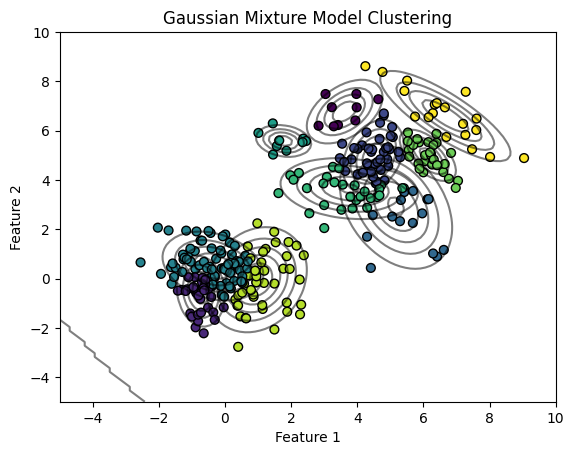

In [9]:
# Plot the data points with cluster labels
plt.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis', marker='o', edgecolor='k')

# Plot the Gaussian components
for mean, cov in zip(means, covariances):
    # Create a grid of points for plotting the Gaussian distribution
    x, y = np.meshgrid(np.linspace(-5, 10, 100), np.linspace(-5, 10, 100))
    pos = np.empty(x.shape + (2,))
    pos[:, :, 0] = x
    pos[:, :, 1] = y

    # Calculate the Gaussian distribution
    rv = multivariate_normal(mean, cov)
    plt.contour(x, y, rv.pdf(pos), levels=5, colors='black', alpha=0.5)

plt.title("Gaussian Mixture Model Clustering")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()


In [10]:
# Generate synthetic 3D data
np.random.seed(0)
n_samples = 500

# Generate random samples from three different Gaussian distributions
data1 = np.random.normal(loc=[2, 5, 8], scale=1.0, size=(n_samples // 3, 3))
data2 = np.random.normal(loc=[5, 8, 2], scale=1.5, size=(n_samples // 3, 3))
data3 = np.random.normal(loc=[8, 2, 5], scale=0.8, size=(n_samples // 3, 3))

# Combine the data into one dataset
X = np.vstack([data1, data2, data3])

In [11]:
# Create a Gaussian Mixture Model with 3 components
gmm = GaussianMixture(n_components=3, random_state=0)
gmm.fit(X)


GaussianMixture(n_components=3, random_state=0)

In [12]:
# Predict the cluster labels
labels = gmm.predict(X)
labelsP = gmm.predict_proba(X)

# Retrieve the means and covariances of the Gaussian components
means = gmm.means_
covariances = gmm.covariances_

print("Means:", means)
print("Covariances:", covariances)


Means: [[4.9551048  7.84977767 1.90569454]
 [7.97165313 2.06219966 5.04032183]
 [2.08696226 5.04979723 7.79088526]]
Covariances: [[[ 2.03586084 -0.30264686 -0.06151001]
  [-0.30264686  2.52209724 -0.15099596]
  [-0.06151001 -0.15099596  1.69279982]]

 [[ 0.56079654  0.00718346 -0.02160606]
  [ 0.00718346  0.63435203 -0.006267  ]
  [-0.02160606 -0.006267    0.57802775]]

 [[ 1.05378292 -0.03653708  0.0919831 ]
  [-0.03653708  0.98857938  0.01473936]
  [ 0.0919831   0.01473936  1.0284559 ]]]


In [13]:
labelsP

array([[3.40747339e-07, 8.80550547e-16, 9.99999659e-01],
       [1.16026229e-02, 3.23498770e-13, 9.88397377e-01],
       [1.23561947e-06, 1.75059873e-15, 9.99998764e-01],
       ...,
       [2.35407502e-05, 9.99976459e-01, 6.48955912e-10],
       [2.49278004e-05, 9.99975072e-01, 4.16096705e-18],
       [2.55769019e-06, 9.99997442e-01, 9.02822757e-11]])

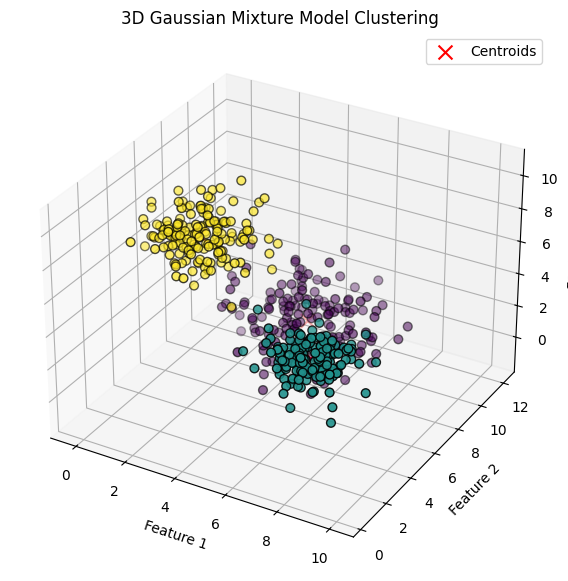

In [14]:
# Plot the data points with cluster labels in 3D
fig = plt.figure(figsize=(15, 7))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot of the data points
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=labels, cmap='viridis', s=40, edgecolor='k')

# Plot the Gaussian component means
ax.scatter(means[:, 0], means[:, 1], means[:, 2], c='red', s=100, marker='x', label='Centroids')

# Set labels
ax.set_title("3D Gaussian Mixture Model Clustering")
ax.set_xlabel("Feature 1")
ax.set_ylabel("Feature 2")
ax.set_zlabel("Feature 3")
plt.legend()
plt.show()


In [15]:
score = silhouette_score(X, labels)
print("Silhouette Score:", score)

Silhouette Score: 0.6454550415485257


In [16]:
score =  gmm.bic(X)
print("BIC Score:", score)

BIC Score: 5602.820344919676
